# Exploratory Data Analysis
In this notebook I go through various features in order to investigate their distribution and consider their relationships to the target value and to each other. All of this work is done in the service of generating superior machine learning models. Hence, I attempt to engineer novel features that might improve the predictions made by my models. 

In [1]:
from functools import reduce

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns
from utils.feature_tools import interval_feats, shapiro_test, to_downcasted_numeric
from utils.machine_learning import (
    instantiate_column_categories_and_column_imputer,
    project_feature_transformer,
    remove_verbose_col_name,
)
from utils.plot import (
    horizontal_bar_value_counts_by_class_subplots,
    horizontal_bar_value_counts_subplots,
    plot_feature_qqplot_subplot,
    plot_missing_values_by_target_class,
    plot_normalized_counts_by_target,
    plot_subplots_correlation_matrix,
    plot_target_data,
    subplot_sns_boxplot,
    subplot_sns_histogram,
)

In [2]:
sns.set_theme(context="notebook", style="white", palette="muted")
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False

__Import Data__

In [3]:
%store -r y_train
y_train = y_train.copy()
%store -r y_val
y_val = y_val.copy()
%store -r y_test
y_test = y_test.copy()

In [4]:
X_train = pd.read_pickle("../data/merged_data/X_train_full.pkl")

In [5]:
X_val = pd.read_pickle("../data/merged_data/X_val_full.pkl")

In [6]:
X_test = pd.read_pickle("../data/merged_data/X_test_full.pkl")

In [7]:
kaggle_X_test = pd.read_pickle("../data/merged_data/kaggle_X_test_full.pkl")

__Create a DataFrame with the features that the data we use for all machine learning contains__

In [8]:
feature_creation = project_feature_transformer()

In [9]:
_, numeric_columns, boolean_columns, categorical_columns, _, _, _, _, _, _, _, _ = (
    instantiate_column_categories_and_column_imputer()
)

In [10]:
X_train_full = feature_creation.fit_transform(X_train)
columns = feature_creation.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_full, columns=columns)
X_train_df.columns = [remove_verbose_col_name(col) for col in X_train_df.columns]
X_train_df = X_train_df.loc[:, ~X_train_df.columns.duplicated()].copy()
X_train_df = X_train_df.drop(
    columns=["AMT_ANNUITY_div_AMT_ANNUITY", "AMT_INCOME_TOTAL_div_AMT_INCOME_TOTAL"]
)
X_train_df = to_downcasted_numeric(X_train_df, numeric_columns)
X_train_df[boolean_columns] = X_train_df[boolean_columns].astype("bool")
X_train_df[categorical_columns] = X_train_df[categorical_columns].astype("category")
X_train_df

HOUR_APPR_PROCESS_START_sin  HOUR_APPR_PROCESS_START_cos  \
0                         -0.136167                    -0.990686   
1                         -0.398401                    -0.917211   
2                         -0.136167                    -0.990686   
3                         -0.997669                    -0.068242   
4                         -0.942261                    -0.334880   
...                             ...                          ...   
196801                    -0.997669                    -0.068242   
196802                    -0.136167                    -0.990686   
196803                    -0.136167                    -0.990686   
196804                     0.136167                    -0.990686   
196805                    -0.136167                    -0.990686   

        FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                 False             True            False            False   
1                 False             True            False            False   
2                 False             True            False            False   
3                 False             True            False            False   
4                 False             True            False            False   
...                 ...              ...              ...              ...   
196801            False            False            False             True   
196802            False             True            False            False   
196803            False            False            False            False   
196804            False            False            False            False   
196805            False             True            False            False   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                 False            False            False            False   
1                 False            False            False            False   
2                 False            False            False            False   
3                 False            False            False            False   
4                 False            False            False            False   
...                 ...              ...              ...              ...   
196801            False            False            False            False   
196802            False            False            False            False   
196803            False            False             True            False   
196804            False            False            False            False   
196805            False            False            False            False   

        ...  AMT_PAYMENT_min  AMT_PAYMENT_max  AMT_PAYMENT_std  \
0       ...       452.070007     1.731181e+04      7229.090672   
1       ...      1305.719971     6.543153e+04     10619.827247   
2       ...      6072.029785     6.096870e+03         7.855203   
3       ...      9830.969727     7.581092e+05    120949.363806   
4       ...      4865.490234     1.249819e+06    320623.075765   
...     ...              ...              ...              ...   
196801  ...      1104.750000     1.086822e+04      1335.818113   
196802  ...         0.270000     1.188932e+04      4268.688753   
196803  ...        59.445000     7.500735e+03      2561.771407   
196804  ...      6773.850098     5.500332e+04     27845.297611   
196805  ...         2.700000     1.216565e+05     17368.046489   

        DAYS_ENTRY_PAYMENT_min  DAYS_ENTRY_PAYMENT_std  DAYS_INSTALMENT_max  \
0                      -2592.0              861.818542                -81.0   
1                      -1153.0              306.618164                -20.0   
2                      -2244.0               99.554337              -1944.0   
3                      -1093.0              325.880890                -18.0   
4                      -2926.0              700.129395               -754.0   
...                        ...                    

In [11]:
y_train = y_train.reset_index(drop=True)
df = pd.concat([X_train_df, y_train], axis=1)
df

HOUR_APPR_PROCESS_START_sin  HOUR_APPR_PROCESS_START_cos  \
0                         -0.136167                    -0.990686   
1                         -0.398401                    -0.917211   
2                         -0.136167                    -0.990686   
3                         -0.997669                    -0.068242   
4                         -0.942261                    -0.334880   
...                             ...                          ...   
196801                    -0.997669                    -0.068242   
196802                    -0.136167                    -0.990686   
196803                    -0.136167                    -0.990686   
196804                     0.136167                    -0.990686   
196805                    -0.136167                    -0.990686   

        FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                 False             True            False            False   
1                 False             True            False            False   
2                 False             True            False            False   
3                 False             True            False            False   
4                 False             True            False            False   
...                 ...              ...              ...              ...   
196801            False            False            False             True   
196802            False             True            False            False   
196803            False            False            False            False   
196804            False            False            False            False   
196805            False             True            False            False   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                 False            False            False            False   
1                 False            False            False            False   
2                 False            False            False            False   
3                 False            False            False            False   
4                 False            False            False            False   
...                 ...              ...              ...              ...   
196801            False            False            False            False   
196802            False            False            False            False   
196803            False            False             True            False   
196804            False            False            False            False   
196805            False            False            False            False   

        ...  AMT_PAYMENT_max  AMT_PAYMENT_std  DAYS_ENTRY_PAYMENT_min  \
0       ...     1.731181e+04      7229.090672                 -2592.0   
1       ...     6.543153e+04     10619.827247                 -1153.0   
2       ...     6.096870e+03         7.855203                 -2244.0   
3       ...     7.581092e+05    120949.363806                 -1093.0   
4       ...     1.249819e+06    320623.075765                 -2926.0   
...     ...              ...              ...                     ...   
196801  ...     1.086822e+04      1335.818113                 -1098.0   
196802  ...     1.188932e+04      4268.688753                  -842.0   
196803  ...     7.500735e+03      2561.771407                 -2944.0   
196804  ...     5.500332e+04     27845.297611                  -749.0   
196805  ...     1.216565e+05     17368.046489                 -1151.0   

        DAYS_ENTRY_PAYMENT_std  DAYS_INSTALMENT_max  \
0                   861.818542                -81.0   
1                   306.618164                -20.0   
2                    99.554337              -1944.0   
3                   325.880890                -18.0   
4                   700.129395               -754.0   
...                        ...                  ...   
196801              310.388733                -46.0   


__Take the Phi-K Correlation of the features and store this correlation matrix in a new DataFrame__

In [12]:
interval_feats = interval_feats()

In [13]:
corr_mat = df.phik_matrix(
    interval_cols=interval_feats,
    verbose=False,
)

/Users/migueldiaz/home-credit/lib/python3.11/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable EMERGENCYSTATE_MODE for analysis 1. Dropping this column
  warnings.warn(
/Users/migueldiaz/home-credit/lib/python3.11/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable FLAG_OWN_CAR for analysis 1. Dropping this column
  warnings.warn(
/Users/migueldiaz/home-credit/lib/python3.11/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable FLAG_OWN_REALTY for analysis 1. Dropping this column
  warnings.warn(


# TARGET

There are 180918 applicants who could pay on time.
There are 15888 applicants with payment difficulties.


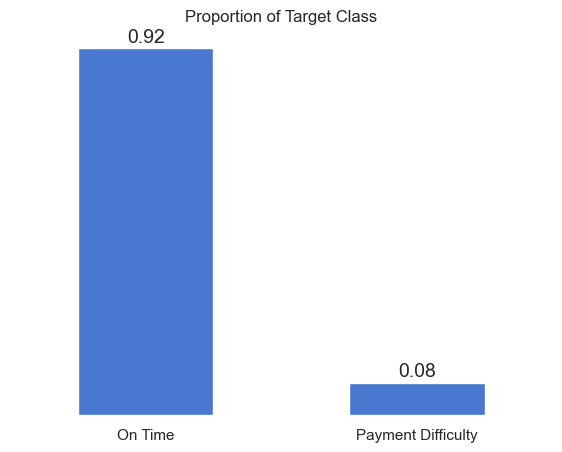

(<Figure size 700x500 with 1 Axes>,
 <Axes: title={'center': 'Proportion of Target Class'}, ylabel='Proportion'>)

In [14]:
plot_target_data(df["TARGET"])

In [15]:
df["TARGET"].astype("bool").describe()

count     196806
unique         2
top        False
freq      180918
Name: TARGET, dtype: object

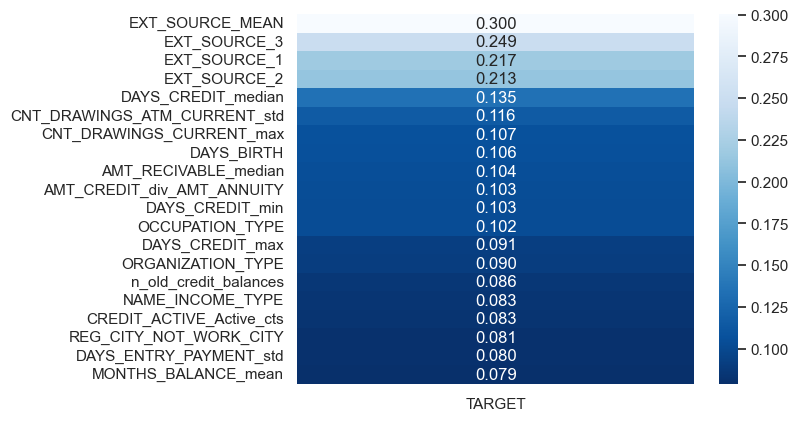

In [16]:
sns.heatmap(
    pd.DataFrame(corr_mat["TARGET"].sort_values(ascending=False)[1:21]),
    annot=True,
    fmt=".3f",
    cmap="Blues_r",
)
plt.show()

Conclusions: 
- The data is very imbalanced
- The majority class (0) suggests that most people do not have payment difficulty (only 8% do)
- External Sources give us the most information about the likelihood of default

# EXTERNAL SOURCES - Normalized scores from external data source
__EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_MEAN, EXT_SOURCE_STD__

Across algorithms, these features appear to be the most predictive of whether a candidate will default or not. 

In [17]:
ext_sources = [
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "EXT_SOURCE_MEAN",
    "EXT_SOURCE_STD",
]
df_ext_source = df.loc[:, ext_sources].copy()

In [18]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)
df_ext_source.describe()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_MEAN  \
count   86029.00000  196392.00000  157793.00000     196700.00000   
mean        0.50144       0.51431       0.51092          0.50914   
std         0.21134       0.19100       0.19457          0.14970   
min         0.01456       0.00000       0.00053          0.00001   
25%         0.33276       0.39209       0.37061          0.41382   
50%         0.50537       0.56592       0.53516          0.52441   
75%         0.67432       0.66357       0.66895          0.62256   
max         0.95166       0.85498       0.89600          0.86377   

       EXT_SOURCE_STD  
count    173338.00000  
mean          0.15125  
std           0.09992  
min           0.00000  
25%           0.07251  
50%           0.13611  
75%           0.21436  
max           0.65186

In [19]:
df_ext_source.isna().sum()

EXT_SOURCE_1       110777
EXT_SOURCE_2          414
EXT_SOURCE_3        39013
EXT_SOURCE_MEAN       106
EXT_SOURCE_STD      23468
dtype: int64

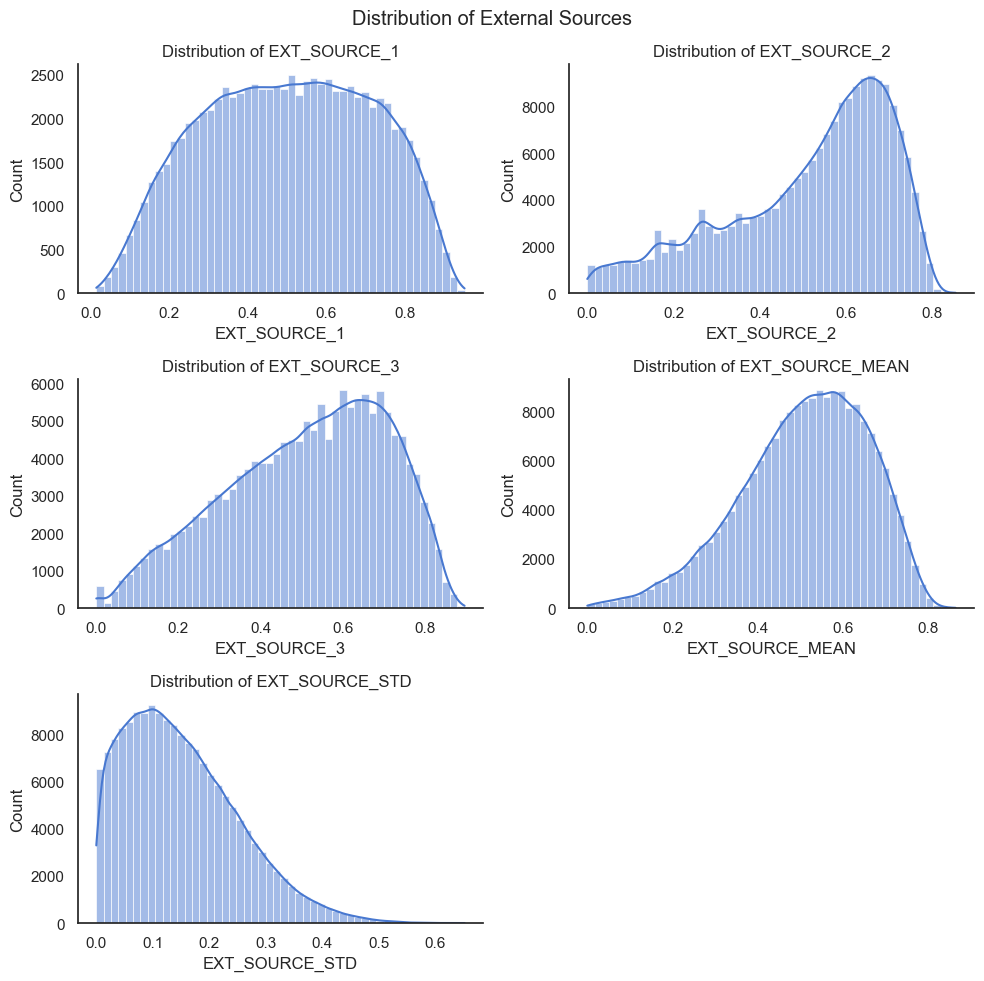

In [20]:
fig, axs = subplot_sns_histogram(
    df,
    ext_sources,
    title="Distribution of External Sources",
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    bins=50,
)

Conclusions:
- Different external sources have different distributions
- the standard deviation of the external source scores has a long rightward tail

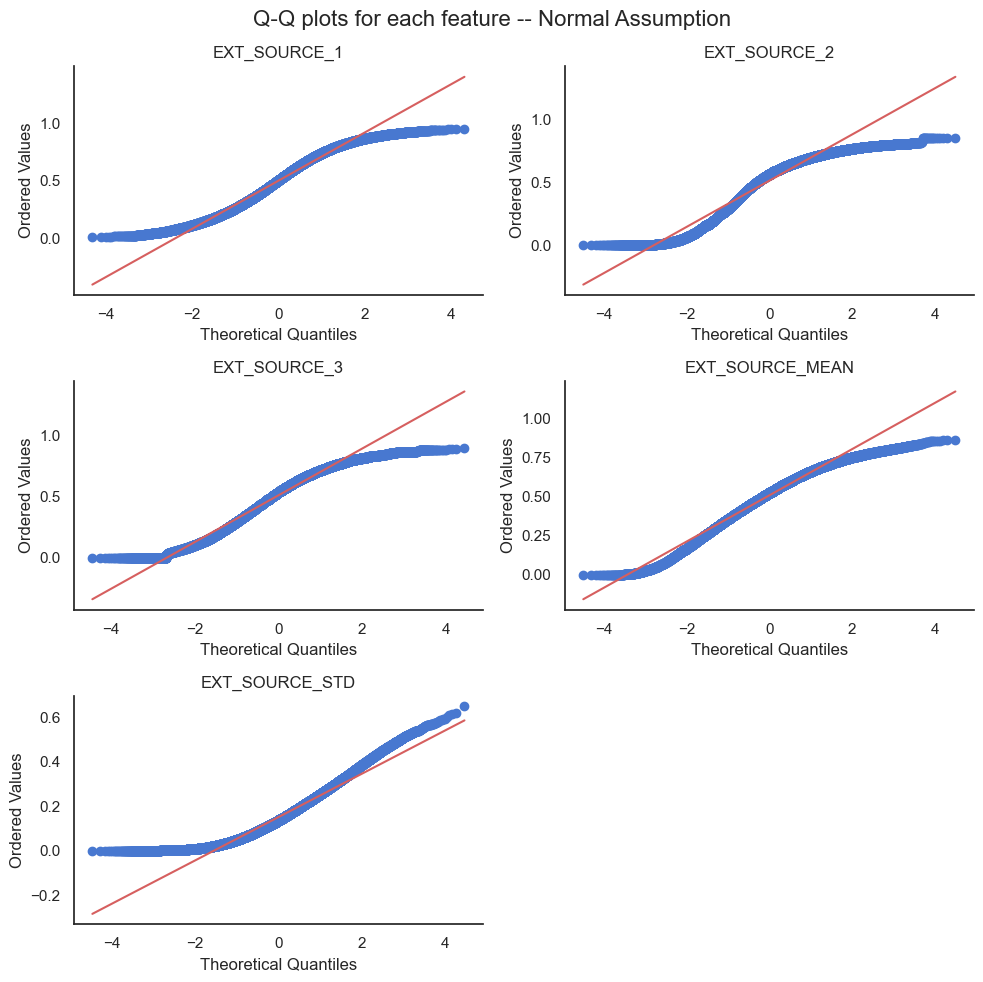

In [21]:
fig, axs = plot_feature_qqplot_subplot(
    df,
    ext_sources,
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    title="Q-Q plots for each feature -- Normal Assumption",
)

- None of these features are perfectly normal, all exhibit some fat tails 

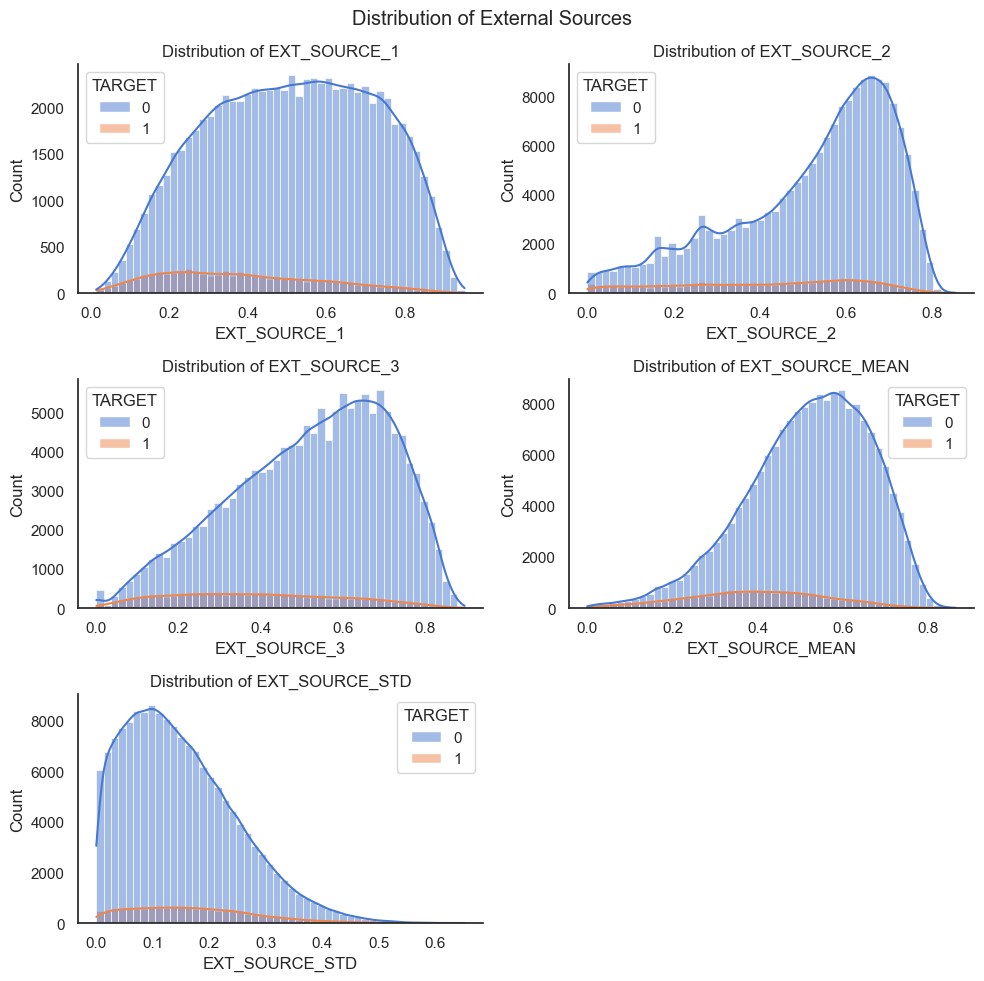

In [22]:
fig, axs = subplot_sns_histogram(
    df,
    ext_sources,
    hue="TARGET",
    title="Distribution of External Sources",
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    bins=50,
)

- the 0 and 1 TARGET classes are not necessarily distributed the same 

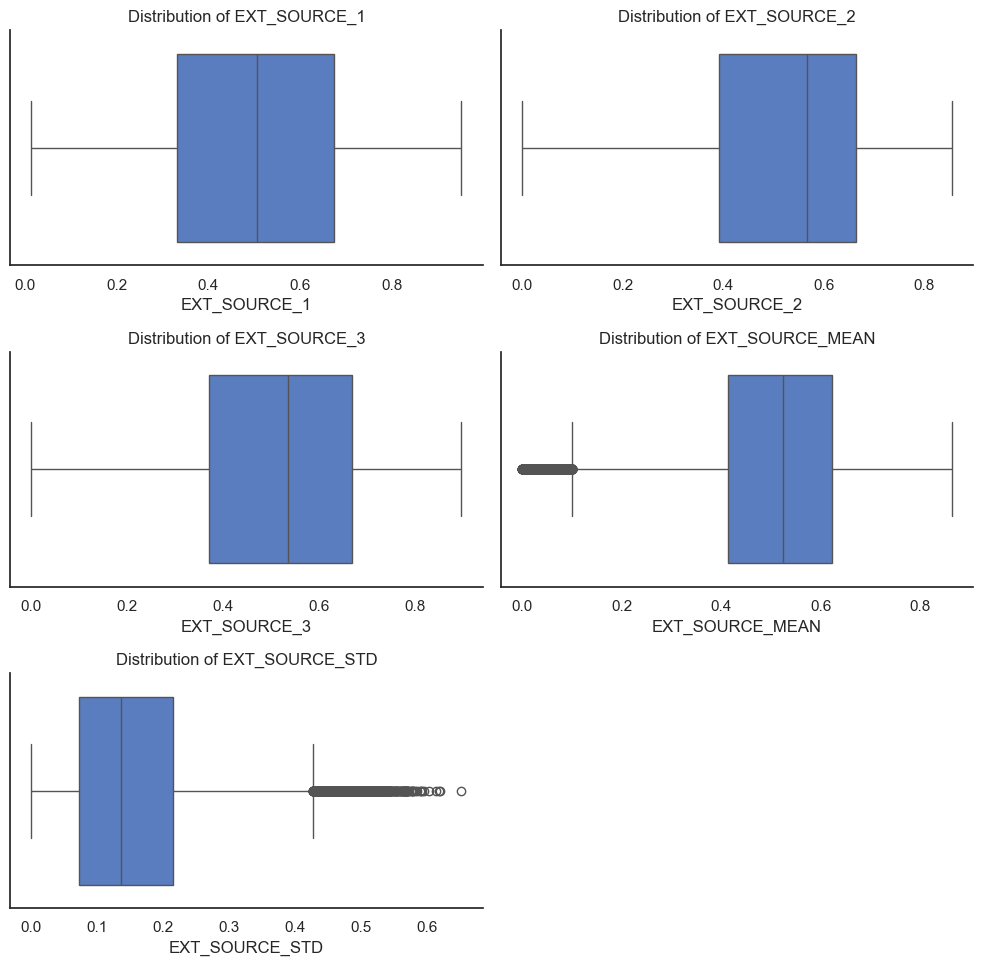

In [23]:
fig, axs = subplot_sns_boxplot(df, ext_sources, nrows=3, ncols=2)

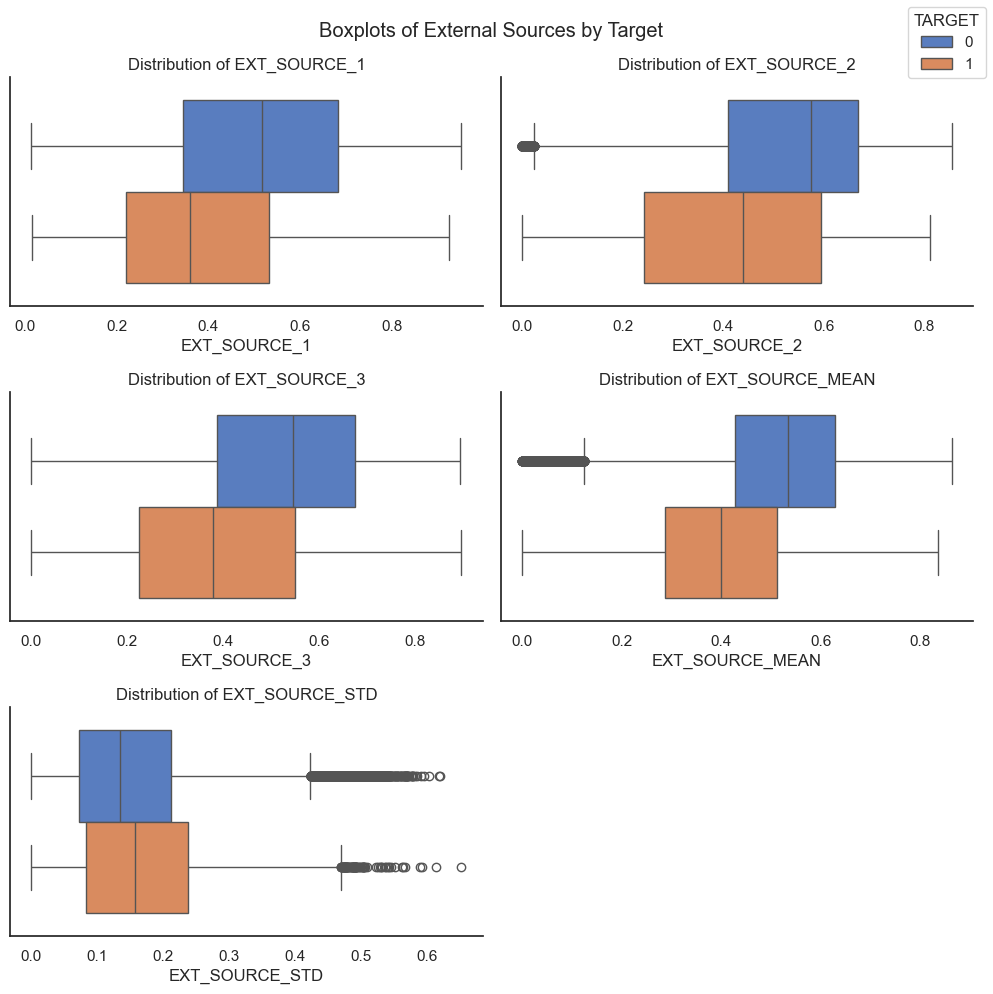

In [24]:
fig, axs = subplot_sns_boxplot(
    df,
    ext_sources,
    hue="TARGET",
    nrows=3,
    ncols=2,
    title="Boxplots of External Sources by Target",
    legend_loc="upper right",
)

- There are in fact outliers for EXT_SOURCE_2, MEAN, and STD. I will see if looking at logarithms of the features improves this distribtion

In [25]:
df["LOG_EXT_SOURCE_1"] = np.log(df["EXT_SOURCE_1"] + 1)
df["LOG_EXT_SOURCE_2"] = np.log(df["EXT_SOURCE_2"] + 1)
df["LOG_EXT_SOURCE_3"] = np.log(df["EXT_SOURCE_3"] + 1)
df["LOG_EXT_SOURCE_MEAN"] = np.log(df["EXT_SOURCE_MEAN"] + 1)
df["LOG_EXT_SOURCE_STD"] = np.log(df["EXT_SOURCE_STD"] + 1)

In [26]:
log_ext_sources = [
    "LOG_EXT_SOURCE_1",
    "LOG_EXT_SOURCE_2",
    "LOG_EXT_SOURCE_3",
    "LOG_EXT_SOURCE_MEAN",
    "LOG_EXT_SOURCE_STD",
]

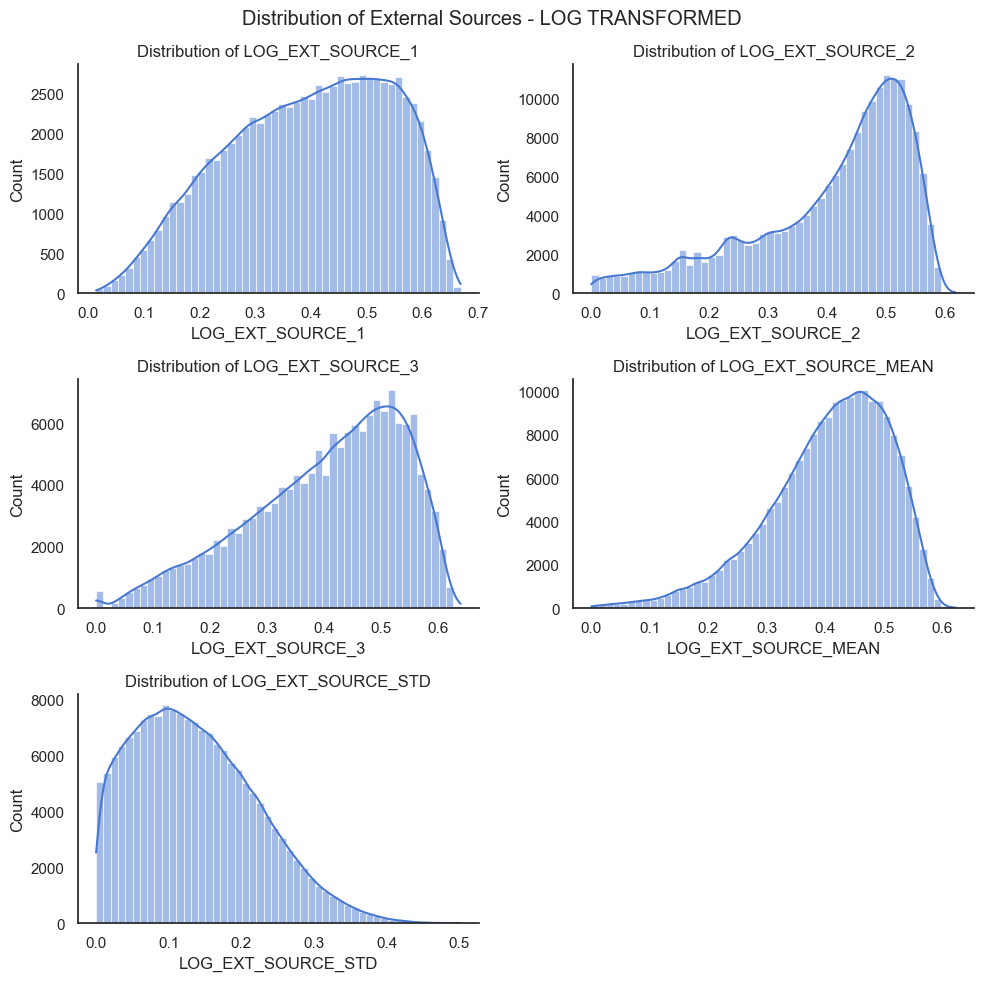

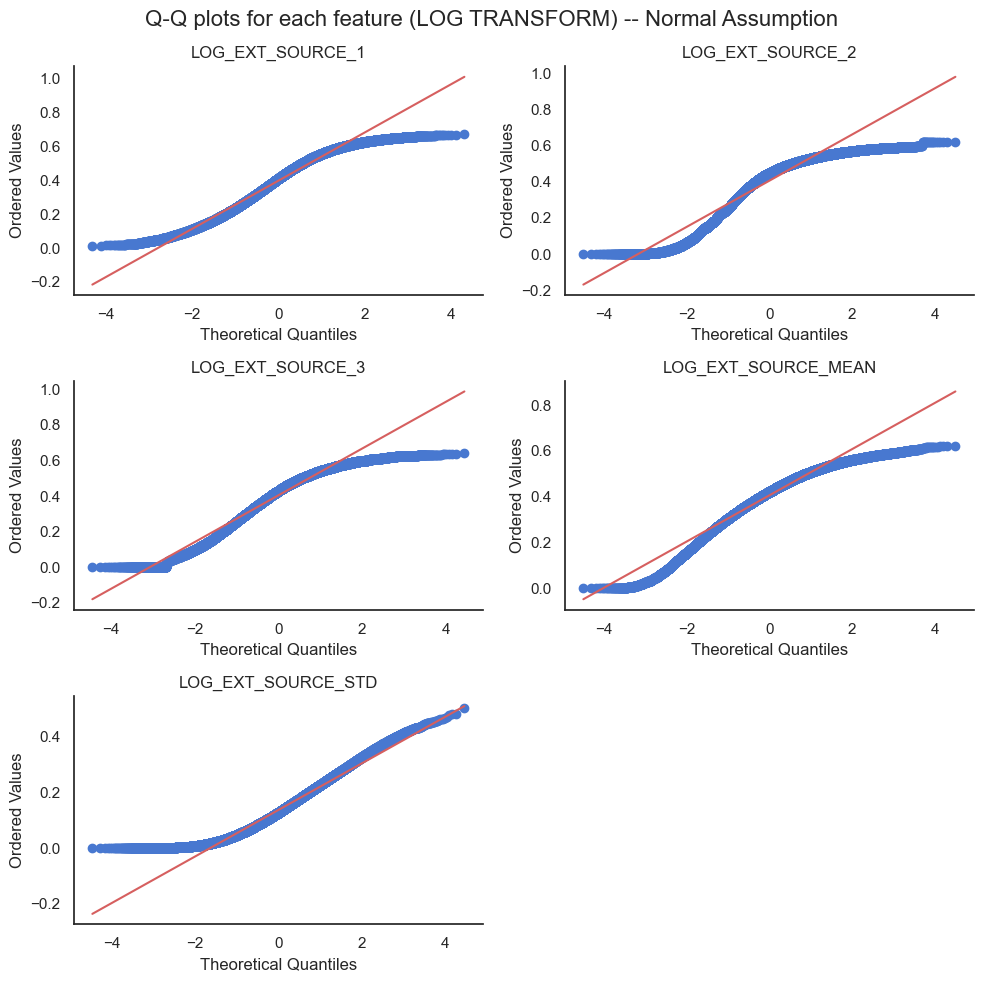

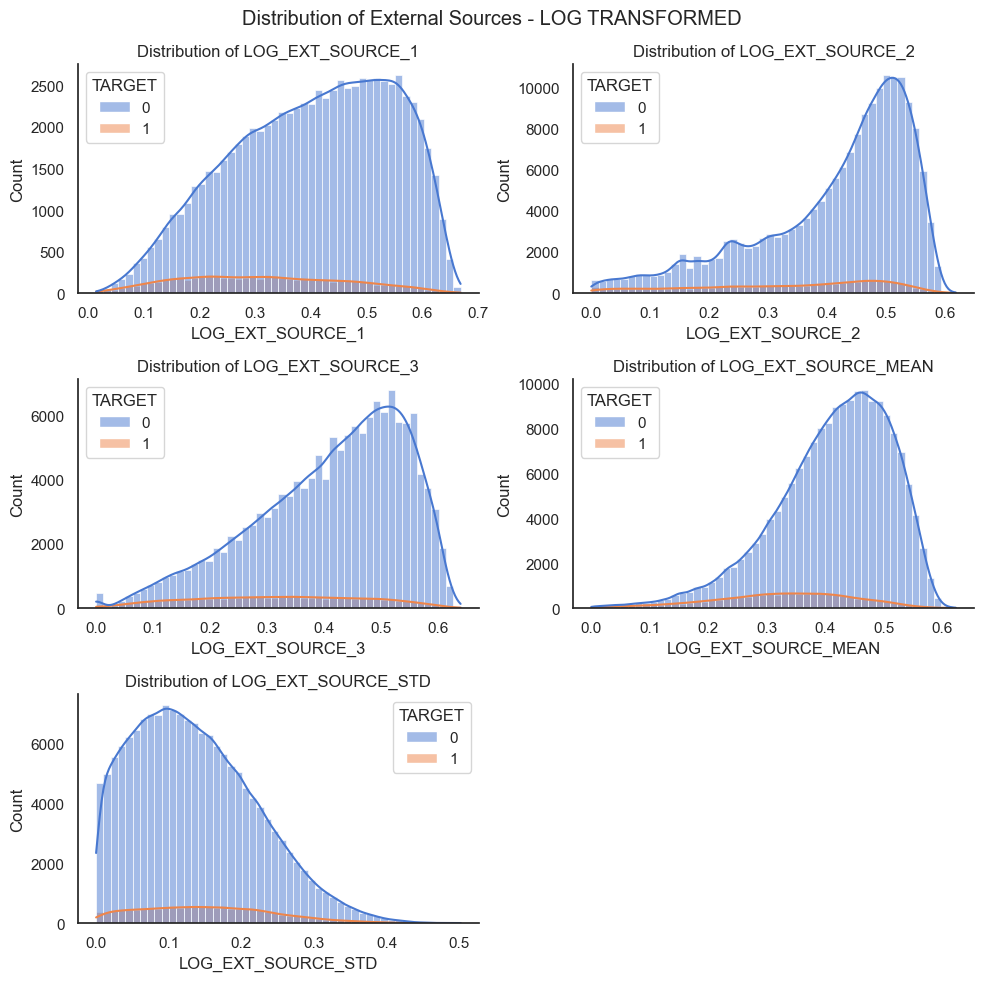

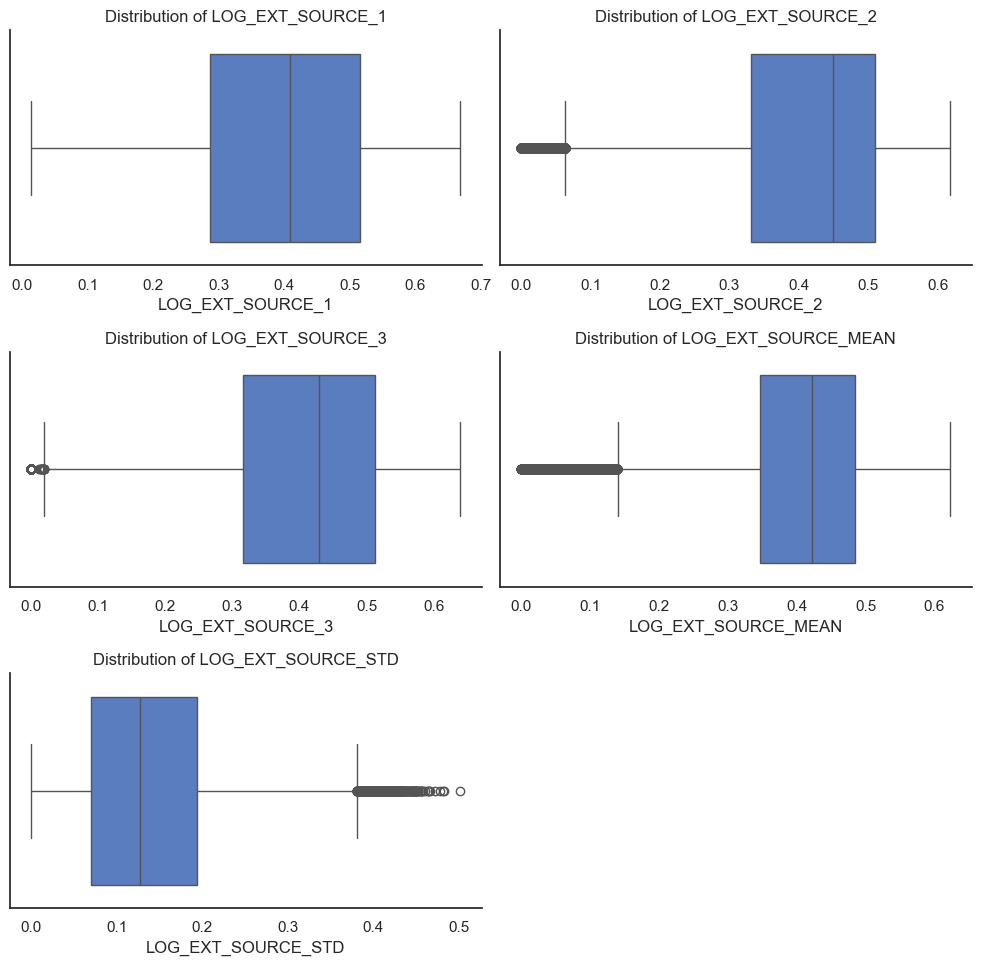

In [27]:
fig, axs = subplot_sns_histogram(
    df,
    log_ext_sources,
    title="Distribution of External Sources - LOG TRANSFORMED",
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    bins=50,
)
fig, axs = plot_feature_qqplot_subplot(
    df,
    log_ext_sources,
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    title="Q-Q plots for each feature (LOG TRANSFORM) -- Normal Assumption",
)
fig, axs = subplot_sns_histogram(
    df,
    log_ext_sources,
    hue="TARGET",
    title="Distribution of External Sources - LOG TRANSFORMED",
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    bins=50,
)
fig, axs = subplot_sns_boxplot(df, log_ext_sources, nrows=3, ncols=2)

This transformation does not appear to improve the quality of the data at all in terms of creating a more variance-stabilized distribution and dealing with outliers.

What is the distribution of missing values in these features? 

In [28]:
ext_1_na_df = df[df["EXT_SOURCE_1"].isna()]
ext_2_na_df = df[df["EXT_SOURCE_2"].isna()]
ext_3_na_df = df[df["EXT_SOURCE_3"].isna()]
ext_mean_na_df = df[df["EXT_SOURCE_MEAN"].isna()]
ext_std_na_df = df[df["EXT_SOURCE_STD"].isna()]

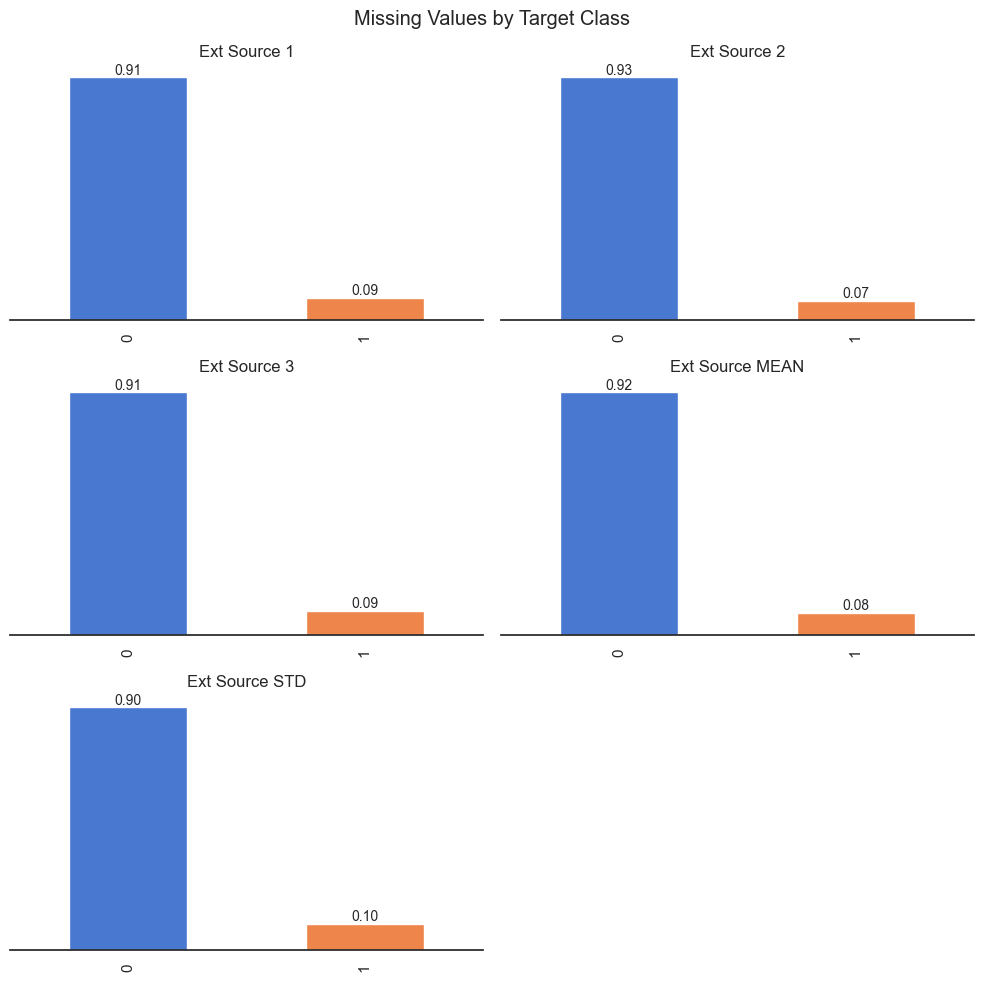

In [29]:
fig, axs = plot_missing_values_by_target_class(
    ext_1_na_df, ext_2_na_df, ext_3_na_df, ext_mean_na_df, ext_std_na_df
)

- The distributino of missing values is quite similar to the TARGET class distribution. Hence, it might be random. 

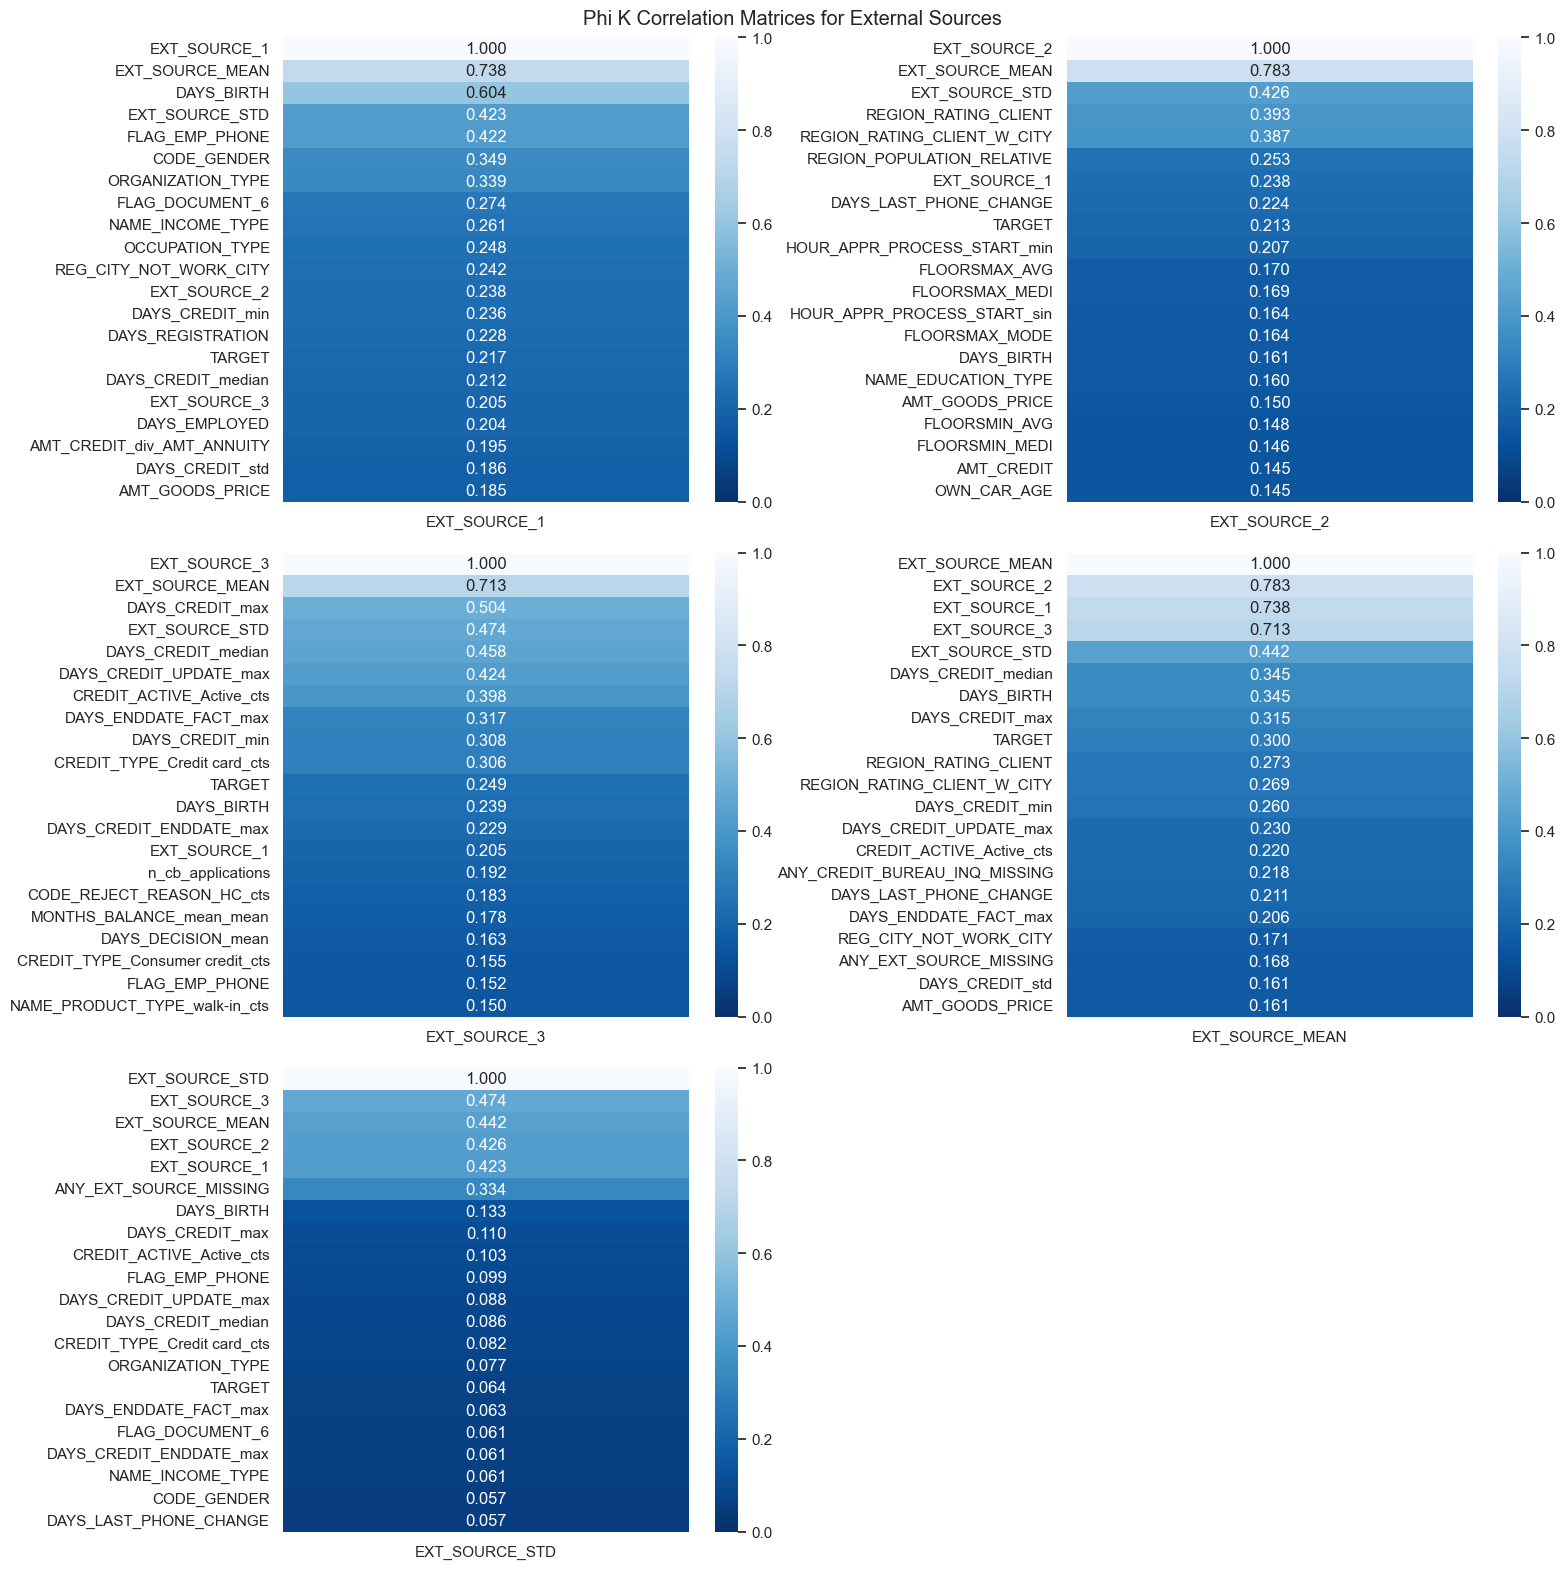

In [30]:
fig, axs, ext_source_corr_dfs = plot_subplots_correlation_matrix(
    corr_mat, ext_sources, n_features=20, nrows=3, ncols=2
)

__Many Features exhibit moderate correlations to these features, I will try to visualize groups of these features to see their bivariate relationships__

In [31]:
top_correlated_features_idx = reduce(
    lambda x, y: x.union(y), (df.index for df in ext_source_corr_dfs)
)
corr_ext_feats = df[list(top_correlated_features_idx)]
corr_ext_feats

AMT_CREDIT  AMT_CREDIT_div_AMT_ANNUITY  AMT_GOODS_PRICE  \
0       808650.00000                    34.01476     675000.00000   
1       733315.50000                    18.70727     679500.00000   
2       555273.00000                    30.77925     463500.00000   
3       835380.00000                    20.71875     675000.00000   
4      1724220.00000                    34.11325    1350000.00000   
...              ...                         ...              ...   
196801  270000.00000                    20.00000     270000.00000   
196802  225000.00000                    19.58480     225000.00000   
196803  521280.00000                    22.57650     450000.00000   
196804  247500.00000                    20.00000     247500.00000   
196805  450000.00000                    13.37435     450000.00000   

        ANY_CREDIT_BUREAU_INQ_MISSING  ANY_EXT_SOURCE_MISSING CODE_GENDER  \
0                                True                    True           F   
1                               False                   False           F   
2                               False                   False           F   
3                               False                   False           F   
4                               False                    True           M   
...                               ...                     ...         ...   
196801                          False                   False           F   
196802                          False                    True           F   
196803                           True                    True           M   
196804                          False                    True           F   
196805                          False                   False           F   

        CODE_REJECT_REASON_HC_cts  CREDIT_ACTIVE_Active_cts  \
0                         0.00000                       NaN   
1                         0.00000                  10.00000   
2                         0.00000                   5.00000   
3                         7.00000                   7.00000   
4                         0.00000                   2.00000   
...                           ...                       ...   
196801                    0.00000                   3.00000   
196802                    0.00000                   2.00000   
196803                        NaN                       NaN   
196804                    0.00000                   0.00000   
196805                    0.00000                   3.00000   

        CREDIT_TYPE_Consumer credit_cts  CREDIT_TYPE_Credit card_cts  ...  \
0                                   NaN                          NaN  ...   
1                               5.00000                      8.00000  ...   
2                               8.00000                      3.00000  ...   
3                               2.00000                      5.00000  ...   
4                               4.00000                      1.00000  ...   
...                                 ...                          ...  ...   
196801                          2.00000                      1.00000  ...   
196802                          2.00000                      1.00000  ...   
196803                              NaN                          NaN  ...   
196804                          1.00000                      2.00000  ...   
196805                          6.00000                      2.00000  ...   

        NAME_PRODUCT_TYPE_walk-in_cts        OCCUPATION_TYPE  \
0                             0.00000             Core staff   
1                             1.00000  Private service staff   
2                             0.00000  High skill tech staff   
3                             2.00000             Core staff   
4                             0.00000                Drivers   
...                               ...                    ...   
196801                        0.00000            Sales staff   
196802                        0.00000         Medicine staff  

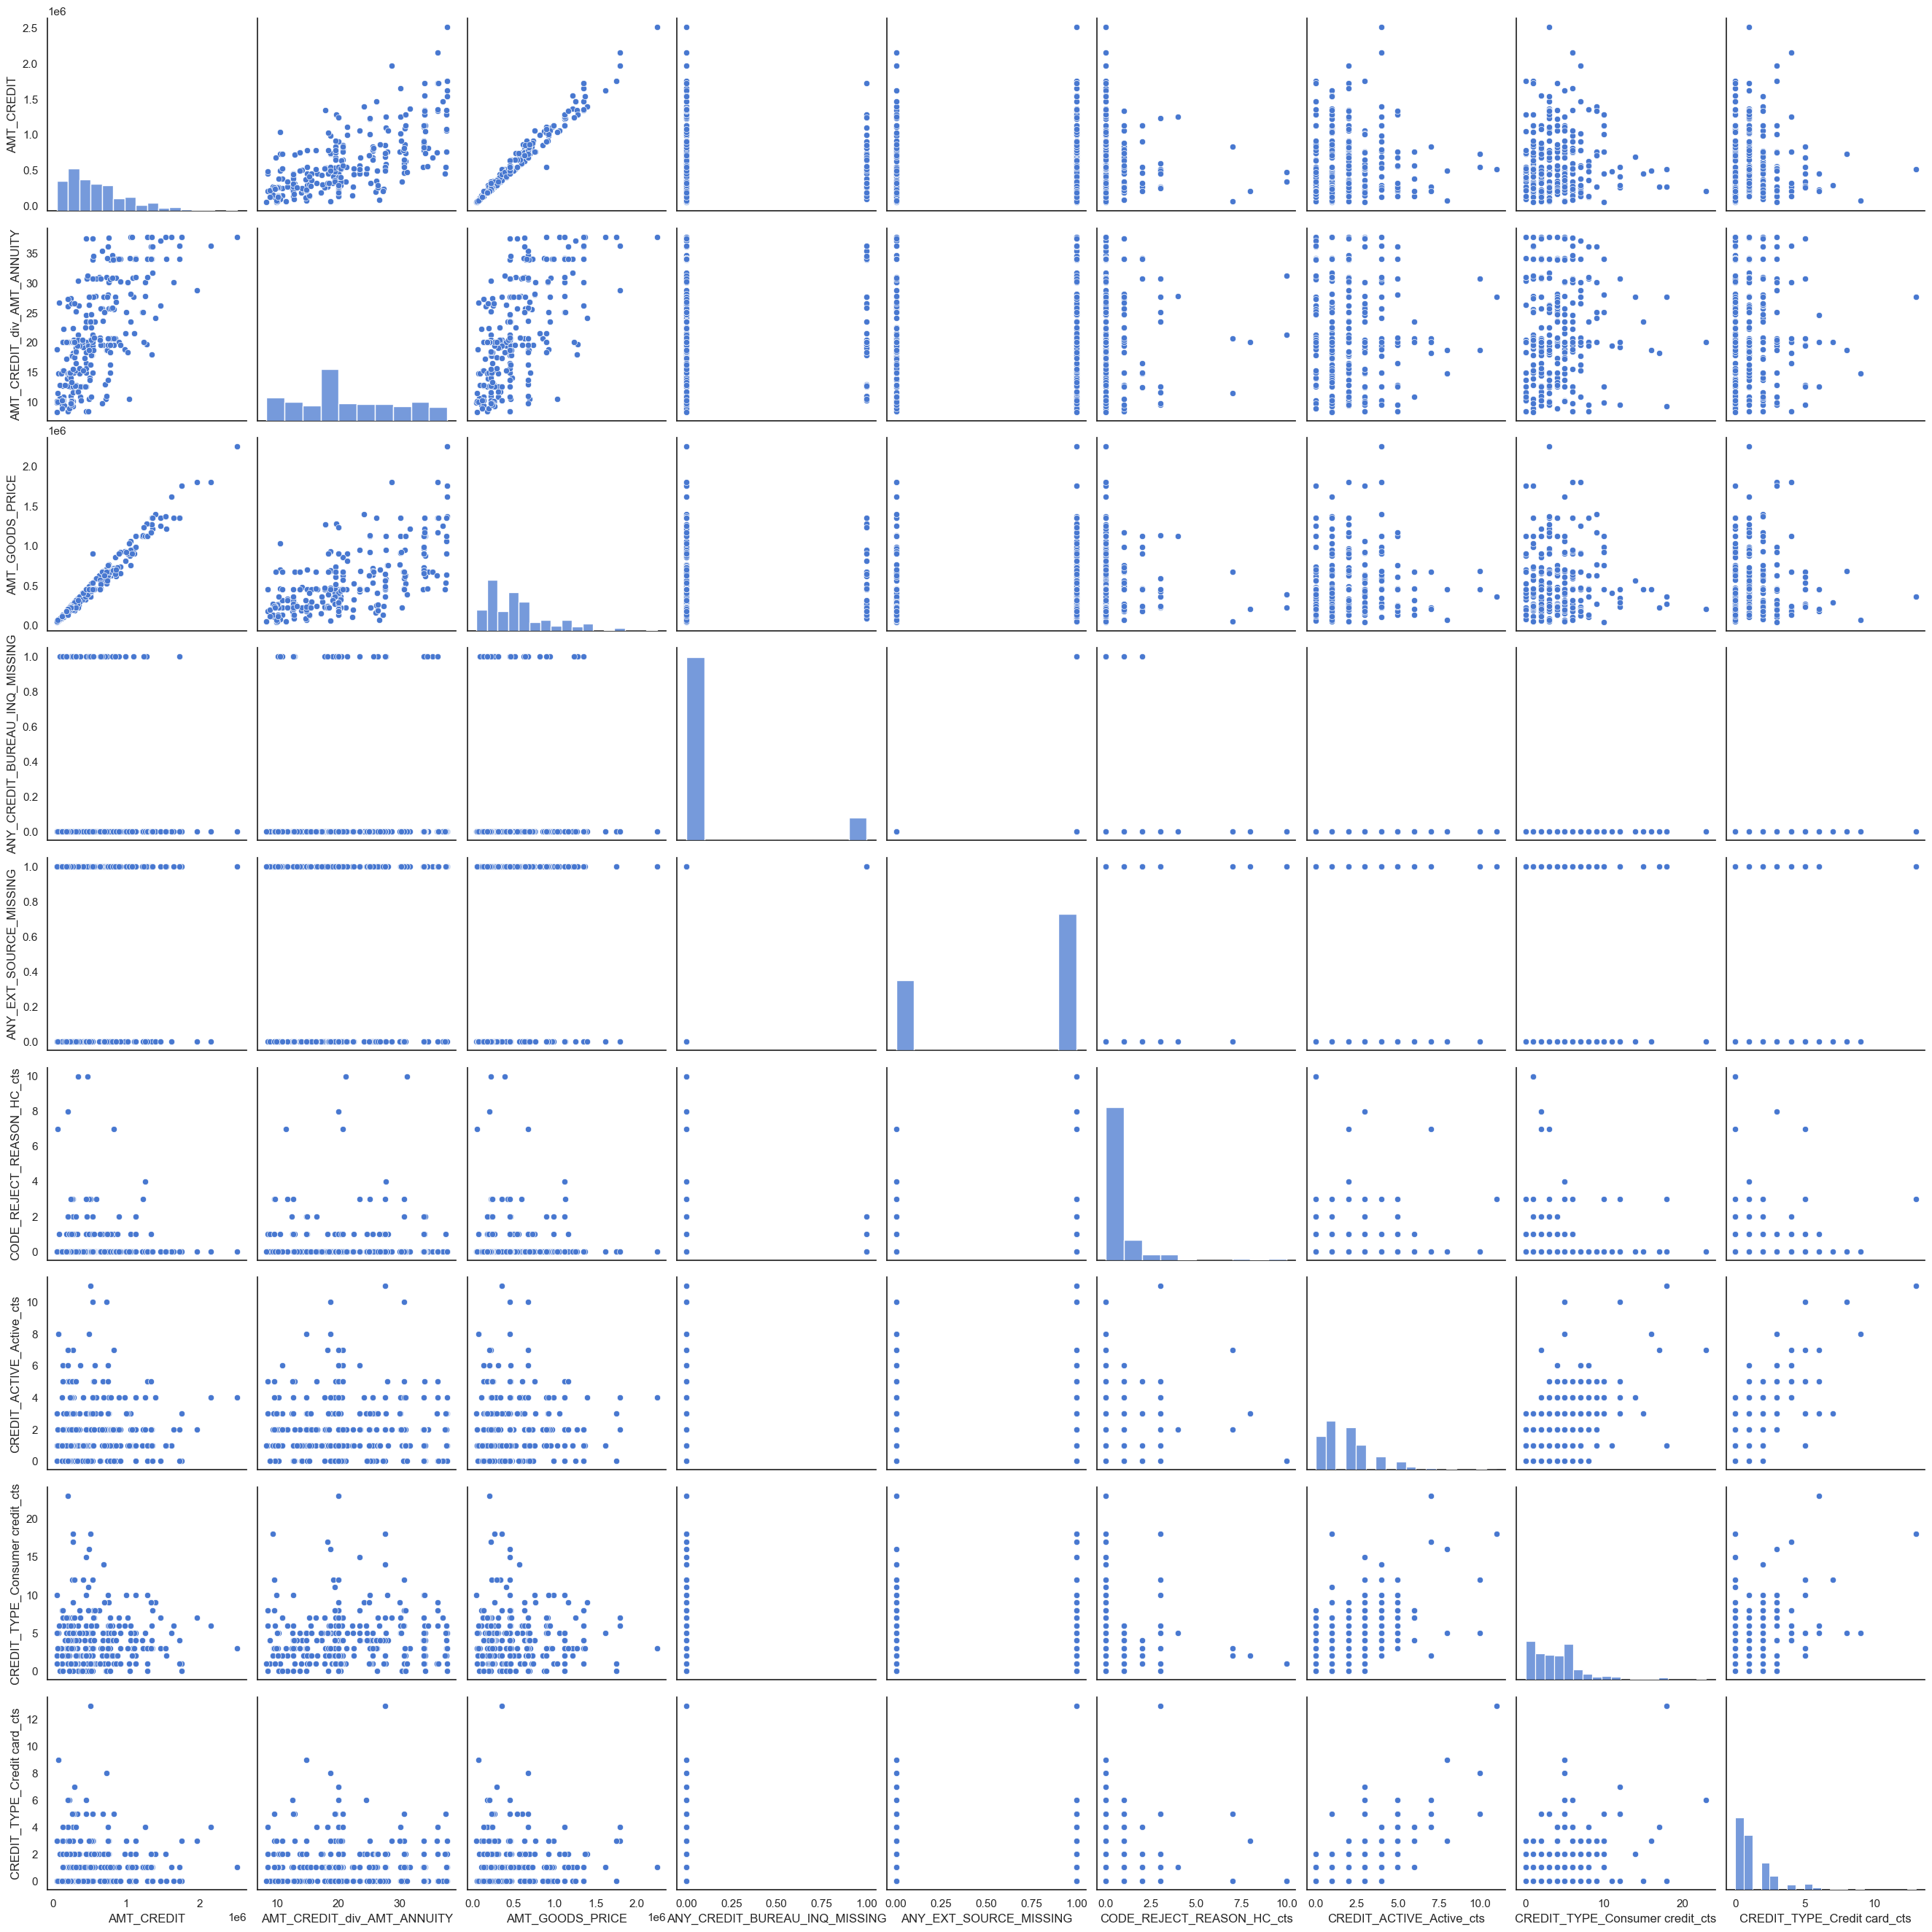

In [32]:
g = sns.pairplot(data=corr_ext_feats.iloc[0:301, 0:10], height=3, aspect=1)

- AMT_CREDIT and AMT_GOODS PRICE appear to be tightly correlated 
- CREDIT_ACTIVE_Active_cts and CREDIT_TYPE_Credit_card_cts also appear correlated

NOTE: I CAN LOOK AT DIFFERENT GROUPS OF FEATURES IN THIS WAY BY CHANGING THE COLUMNS THAT ARE SELECTED FROM THE DATA

# ORGANIZATION_TYPE and OCCUPATION_TYPE
__<u>Organization Type</u>:__ Type of organization where client works <br><br>
__<u>Occupation Type</u>:__ What kind of occupation does the client have?

In [33]:
df["ORGANIZATION_TYPE"].describe()

count                     196806
unique                        58
top       Business Entity Type 3
freq                       43523
Name: ORGANIZATION_TYPE, dtype: object

In [34]:
df["OCCUPATION_TYPE"].describe()

count       135134
unique          18
top       Laborers
freq         35367
Name: OCCUPATION_TYPE, dtype: object

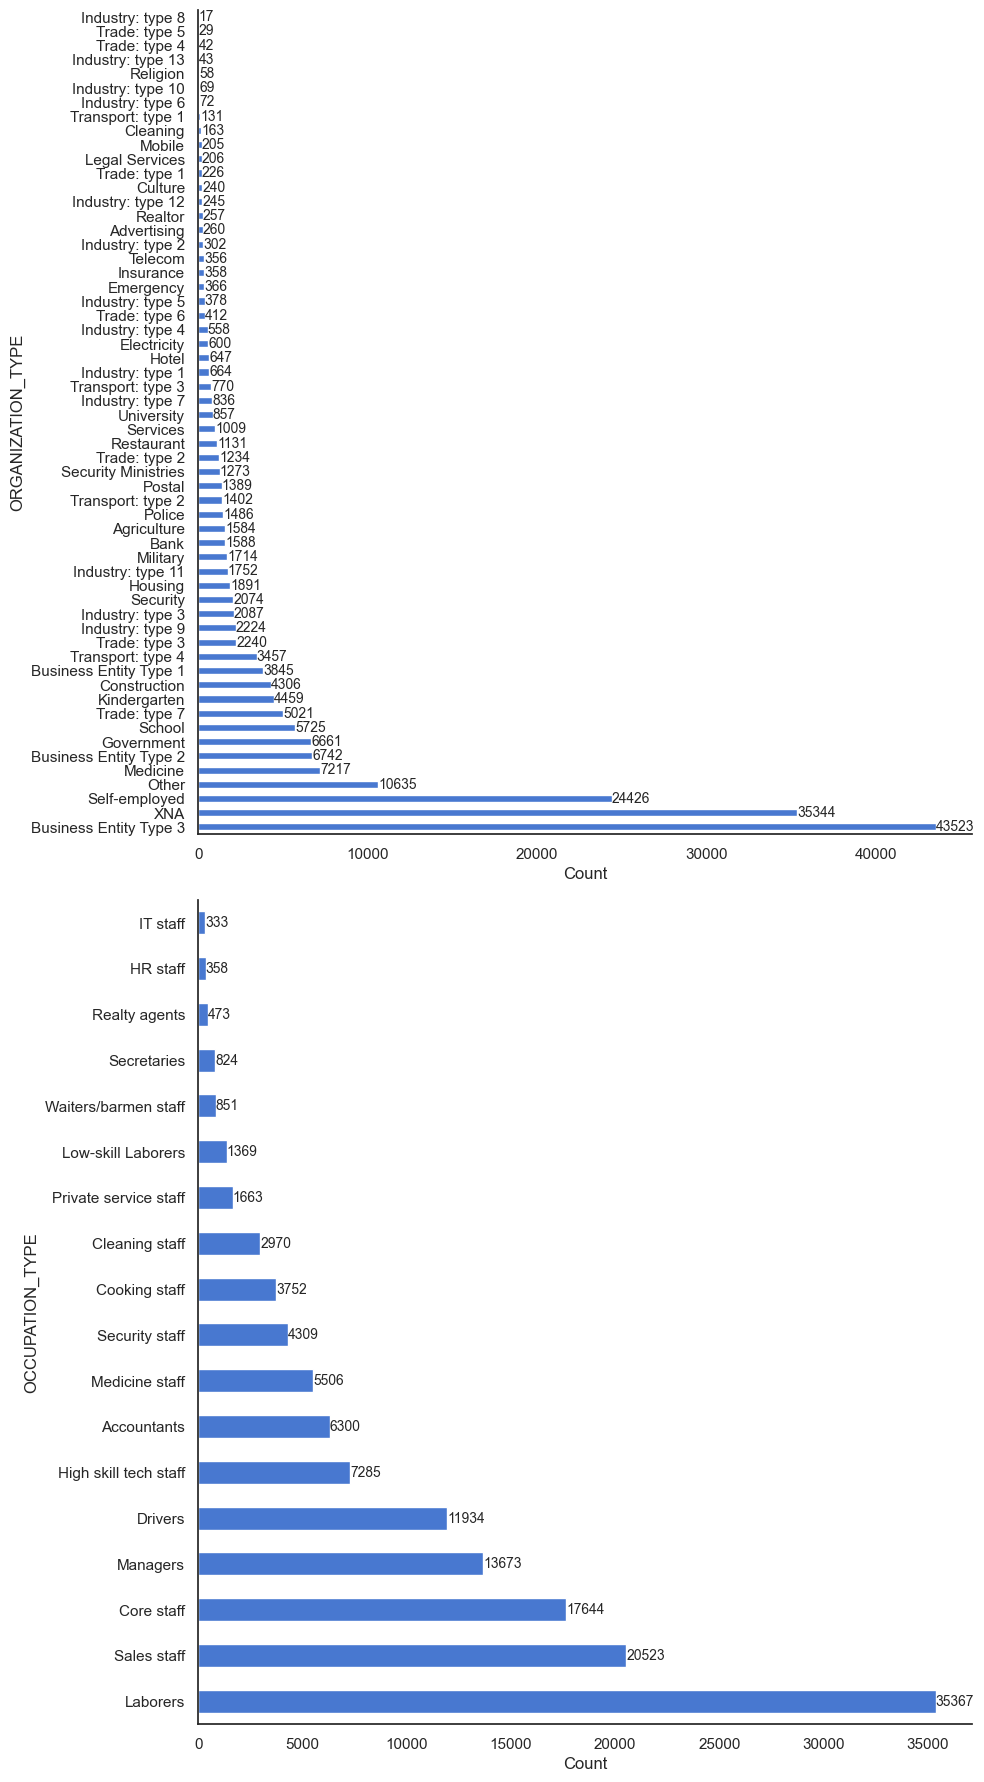

In [35]:
fig, axs = horizontal_bar_value_counts_subplots(
    df,
    list_of_features=["ORGANIZATION_TYPE", "OCCUPATION_TYPE"],
    nrows=2,
    ncols=1,
    figsize=(10, 18),
)

- both of these features have high cardinality. The question is how to deal with this? 

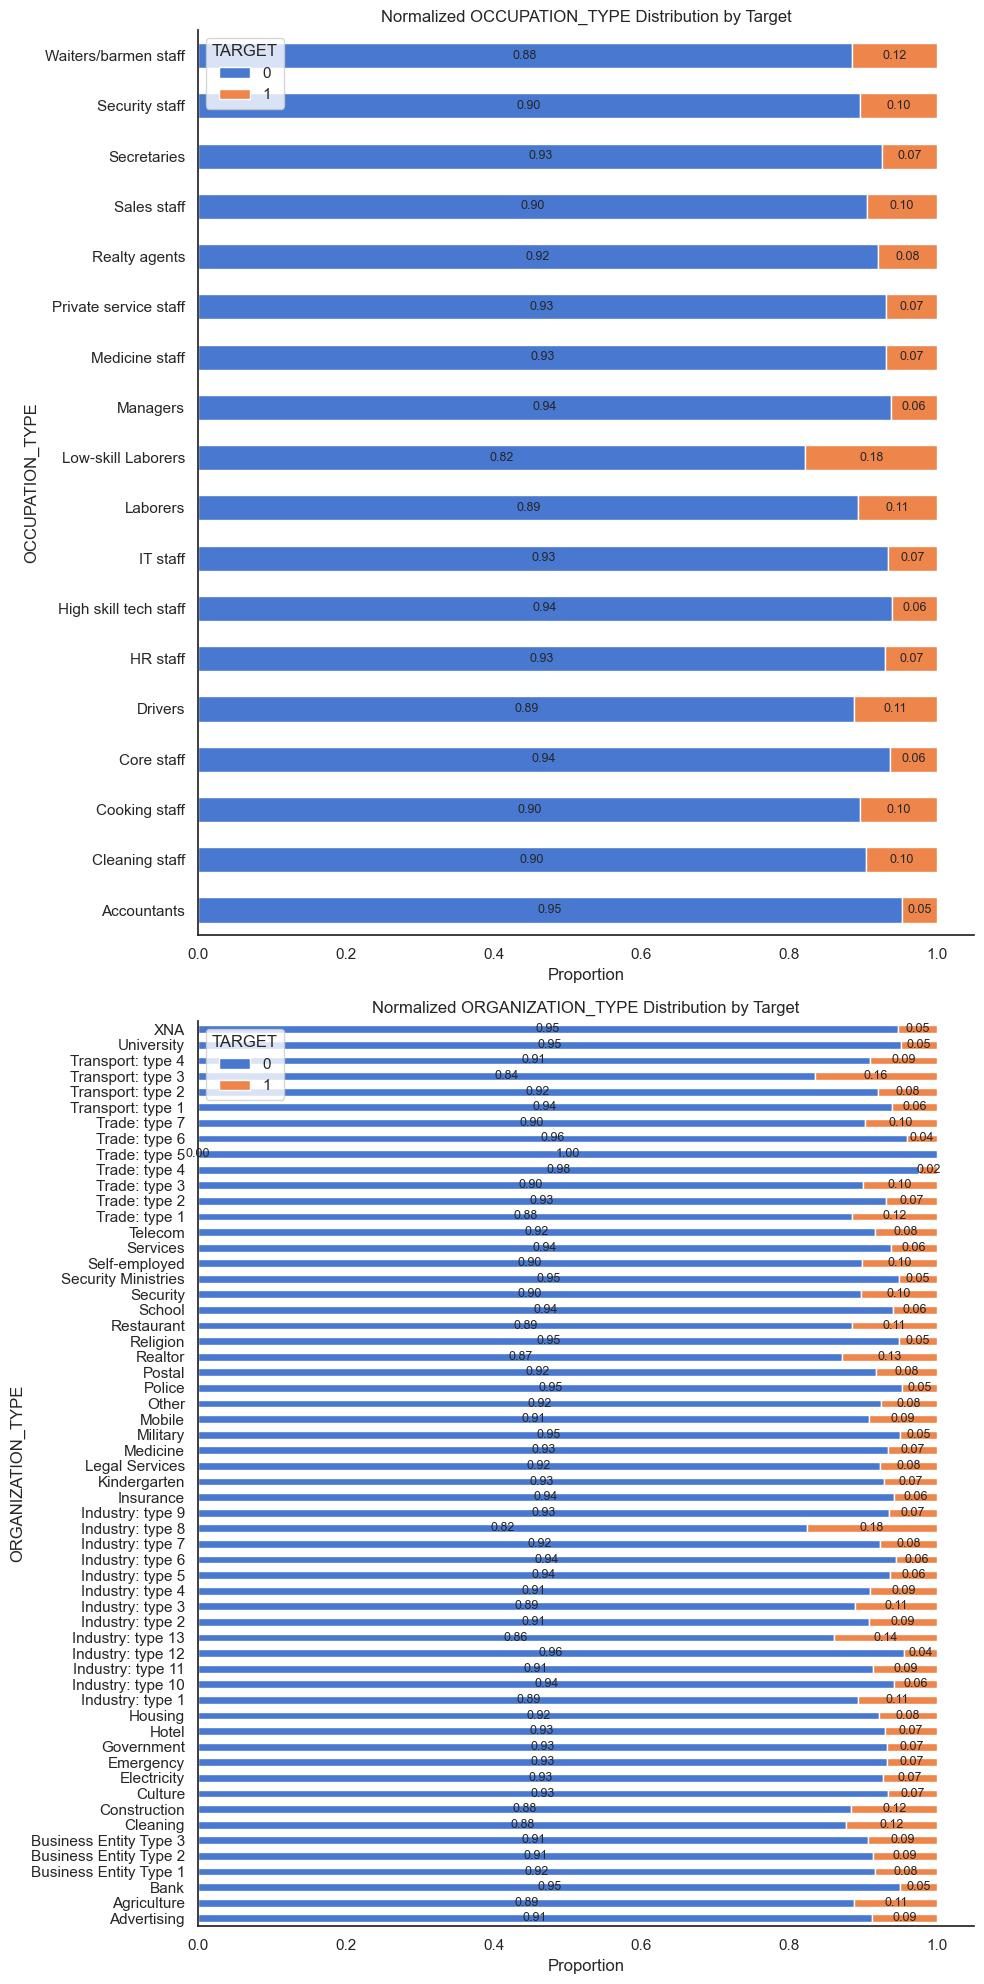

In [36]:
fig, axs = plot_normalized_counts_by_target(
    df,
    list_of_features=["OCCUPATION_TYPE", "ORGANIZATION_TYPE"],
    target="TARGET",
    nrows=2,
    ncols=1,
    figsize=(10, 20),
)

- I will use target encoding on my next round of models. (i.e. encode the features by their relationship to the TARGET class) However, could I apply this to other features? 

In [37]:
df[categorical_columns].describe()

NAME_INCOME_TYPE NAME_CONTRACT_TYPE CODE_GENDER NAME_TYPE_SUITE  \
count            196806             196806      196806          196021   
unique                8                  2           3               7   
top             Working         Cash loans           F   Unaccompanied   
freq             101584             178011      129571          159109   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                          196806             196806             196806   
unique                              5                  6                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                           139789             125868             174619   

       OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  \
count           135134                     196806                  196806   
unique              18                          7                      58   
top           Laborers                    TUESDAY  Business Entity Type 3   
freq             35367                      34570                   43523   

       FONDKAPREMONT_MODE  HOUSETYPE_MODE WALLSMATERIAL_MODE  
count               62262           98178              96859  
unique                  4               3                  7  
top      reg oper account  block of flats              Panel  
freq                47248           96409              42271

- Of all categorical features, I will target encode those with greater than 3 options. The rest I will one hot encode

My thinking is that some of these would be good for One-Hot Encoding and others for Target Encoding. 

In [38]:
df[["ORGANIZATION_TYPE", "OCCUPATION_TYPE"]].isna().sum()

ORGANIZATION_TYPE        0
OCCUPATION_TYPE      61672
dtype: int64

my solution so far has been to replace with "unknown" as a class and I believe this is a fine idea

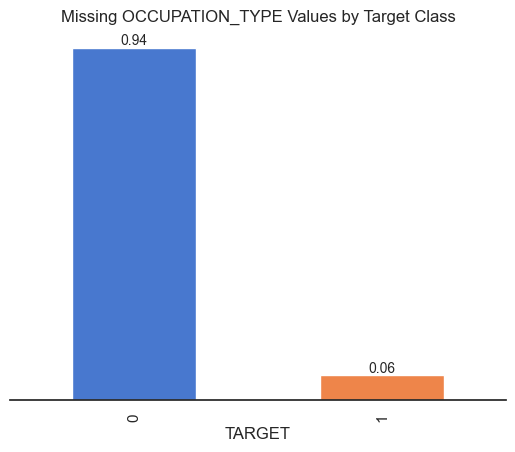

In [39]:
occ_type_missing_df = df[df["OCCUPATION_TYPE"].isna()]
colors = ["#4878CF", "#EE854A"]
ax = occ_type_missing_df["TARGET"].value_counts(normalize=True).plot.bar(color=colors)
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge", fontsize=10)
ax.spines["left"].set_visible(False)
plt.yticks([])
plt.title("Missing OCCUPATION_TYPE Values by Target Class")
plt.show()

Again, the missing values seem to more or less be similar to the distribution of the TARGET class

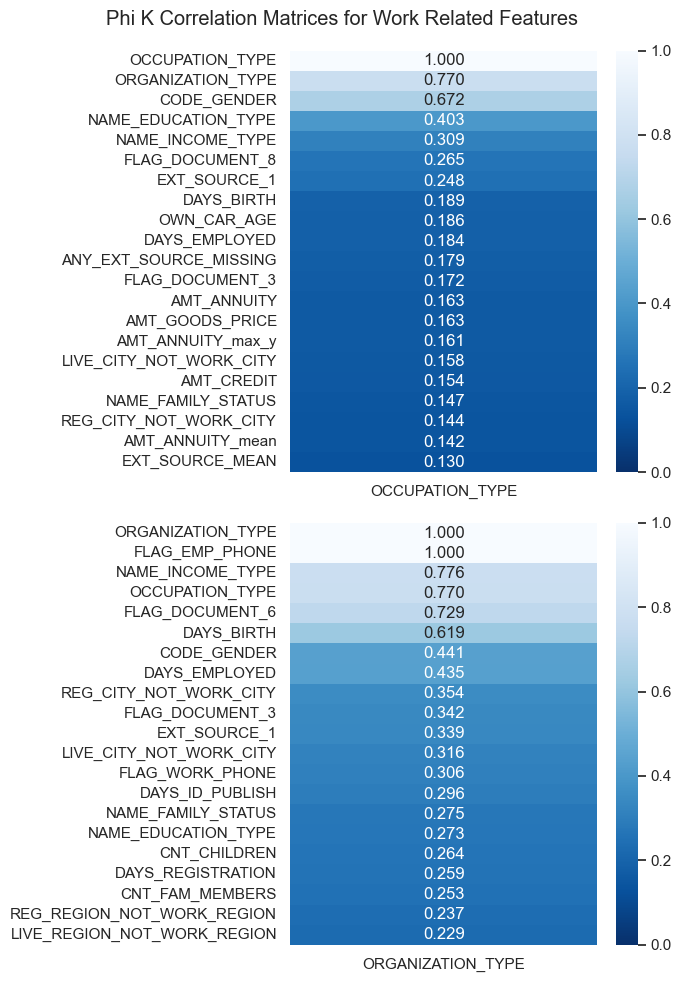

In [40]:
fig, axs, work_corr_dfs = plot_subplots_correlation_matrix(
    corr_mat,
    ["OCCUPATION_TYPE", "ORGANIZATION_TYPE"],
    n_features=20,
    nrows=2,
    ncols=1,
    figsize=(7, 10),
    title="Phi K Correlation Matrices for Work Related Features",
)

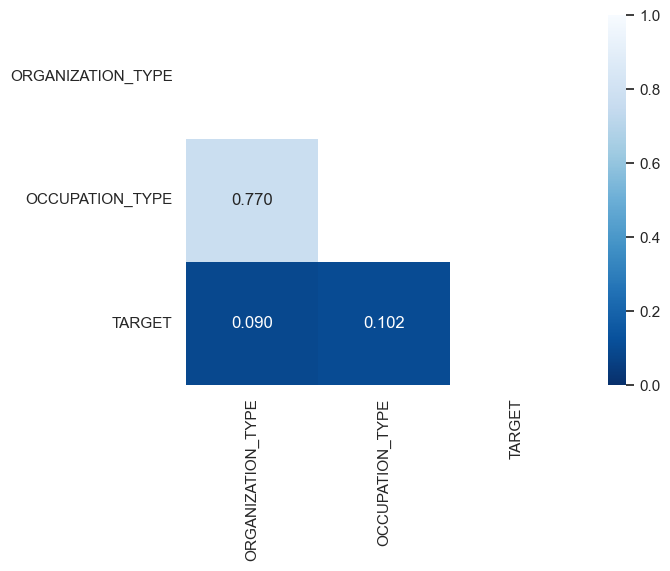

In [41]:
target_corr_work = corr_mat.loc[
    ["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "TARGET"],
    ["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "TARGET"],
]
vmin = 0
vmax = 1
sns.heatmap(
    target_corr_work,
    annot=True,
    fmt=".3f",
    cmap="Blues_r",
    vmin=vmin,
    vmax=vmax,
    mask=np.triu(np.ones_like(target_corr_work)),
)
plt.show()

In [42]:
top_correlated_features_idx = reduce(
    lambda x, y: x.union(y), (df.index for df in work_corr_dfs)
)
corr_ext_feats = df[list(top_correlated_features_idx)]
corr_ext_feats

AMT_ANNUITY  AMT_ANNUITY_max_y  AMT_ANNUITY_mean    AMT_CREDIT  \
0       23773.50000        17311.81445       10261.94531  808650.00000   
1       39199.50000        35786.60938       16588.20117  733315.50000   
2       18040.50000         6096.87012        6096.87012  555273.00000   
3       40320.00000        68034.19531       33062.33203  835380.00000   
4       50544.00000        59074.33594       31969.91406 1724220.00000   
...             ...                ...               ...           ...   
196801  13500.00000         6857.81982        6278.87207  270000.00000   
196802  11488.50000        11889.31543        9462.82520  225000.00000   
196803  23089.50000                NaN               NaN  521280.00000   
196804  12375.00000         6773.85010        6773.85010  247500.00000   
196805  33646.50000        25932.91406       13674.60645  450000.00000   

        AMT_GOODS_PRICE  ANY_EXT_SOURCE_MISSING  CNT_CHILDREN  \
0          675000.00000                    True             0   
1          679500.00000                   False             0   
2          463500.00000                   False             0   
3          675000.00000                   False             1   
4         1350000.00000                    True             0   
...                 ...                     ...           ...   
196801     270000.00000                   False             0   
196802     225000.00000                    True             0   
196803     450000.00000                    True             0   
196804     247500.00000                    True             0   
196805     450000.00000                   False             0   

        CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  ...  LIVE_CITY_NOT_WORK_CITY  \
0               1.00000           F      -19705  ...                    False   
1               1.00000           F      -14010  ...                    False   
2               2.00000           F      -18047  ...                    False   
3               3.00000           F      -16037  ...                     True   
4               2.00000           M      -18036  ...                    False   
...                 ...         ...         ...  ...                      ...   
196801          2.00000           F       -8383  ...                    False   
196802          2.00000           F      -17379  ...                    False   
196803          1.00000           M      -11894  ...                    False   
196804          2.00000           F      -18279  ...                    False   
196805          2.00000           F      -21810  ...                    False   

        LIVE_REGION_NOT_WORK_REGION            NAME_EDUCATION_TYPE  \
0                             False  Secondary / secondary special   
1                             False               Higher education   
2                             False  Secondary / secondary special   
3                             False  Secondary / secondary special   
4                             False  Secondary / secondary special   
...                             ...                            ...   
196801                        False  Secondary / secondary special   
196802                        False  Secondary / secondary special   
196803                        False               Higher education   
196804                        False               Higher education   
196805                        False  Secondary / secondary special   

          NAME_FAMILY_STATUS      NAME_INCOME_TYPE        OCCUPATION_TYPE  \
0                  Separated               Working             Core staff   
1       Single / not married  Commercial associate  Private service staff   
2                    Married               Working  High skill tech staff   
3                    Married               Working             Core staff   
4                    Married               Working                Drivers   
...                      ...                   ...            

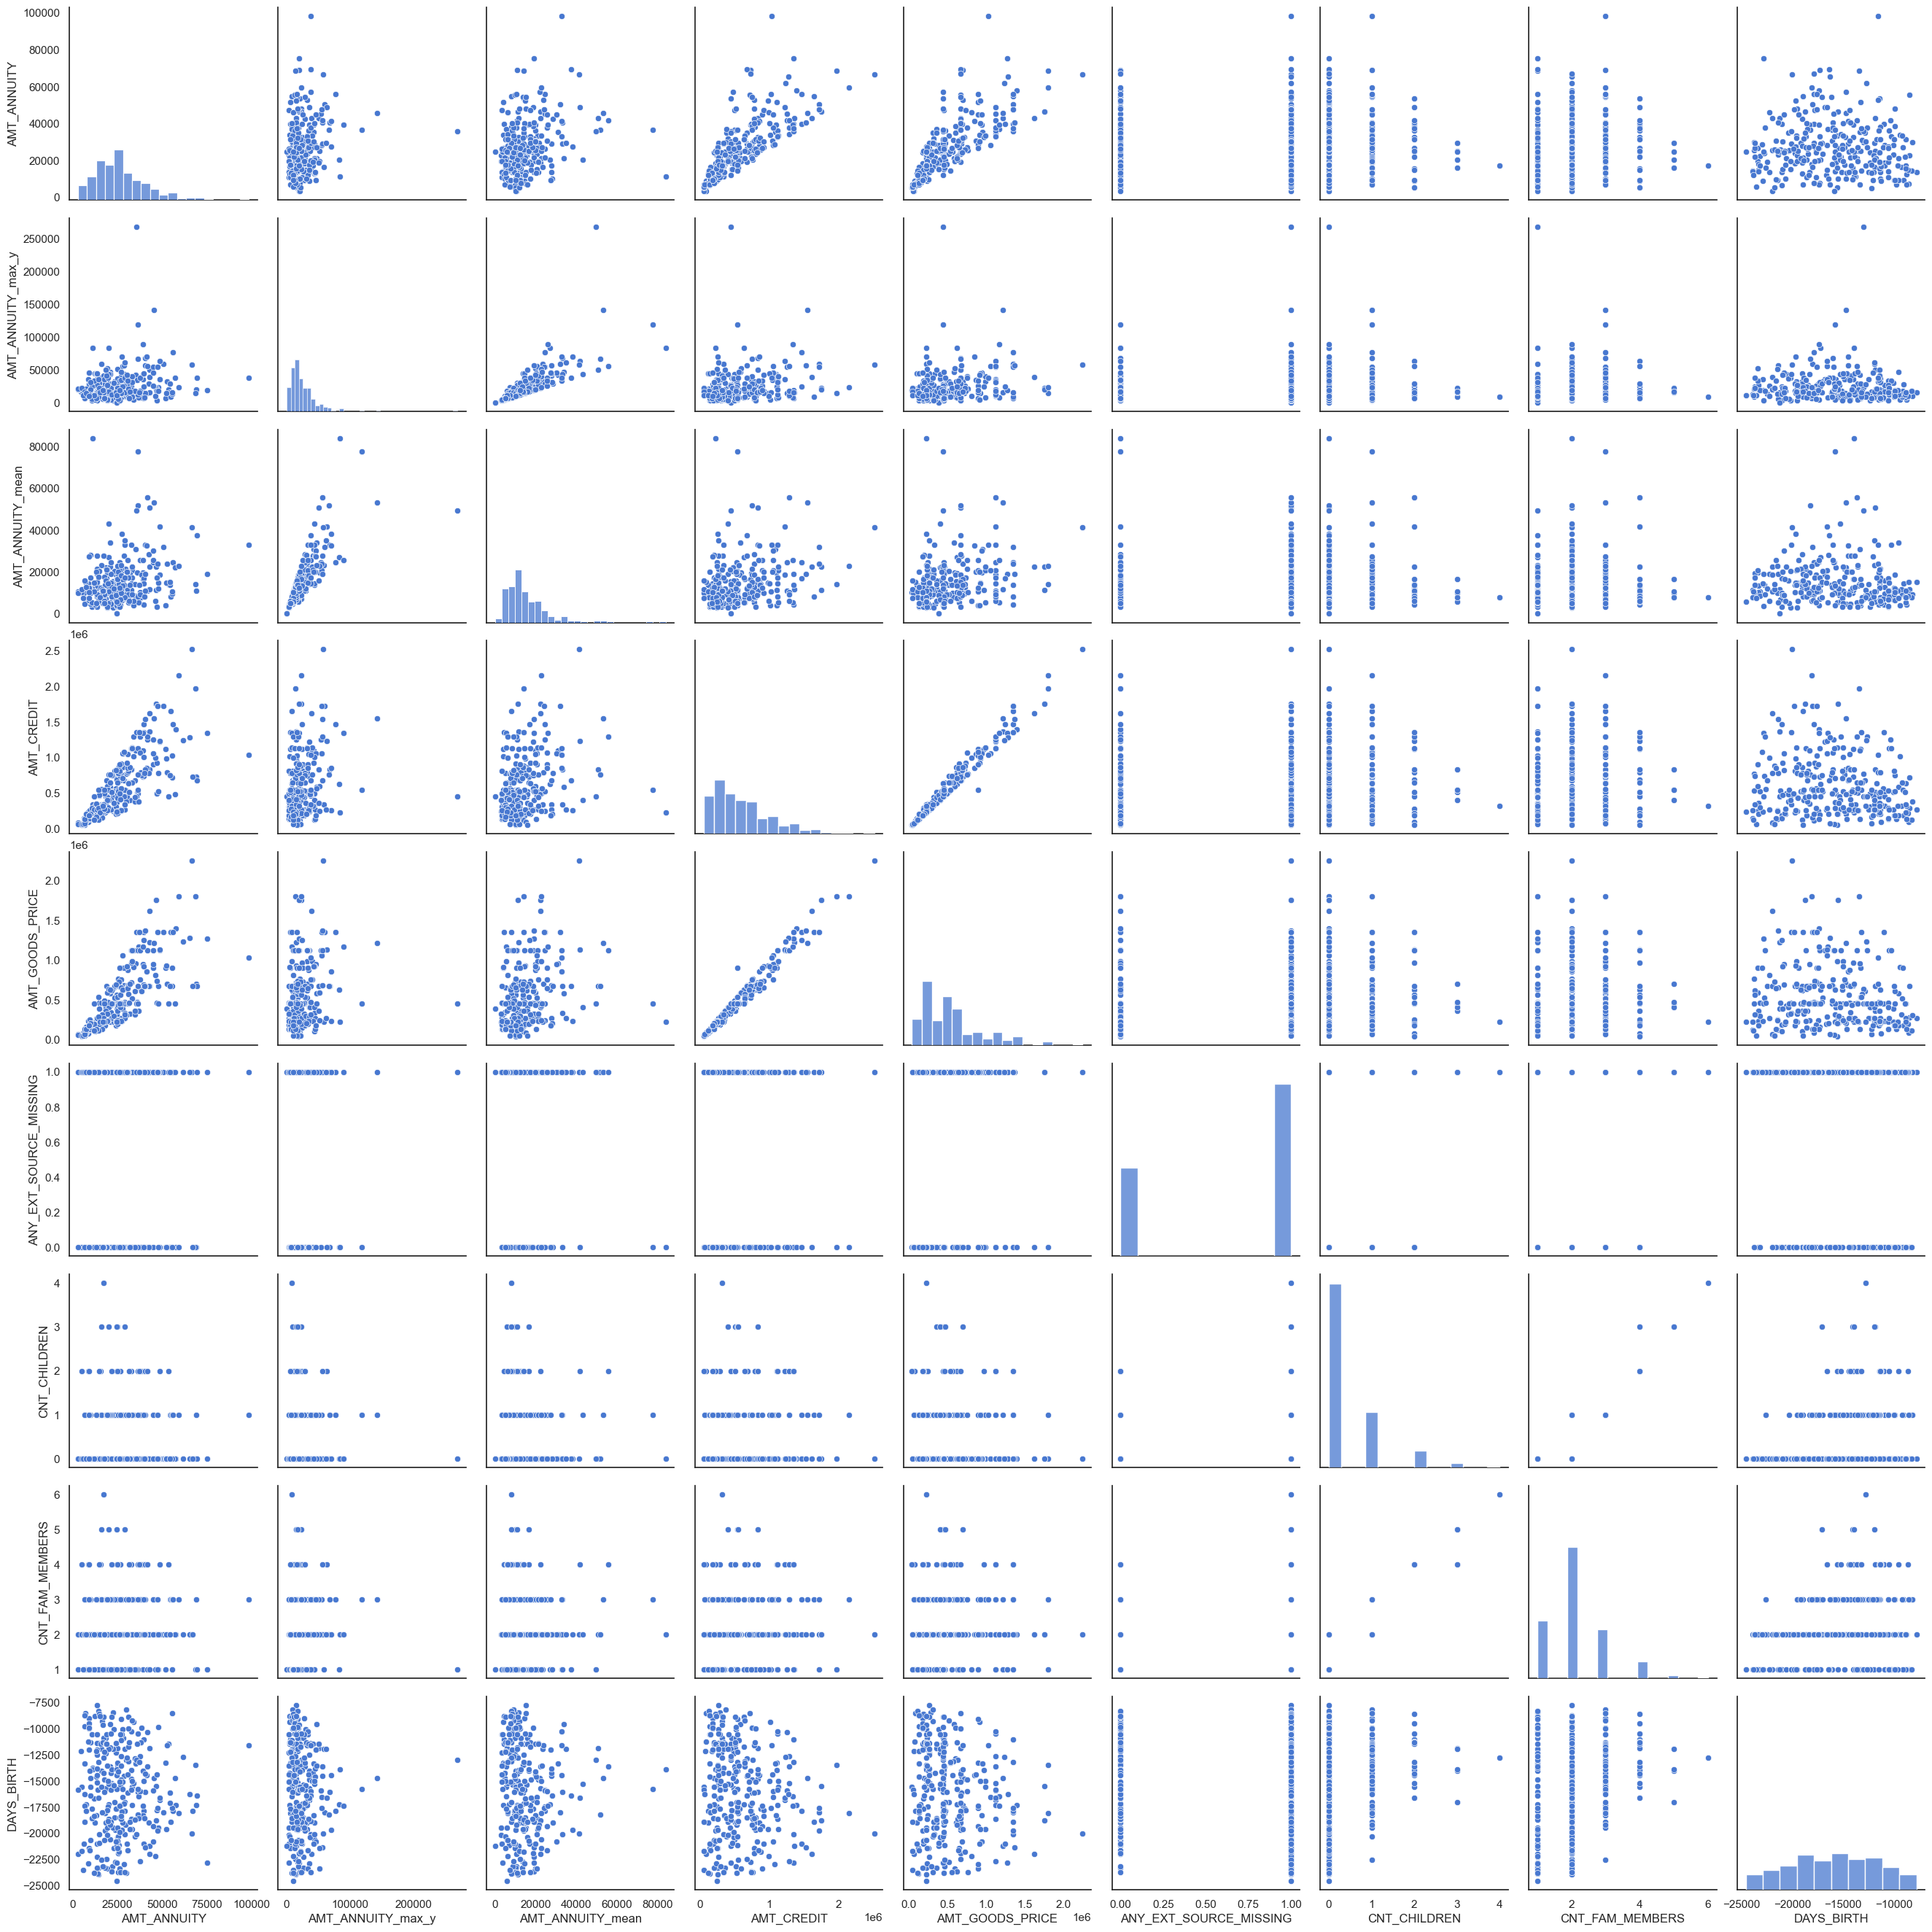

In [43]:
g = sns.pairplot(data=corr_ext_feats.iloc[0:301, 0:10], height=3, aspect=1)

# CODE_GENDER

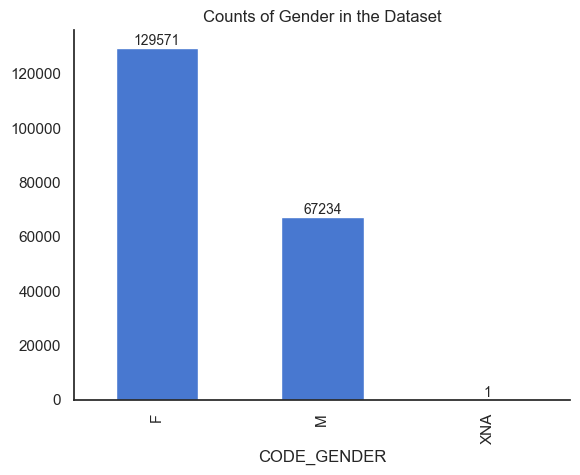

In [44]:
ax = df["CODE_GENDER"].value_counts().plot.bar()
ax.bar_label(ax.containers[0], label_type="edge", fontsize=10)
plt.title("Counts of Gender in the Dataset")
plt.show()

In [45]:
df[df["CODE_GENDER"] == "XNA"]

HOUR_APPR_PROCESS_START_sin  HOUR_APPR_PROCESS_START_cos  \
167055                     -0.81697                     -0.57668   

        FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
167055            False            False            False            False   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
167055            False            False            False            False   

        ...  NUM_INSTALMENT_NUMBER_std  NUM_INSTALMENT_VERSION_min  \
167055  ...                    4.17088                     1.00000   

        NUM_INSTALMENT_VERSION_max  NUM_INSTALMENT_VERSION_mean  TARGET  \
167055                     4.00000                      1.09160       0   

        LOG_EXT_SOURCE_1  LOG_EXT_SOURCE_2  LOG_EXT_SOURCE_3  \
167055           0.50249           0.50603           0.30792   

        LOG_EXT_SOURCE_MEAN  LOG_EXT_SOURCE_STD  
167055              0.44284             0.15735  

[1 rows x 250 columns]

XNA exists as a class with no instances, but I would guess that somewhere in the dataset there are non-F or non-M entries that I will have to deal with. 
I can use a custom transformer such as the example you see below:

```python
from sklearn.base import BaseEstimator, TransformerMixin


class GenderConverter(BaseEstimator, TransformerMixin):
    def __init__(self, valid_genders=["M", "F"], replace_value="XNA"):
        self.valid_genders = valid_genders
        self.replace_value = replace_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_converted = X.applymap(
            lambda x: x if x in self.valid_genders else self.replace_value
        )
        return X_converted

due to low cardinality I will probably one-hot encode this variable, as opposed to target encode it like I will with other variables. 

```python
# When fitting OneHotEncoder, explicitly handle unknown categories
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')  # 'ignore' will prevent errors for unseen categories
encoder.fit(train_data[['gender']])

# During prediction, if 'XNA' appears, it will create a new category
encoded_test_data = encoder.transform(test_data[['gender']])
```
something like this will help me to deal with XNA if I run into it in other datasets

In [46]:
df["CODE_GENDER"].describe()

count     196806
unique         3
top            F
freq      129571
Name: CODE_GENDER, dtype: object

In [47]:
gender_missing = df["CODE_GENDER"].isna().sum()
print(f"There are {gender_missing} missing observations for gender.")

There are 0 missing observations for gender.


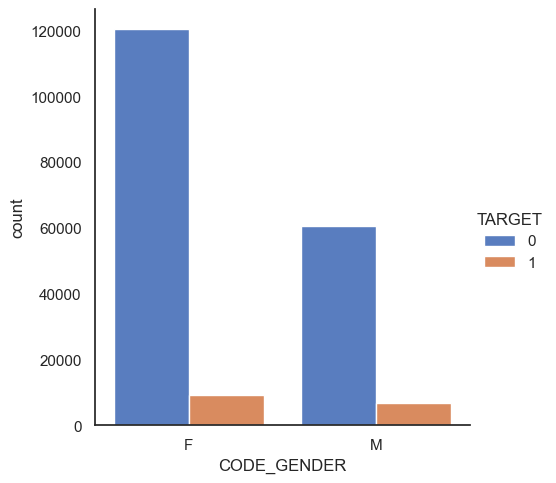

In [48]:
gender_filtered_df = df[df["CODE_GENDER"] != "XNA"]
gender_categories = gender_filtered_df["CODE_GENDER"].unique()
ax = sns.catplot(
    x="CODE_GENDER",
    hue="TARGET",
    data=gender_filtered_df,
    kind="count",
    order=gender_categories,
)
plt.show()

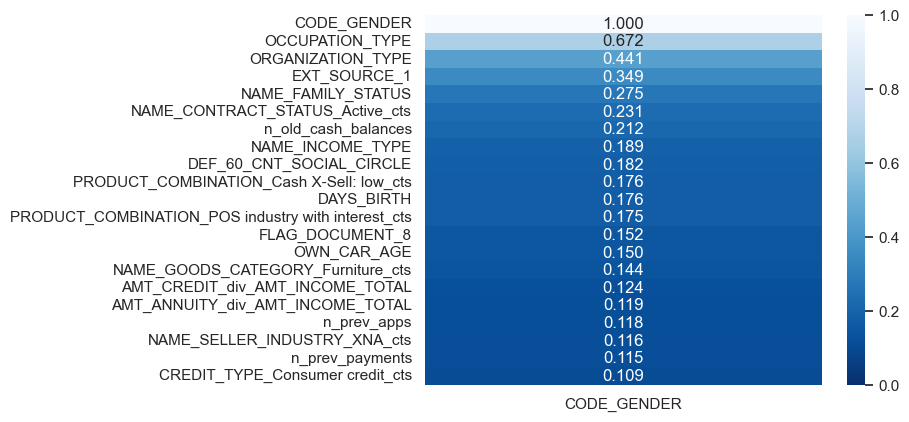

In [49]:
sns.heatmap(
    pd.DataFrame(corr_mat["CODE_GENDER"].sort_values(ascending=False)[:21]),
    annot=True,
    fmt=".3f",
    cmap="Blues_r",
    vmin=0,
    vmax=1,
)
plt.show()

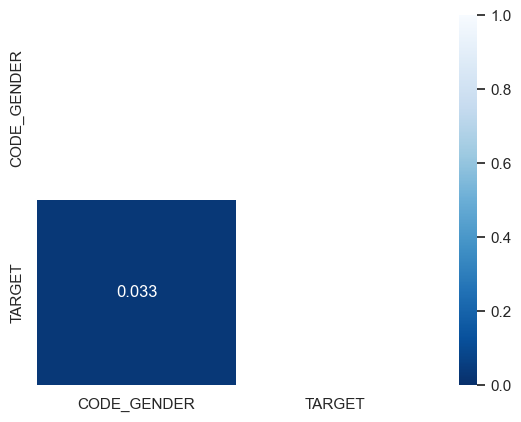

In [50]:
target_corr_gender = corr_mat.loc[["CODE_GENDER", "TARGET"], ["CODE_GENDER", "TARGET"]]
vmin = 0
vmax = 1
sns.heatmap(
    target_corr_gender,
    annot=True,
    fmt=".3f",
    cmap="Blues_r",
    vmin=vmin,
    vmax=vmax,
    mask=np.triu(np.ones_like(target_corr_gender)),
)
plt.show()

# AMT_CREDIT, AMT_ANNUITY, CREDIT ANNUITY RATIO
- __AMT_CREDIT__: Credit Amount of the Loan 
- __AMT_ANNUITY__: Loan Annuity (Annuity refers to a loan with a monthly payment that is always the same amount)

In [51]:
df["CREDIT_ANNUITY_RATIO"] = df["AMT_CREDIT"] / df["AMT_ANNUITY"]

In [52]:
credit_annuity_columns = ["AMT_CREDIT", "AMT_ANNUITY", "CREDIT_ANNUITY_RATIO"]

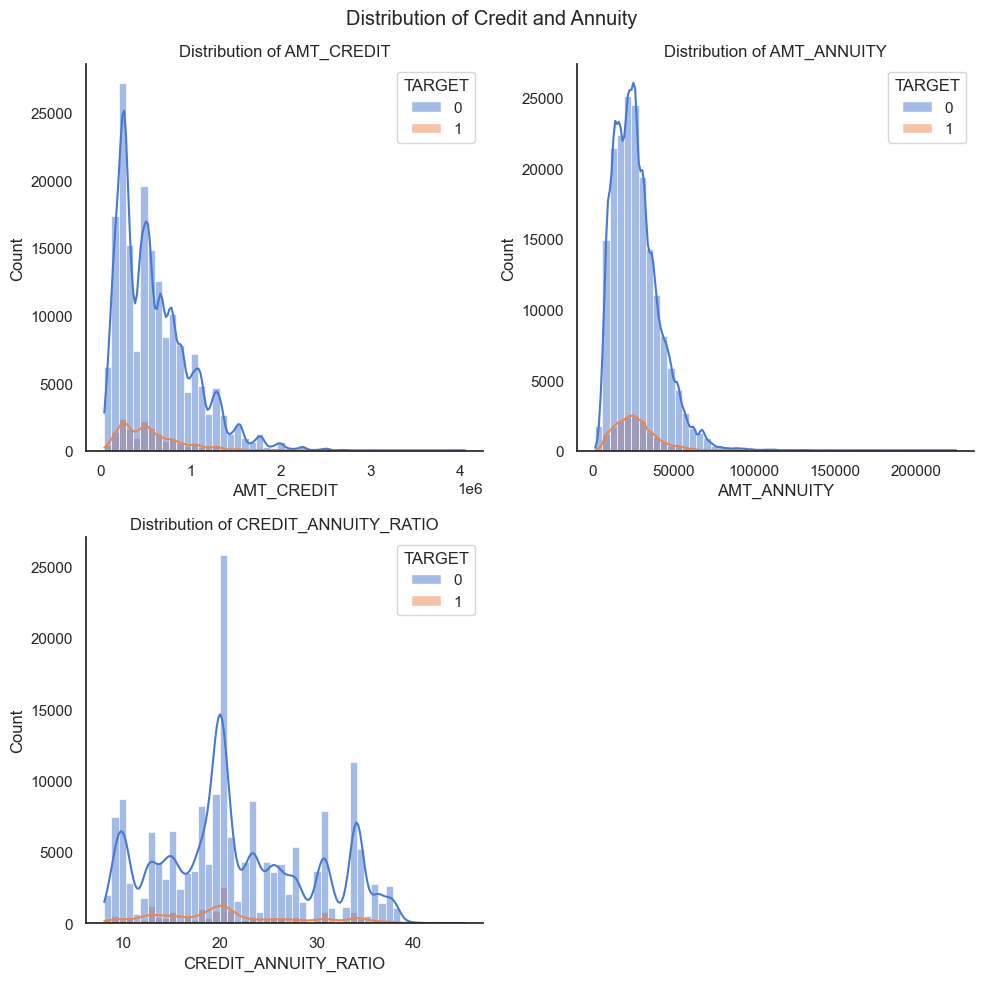

In [53]:
fig, axs = subplot_sns_histogram(
    df,
    credit_annuity_columns,
    hue="TARGET",
    title="Distribution of Credit and Annuity",
    nrows=2,
    ncols=2,
    figsize=(10, 10),
    bins=50,
)

These are rightward skewed distributions. I will consider a log transformation. While tree based models will work fine with the skew, I prefer data to be robust across models, so I will attempt to see how it looks like with a transform. 

In [54]:
df["log_AMT_CREDIT"] = np.log(df["AMT_CREDIT"])
df["log_AMT_ANNUITY"] = np.log(df["AMT_ANNUITY"])
df["CREDIT_ANNUITY_log_RATIO"] = df["log_AMT_CREDIT"] / df["log_AMT_ANNUITY"]

In [55]:
credit_annuity_columns = [
    "AMT_CREDIT",
    "log_AMT_CREDIT",
    "AMT_ANNUITY",
    "log_AMT_ANNUITY",
    "CREDIT_ANNUITY_RATIO",
    "CREDIT_ANNUITY_log_RATIO",
]

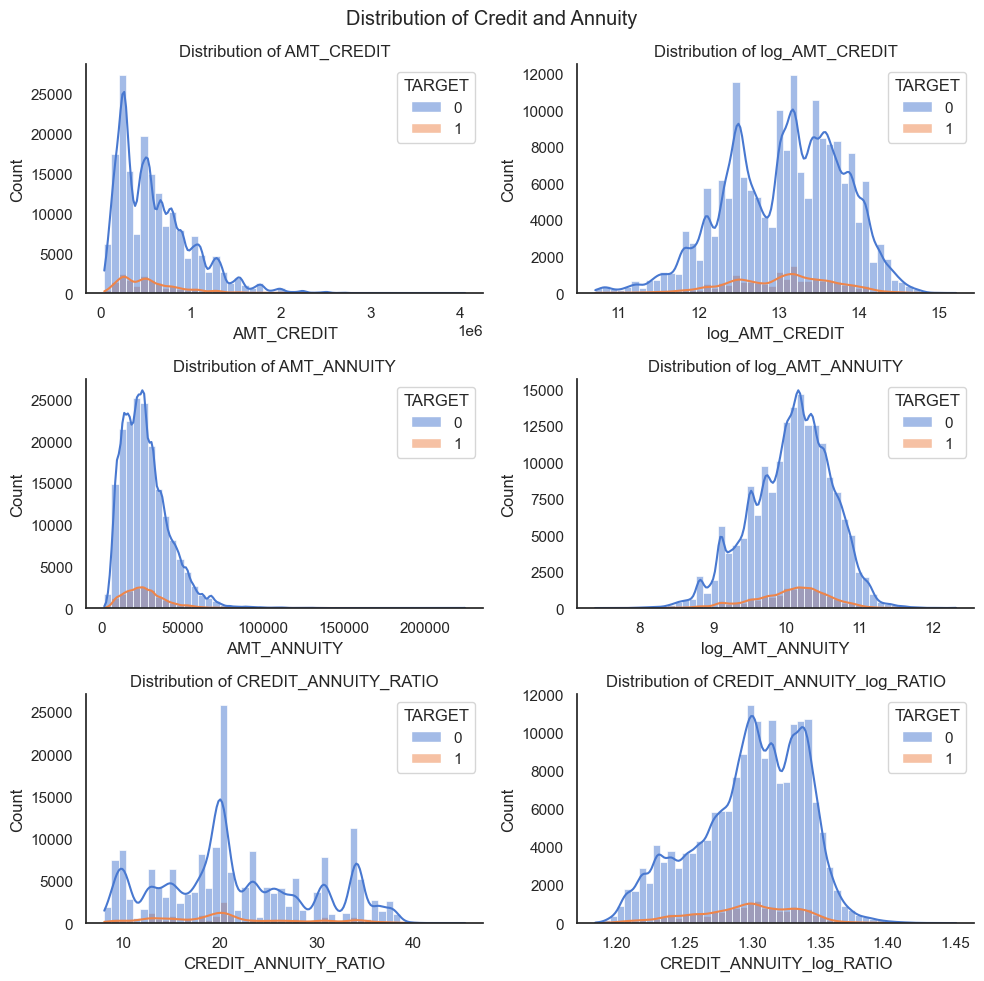

In [56]:
fig, axs = subplot_sns_histogram(
    df,
    credit_annuity_columns,
    hue="TARGET",
    title="Distribution of Credit and Annuity",
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    bins=50,
)

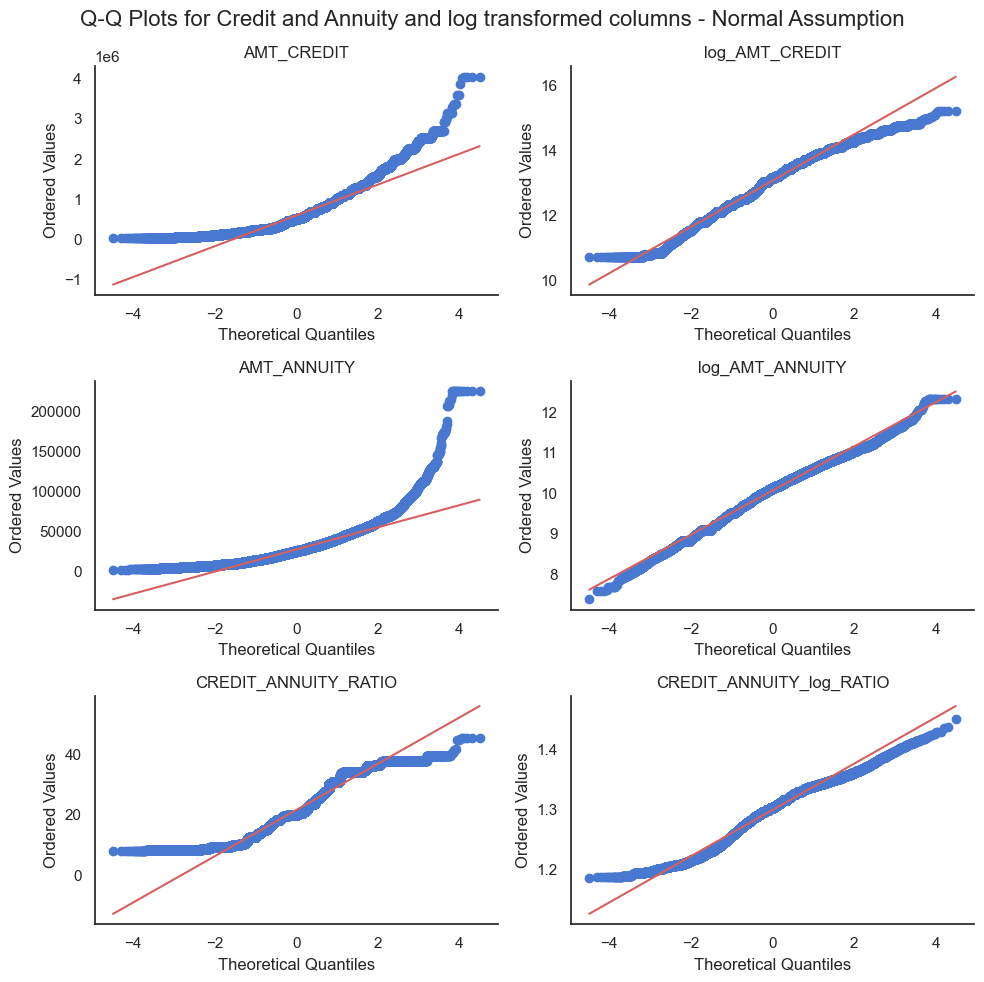

In [57]:
fig, axs = plot_feature_qqplot_subplot(
    df,
    credit_annuity_columns,
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    title="Q-Q Plots for Credit and Annuity and log transformed columns - Normal Assumption",
)

These log transforms clearly are effective at stabilizing the variance in these distributions and making them more normal.

In [58]:
df[["AMT_CREDIT", "AMT_ANNUITY", "CREDIT_ANNUITY_RATIO"]].isna().sum()

AMT_CREDIT              0
AMT_ANNUITY             8
CREDIT_ANNUITY_RATIO    8
dtype: int64

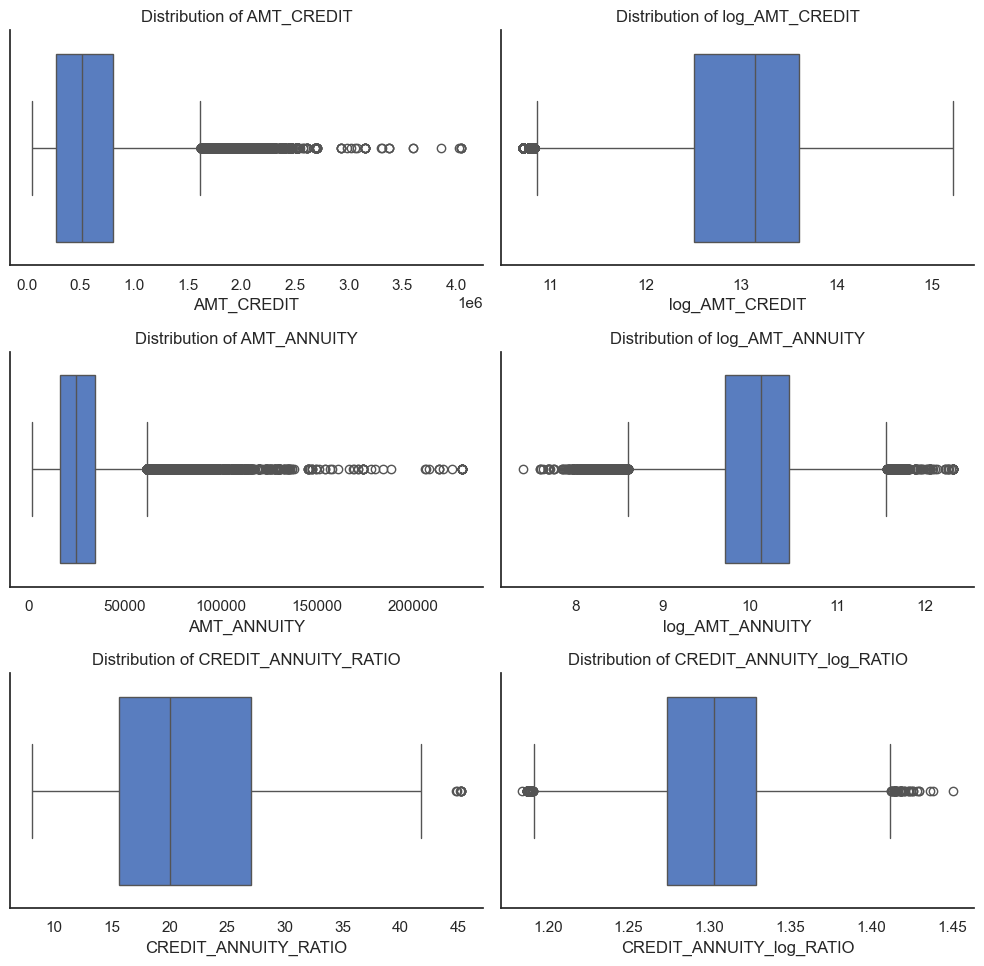

In [59]:
fig, axs = subplot_sns_boxplot(
    df, list_of_features=credit_annuity_columns, nrows=3, ncols=2, figsize=(10, 10)
)

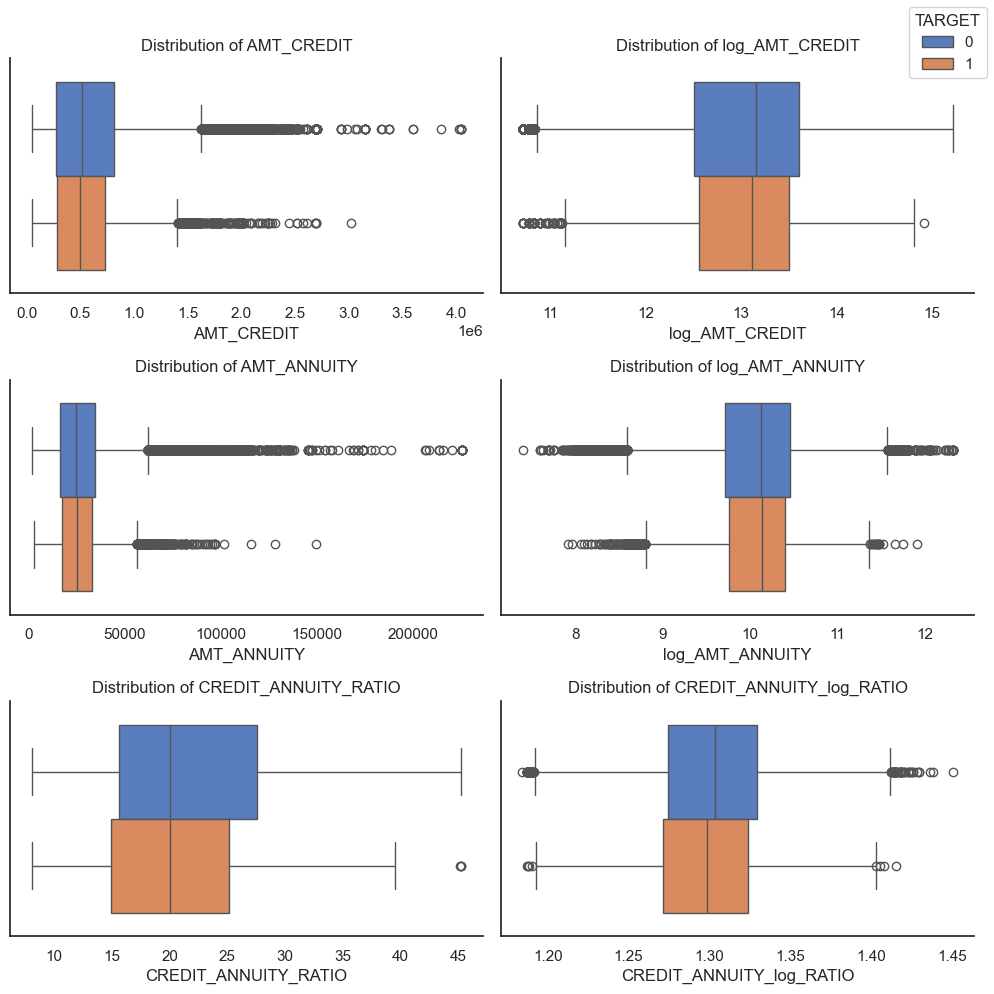

In [60]:
fig, axs = subplot_sns_boxplot(
    df,
    list_of_features=credit_annuity_columns,
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    hue="TARGET",
)

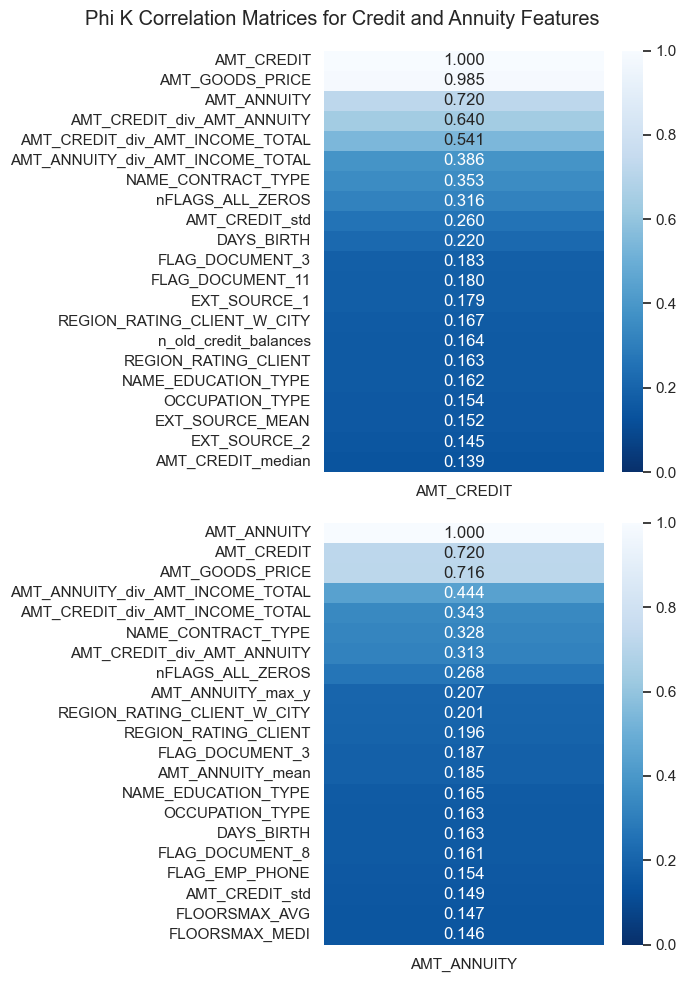

In [61]:
fig, axs, credit_annuity_corr_dfs = plot_subplots_correlation_matrix(
    corr_mat,
    ["AMT_CREDIT", "AMT_ANNUITY"],
    n_features=20,
    nrows=2,
    ncols=1,
    figsize=(7, 10),
    title="Phi K Correlation Matrices for Credit and Annuity Features",
)

In [62]:
top_correlated_features_idx = reduce(
    lambda x, y: x.union(y), (df.index for df in credit_annuity_corr_dfs)
)
corr_credit_feats = df[list(top_correlated_features_idx)]
corr_credit_feats

AMT_ANNUITY  AMT_ANNUITY_div_AMT_INCOME_TOTAL  AMT_ANNUITY_max_y  \
0       23773.50000                           0.21132        17311.81445   
1       39199.50000                           0.14518        35786.60938   
2       18040.50000                           0.16036         6096.87012   
3       40320.00000                           0.13785        68034.19531   
4       50544.00000                           0.24960        59074.33594   
...             ...                               ...                ...   
196801  13500.00000                           0.06000         6857.81982   
196802  11488.50000                           0.06382        11889.31543   
196803  23089.50000                           0.12828                NaN   
196804  12375.00000                           0.09167         6773.85010   
196805  33646.50000                           0.37385        25932.91406   

        AMT_ANNUITY_mean    AMT_CREDIT  AMT_CREDIT_div_AMT_ANNUITY  \
0            10261.94531  808650.00000                    34.01476   
1            16588.20117  733315.50000                    18.70727   
2             6096.87012  555273.00000                    30.77925   
3            33062.33203  835380.00000                    20.71875   
4            31969.91406 1724220.00000                    34.11325   
...                  ...           ...                         ...   
196801        6278.87207  270000.00000                    20.00000   
196802        9462.82520  225000.00000                    19.58480   
196803               NaN  521280.00000                    22.57650   
196804        6773.85010  247500.00000                    20.00000   
196805       13674.60645  450000.00000                    13.37435   

        AMT_CREDIT_div_AMT_INCOME_TOTAL  AMT_CREDIT_median  AMT_CREDIT_std  \
0                               7.18800       113832.00000    120130.09192   
1                               2.71598       106598.25000    330894.17889   
2                               4.93576        54877.50000         0.00000   
3                               2.85600       450000.00000    469992.32022   
4                               8.51467       638673.75000    833293.87538   
...                                 ...                ...             ...   
196801                          1.20000        92952.00000     20892.88406   
196802                          1.25000        18625.50000     49825.26945   
196803                          2.89600                NaN             NaN   
196804                          1.83333        66744.00000         0.00000   
196805                          5.00000       198756.00000    194619.83320   

        AMT_GOODS_PRICE  ...  FLAG_EMP_PHONE  FLOORSMAX_AVG  FLOORSMAX_MEDI  \
0          675000.00000  ...            True        0.33325         0.33325   
1          679500.00000  ...            True        0.16675         0.16675   
2          463500.00000  ...            True            NaN             NaN   
3          675000.00000  ...            True            NaN             NaN   
4         1350000.00000  ...            True            NaN             NaN   
...                 ...  ...             ...            ...             ...   
196801     270000.00000  ...            True        0.16675         0.16675   
196802     225000.00000  ...            True            NaN             NaN   
196803     450000.00000  ...            True            NaN             NaN   
196804     247500.00000  ...            True        0.36084         0.37500   
196805     450000.00000  ...           False        0.16675         0.16675   

        NAME_CONTRACT_TYPE            NAME_EDUCATION_TYPE  \
0               Cash loans  Secondary / secondary special   
1               Cash loans               Higher education   
2               Cash loans  Secondary / secondary special   
3               Cash loans  Secondary / secondary special   
4               Cash loans  Secondary / secondary special   
..

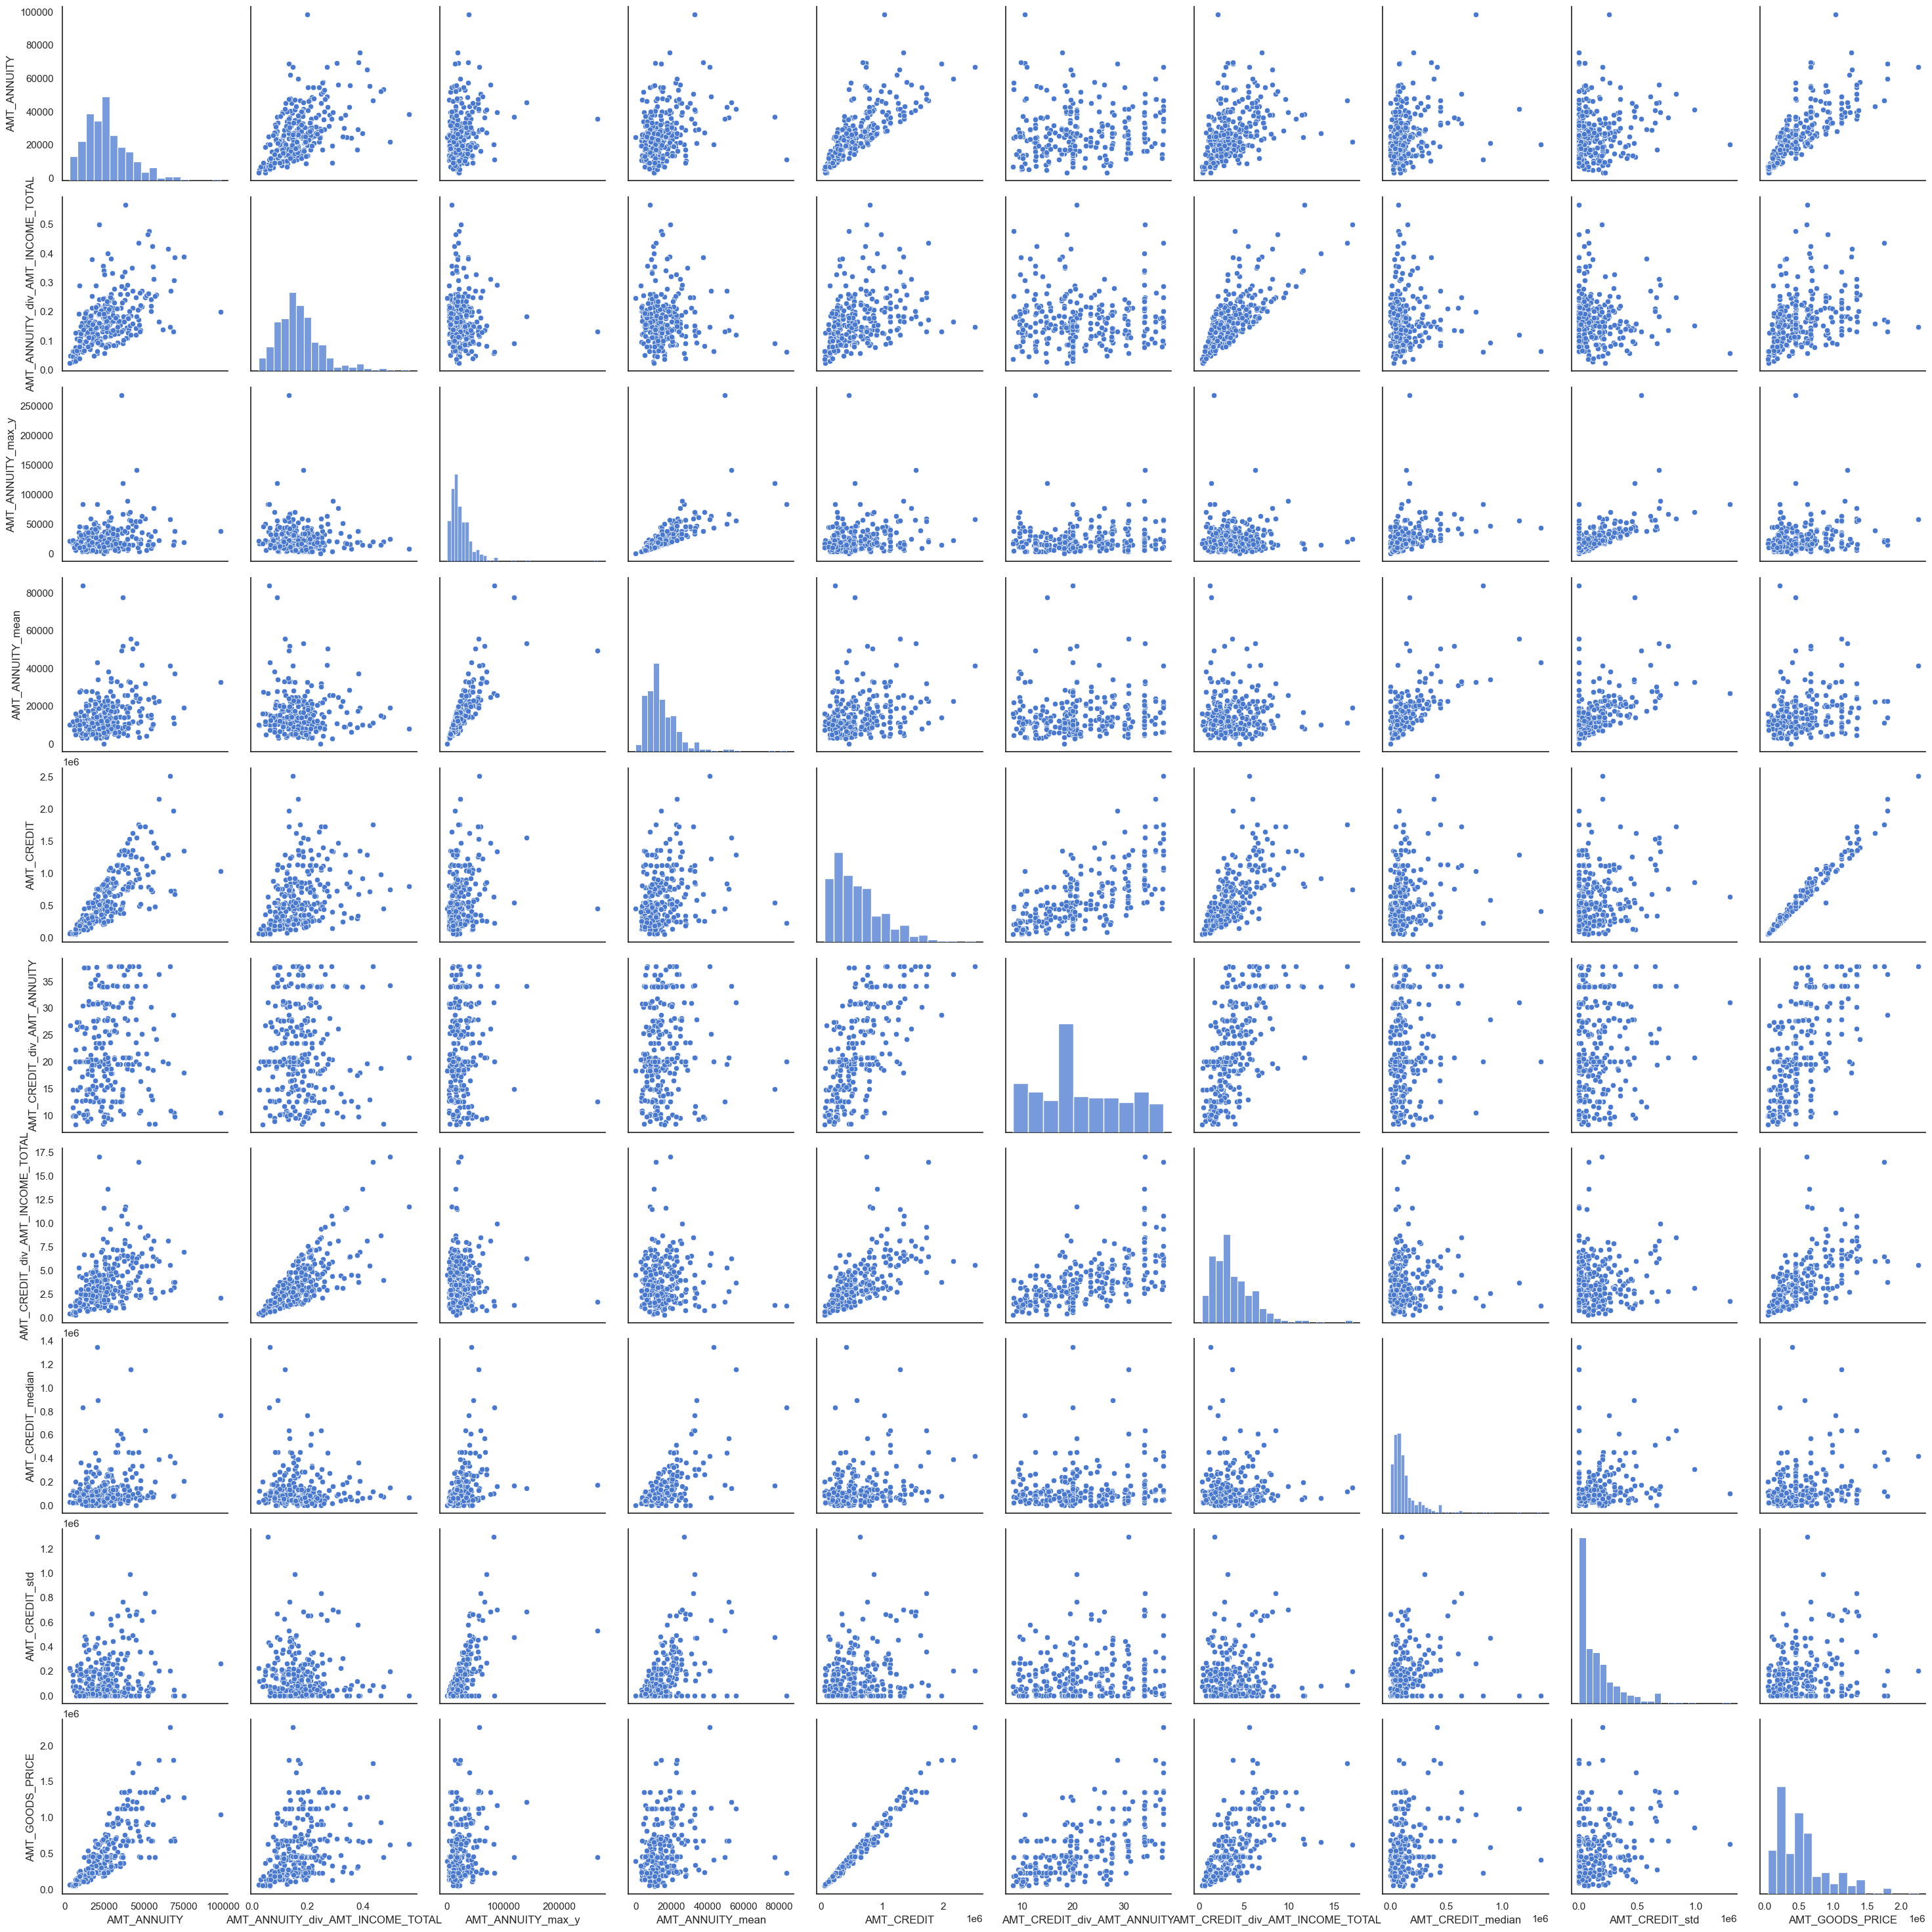

In [63]:
g = sns.pairplot(data=corr_credit_feats.iloc[0:301, 0:10], height=3, aspect=1)

# n_cb_applications, n_old_cash_balances, n_old_credit_balances, n_prev_apps, n_prev_payments
These are features that I generate when aggregating supplementary data
- __n_cb_applications__: number of entries used in aggregation of bureau.csv entries 
- __n_old_cash_balances__: number of entries used in aggregation of credit_card_balance.csv entries 
- __n_old_credit_balances__: number of entries used in aggregation of POS_CASH_balance.csv entries 
- __n_prev_apps__: number of entries used in aggregation of previous_application.csv entries 
- __n_prev_payments__: number of entries used in aggregation of installments_payments.csv entries 


In [64]:
agg_feats = [
    "n_cb_applications",
    "n_old_cash_balances",
    "n_old_credit_balances",
    "n_prev_apps",
    "n_prev_payments",
]

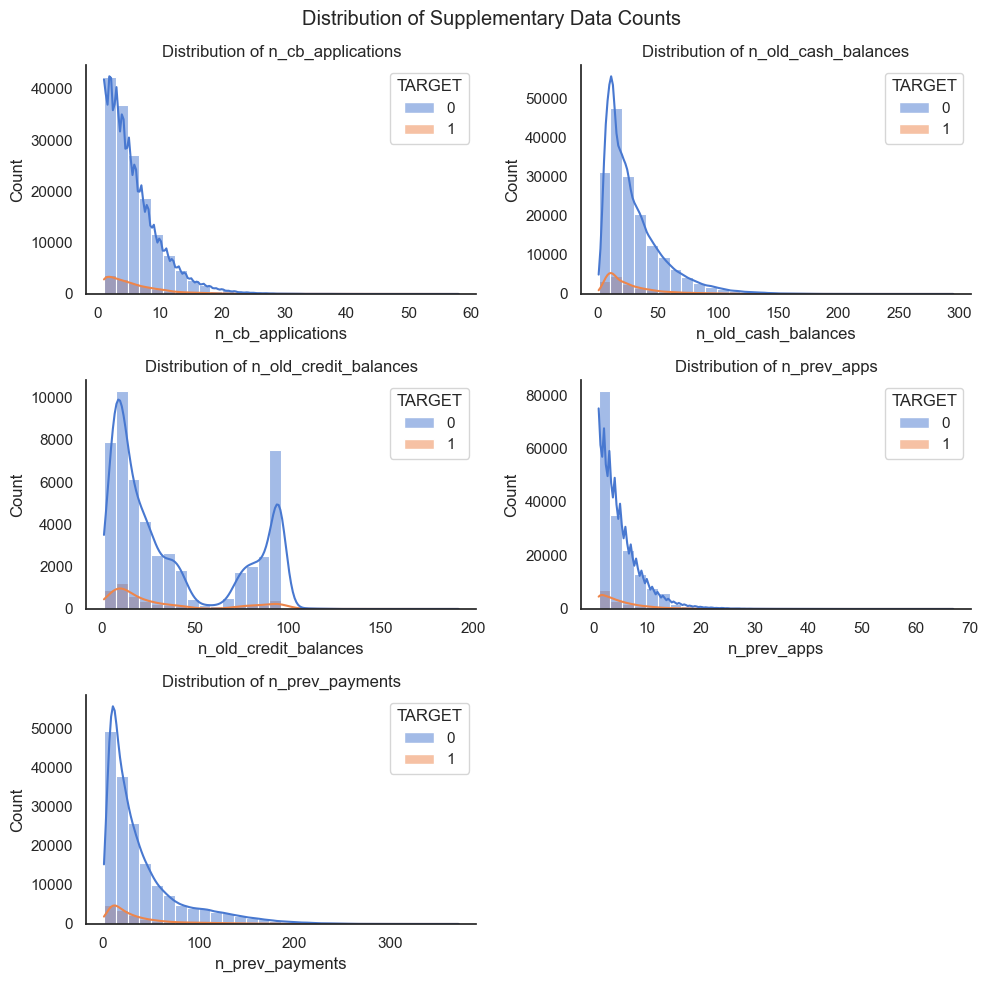

In [65]:
fig, axs = subplot_sns_histogram(
    df,
    agg_feats,
    hue="TARGET",
    title="Distribution of Supplementary Data Counts",
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    bins=30,
)

What would the log transform of each of these counts look like? 

In [66]:
agg_feats = [
    "n_cb_applications",
    "n_old_cash_balances",
    "n_old_credit_balances",
    "n_prev_apps",
    "n_prev_payments",
]
for feat in agg_feats:
    df[f"log_{feat}"] = np.log(df[feat])
log_agg_feats = [
    "log_n_cb_applications",
    "log_n_old_cash_balances",
    "log_n_old_credit_balances",
    "log_n_prev_apps",
    "log_n_prev_payments",
]

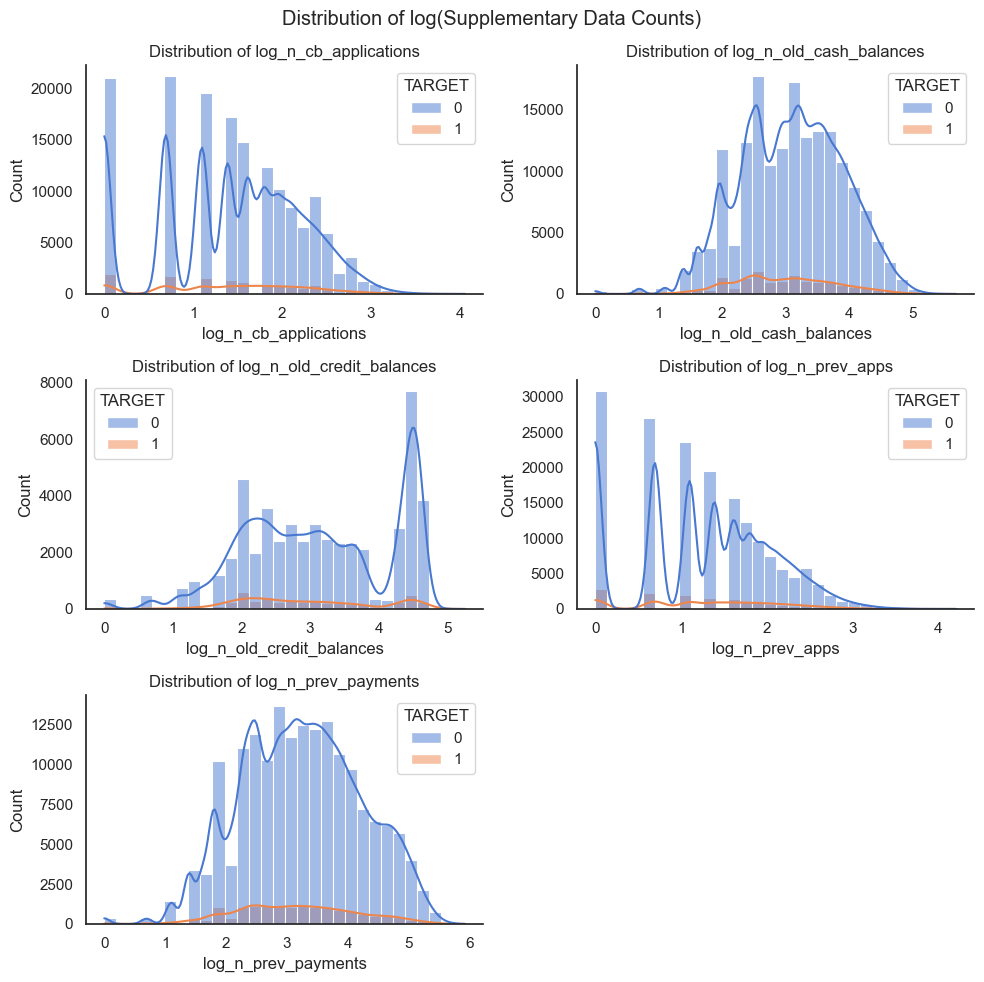

In [67]:
fig, axs = subplot_sns_histogram(
    df,
    log_agg_feats,
    hue="TARGET",
    title="Distribution of log(Supplementary Data Counts)",
    nrows=3,
    ncols=2,
    figsize=(10, 10),
    bins=30,
)

In [68]:
df["log_n_cb_applications"] = np.log(df["n_cb_applications"])
df["log_n_old_cash_balances"] = np.log(df["n_old_cash_balances"])
df["log_n_old_credit_balances"] = np.log(df["n_old_credit_balances"])
df["log_n_prev_apps"] = np.log(df["n_prev_apps"])
df["log_n_prev_payments"] = np.log(df["n_prev_payments"])
agg_feats = [
    "n_cb_applications",
    "log_n_cb_applications",
    "n_old_cash_balances",
    "log_n_old_cash_balances",
    "n_old_credit_balances",
    "log_n_old_credit_balances",
    "n_prev_apps",
    "log_n_prev_apps",
    "n_prev_payments",
    "log_n_prev_payments",
]

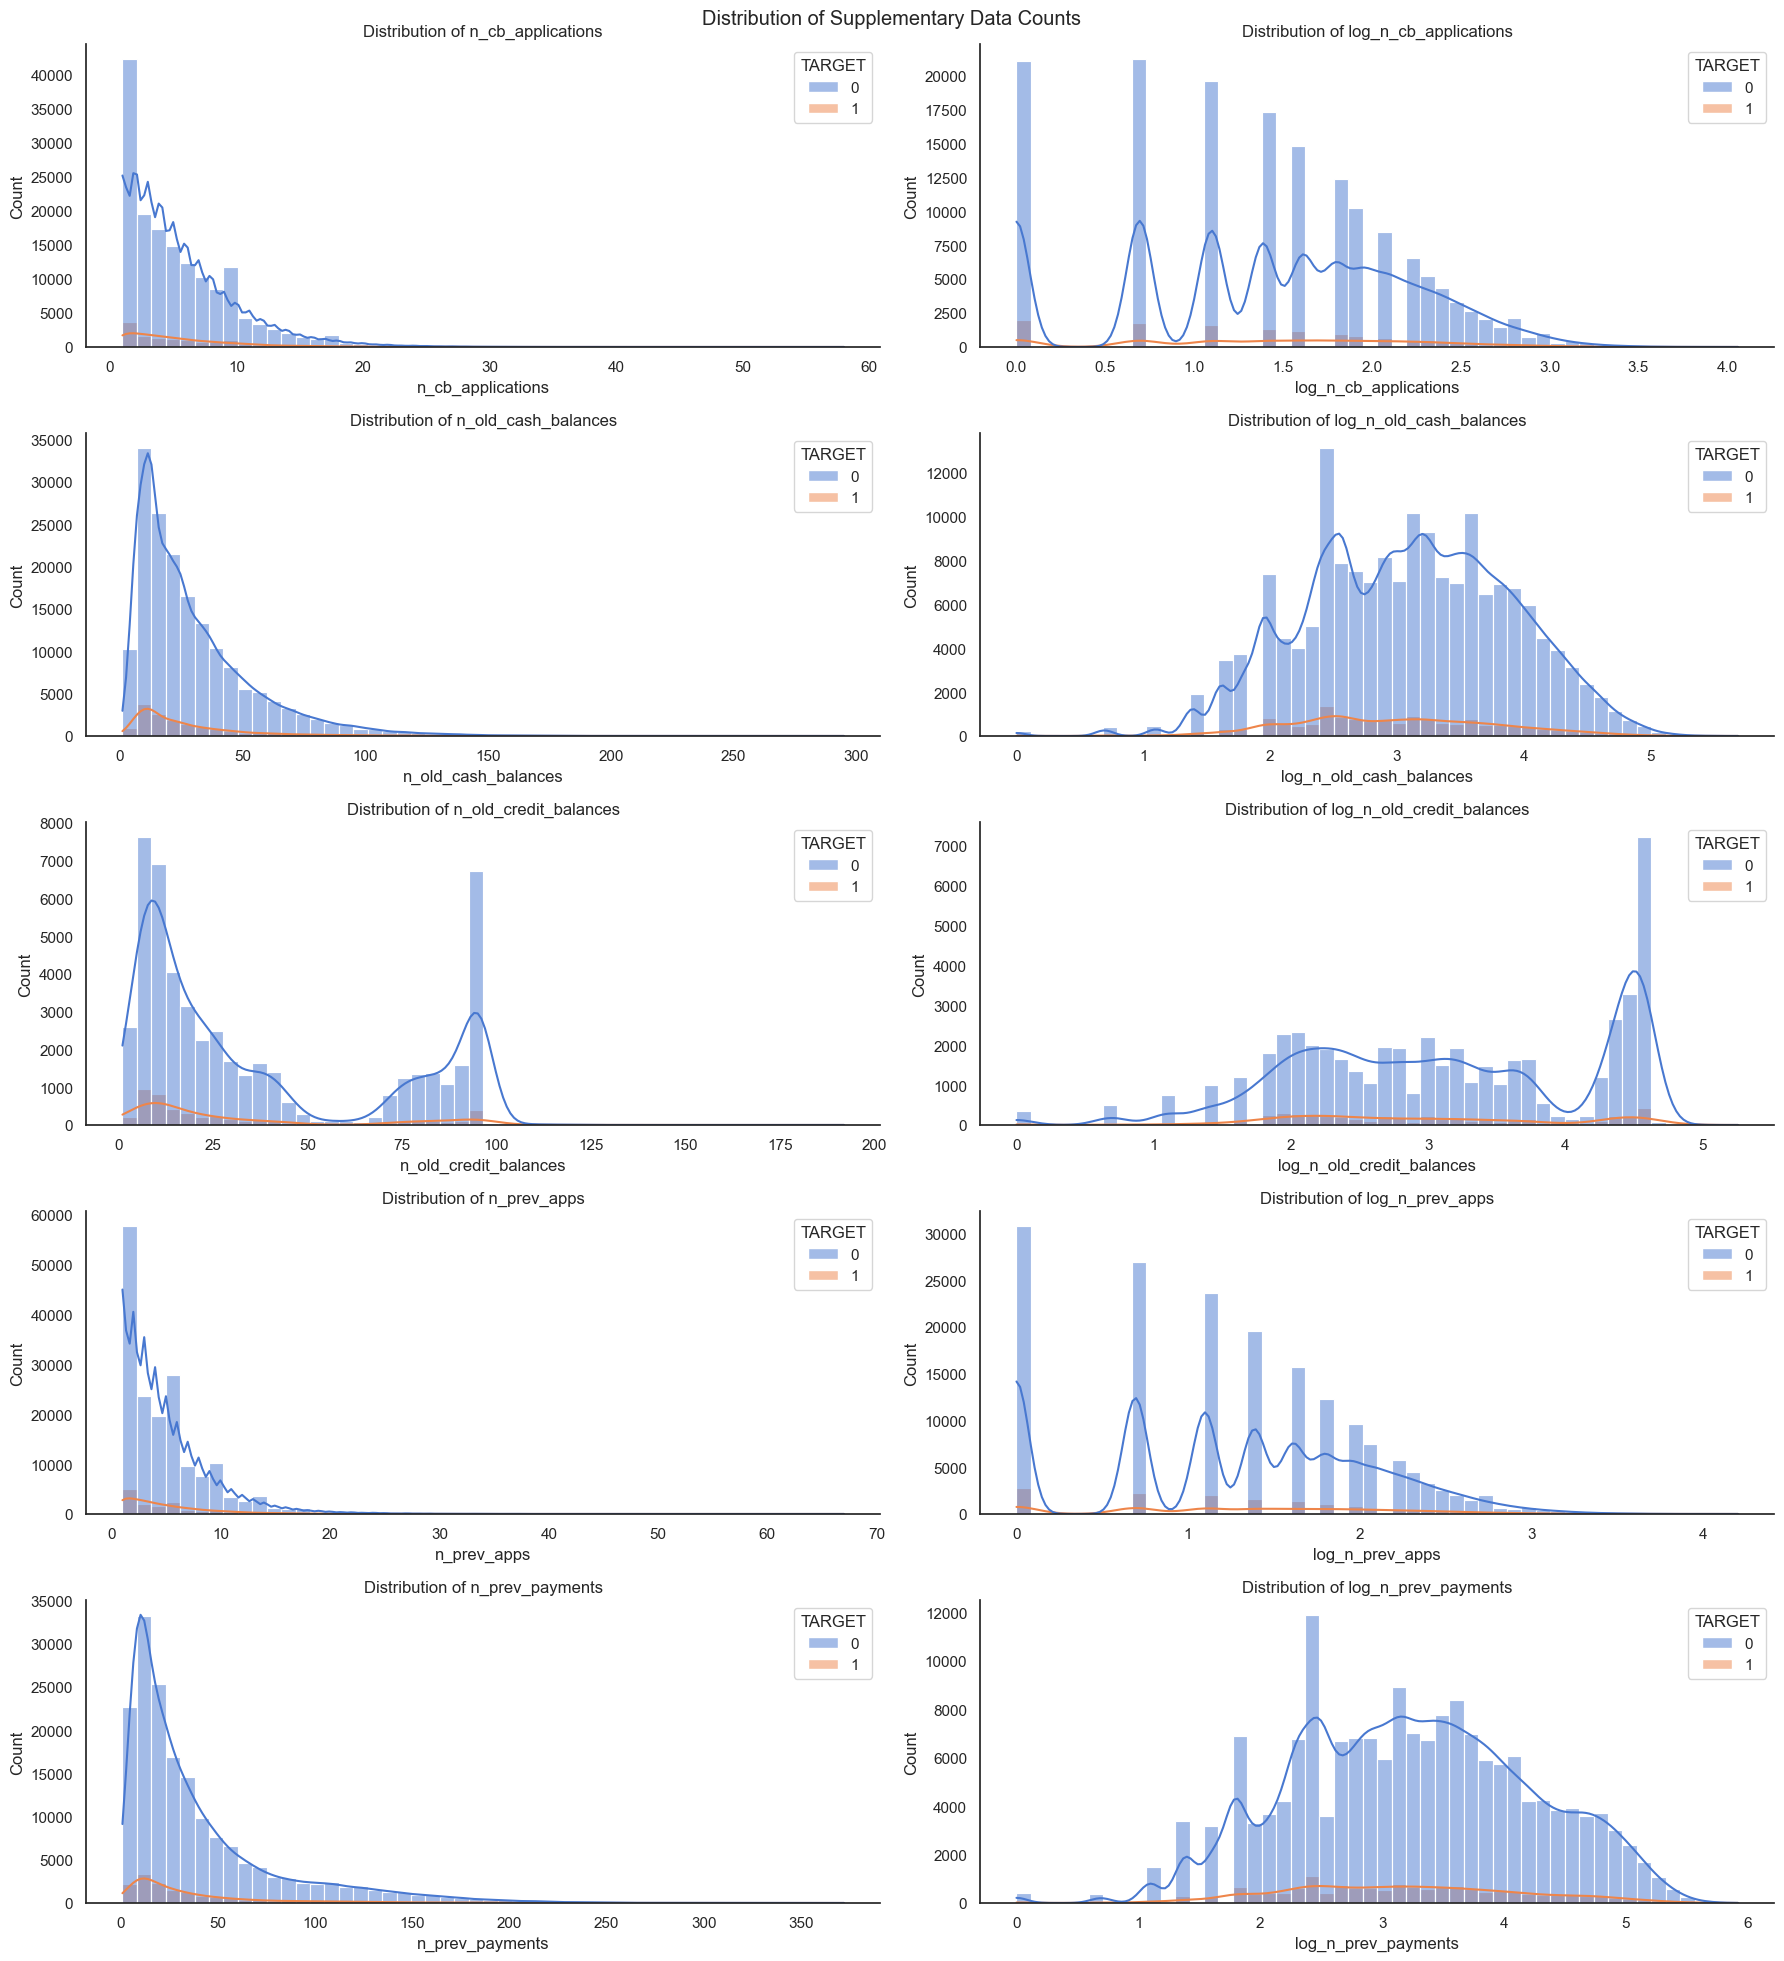

In [69]:
fig, axs = subplot_sns_histogram(
    df,
    agg_feats,
    hue="TARGET",
    title="Distribution of Supplementary Data Counts",
    nrows=5,
    ncols=2,
    figsize=(18, 20),
    bins=50,
)

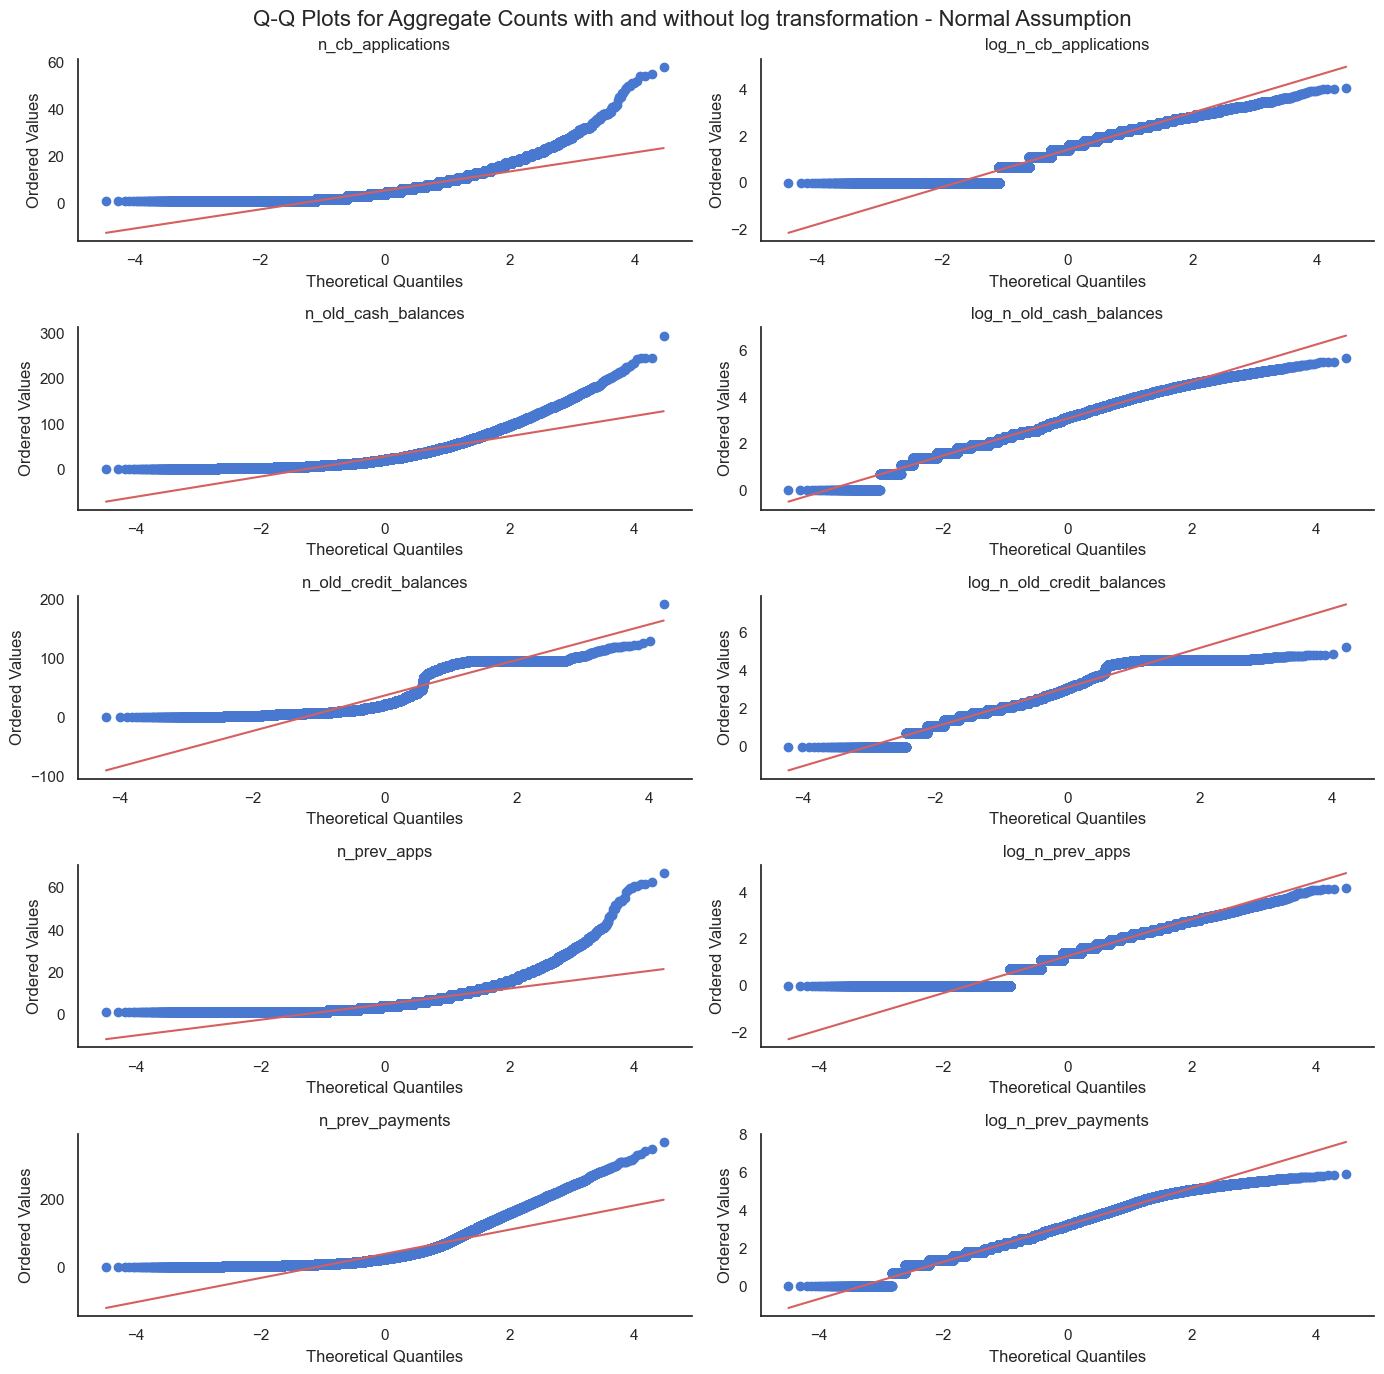

In [70]:
fig, axs = plot_feature_qqplot_subplot(
    df,
    agg_feats,
    nrows=5,
    ncols=2,
    figsize=(14, 14),
    title="Q-Q Plots for Aggregate Counts with and without log transformation - Normal Assumption",
)

In [71]:
shapiro_results = shapiro_test(df, agg_feats)

Shapiro-Wilk test for 'n_cb_applications':
  Statistic = 0.866, p-value = 0.000

Shapiro-Wilk test for 'log_n_cb_applications':
  Statistic = 0.958, p-value = 0.053

Shapiro-Wilk test for 'n_old_cash_balances':
  Statistic = 0.887, p-value = 0.000

Shapiro-Wilk test for 'log_n_old_cash_balances':
  Statistic = 0.985, p-value = 0.711

Shapiro-Wilk test for 'n_old_credit_balances':
  Statistic = 0.777, p-value = 0.000

Shapiro-Wilk test for 'log_n_old_credit_balances':
  Statistic = 0.928, p-value = 0.003

Shapiro-Wilk test for 'n_prev_apps':
  Statistic = 0.716, p-value = 0.000

Shapiro-Wilk test for 'log_n_prev_apps':
  Statistic = 0.963, p-value = 0.091

Shapiro-Wilk test for 'n_prev_payments':
  Statistic = 0.900, p-value = 0.000

Shapiro-Wilk test for 'log_n_prev_payments':
  Statistic = 0.959, p-value = 0.064



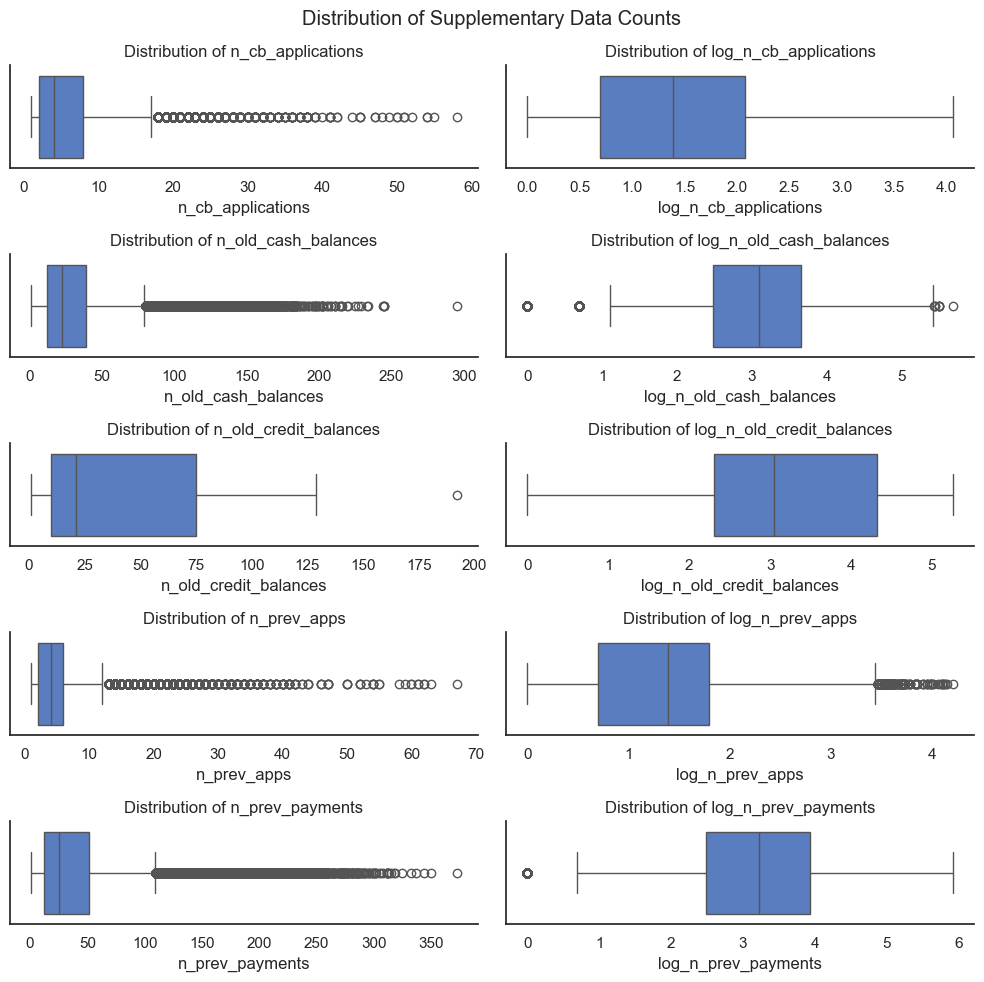

In [72]:
fig, axs = subplot_sns_boxplot(
    df,
    agg_feats,
    title="Distribution of Supplementary Data Counts",
    nrows=5,
    ncols=2,
    figsize=(10, 10),
)

In general the log seems to stabilize the variance and balance the outlier distribution of the features. 

# NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS
- __NAME_EDUCATION_TYPE__: Level of highest education the client achieved 
- __NAME_FAMILY_STATUS__: Family status of the client 

In [73]:
edu_fam_feats = ["NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS"]

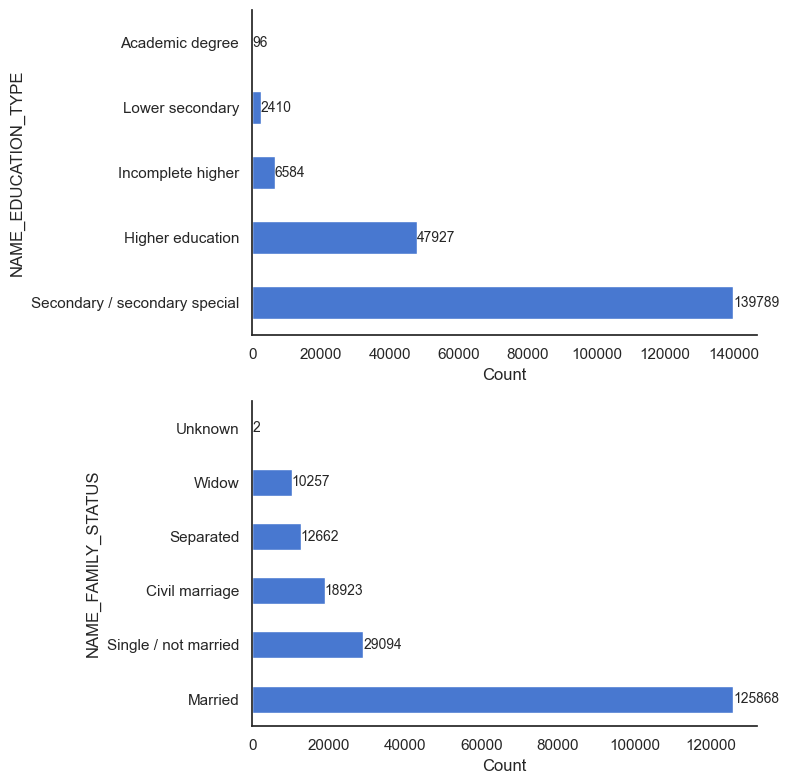

In [74]:
fig, axs = horizontal_bar_value_counts_subplots(
    df, list_of_features=edu_fam_feats, nrows=2, ncols=1, figsize=(8, 8)
)

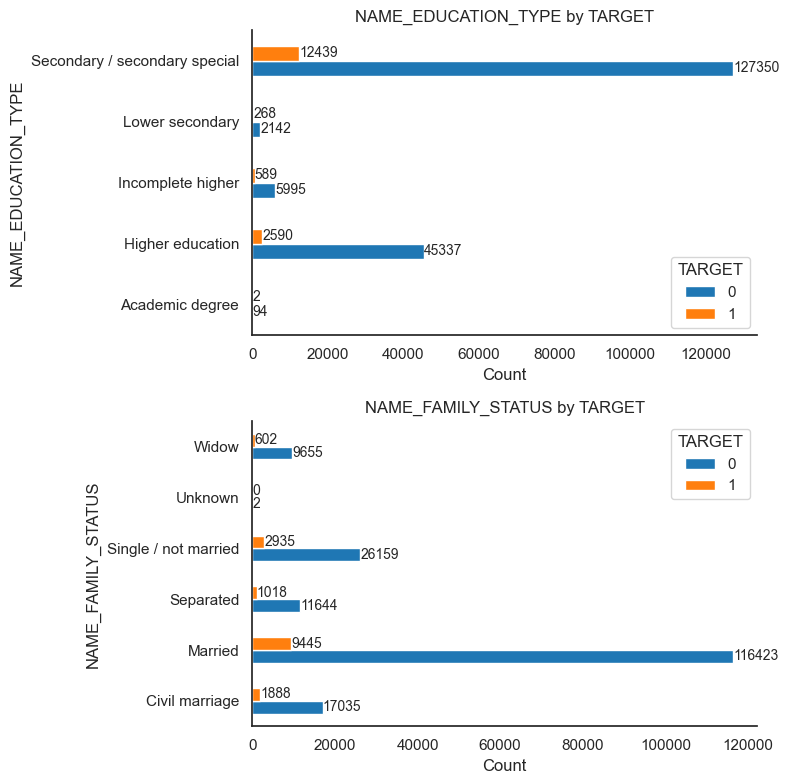

In [75]:
fig, axs = horizontal_bar_value_counts_by_class_subplots(
    df,
    target="TARGET",
    list_of_features=edu_fam_feats,
    nrows=2,
    ncols=1,
    figsize=(8, 8),
)

Again, I intend to target-encode these features

# DAYS_CREDIT_median, DAYS_CREDIT_max, DAYS_CREDIT_UPDATE_mean, DAYS_CREDIT_ENDDATE_mean
- __DAYS_CREDIT__: comes from the bureau.csv document and refers to how many days before current application that client applied for Credit Bureau credit
- ENDDATE: Remaining duration of CB credit (in days) at the time of application in Home Credit
- UPDATE: How many days before loan application did last information about the Credit Bureau credit come? (this is not in bureau.csv, but rather in the application from Home Credit

In [76]:
days_credit_feats = [
    "DAYS_CREDIT_median",
    "DAYS_CREDIT_max",
    "DAYS_CREDIT_UPDATE_mean",
    "DAYS_CREDIT_ENDDATE_mean",
]

In [77]:
df[days_credit_feats].describe()

DAYS_CREDIT_median  DAYS_CREDIT_max  DAYS_CREDIT_UPDATE_mean  \
count        168702.00000     168702.00000             168702.00000   
mean          -1049.53857       -489.39957               -546.17029   
std             626.23706        537.82172                448.99161   
min           -2922.00000      -2922.00000             -20939.00000   
25%           -1418.00000       -621.00000               -777.82953   
50%            -957.00000       -301.00000               -481.58572   
75%            -567.00000       -143.00000               -208.00000   
max               0.00000          0.00000                  0.00000   

       DAYS_CREDIT_ENDDATE_mean  
count              168702.00000  
mean                  648.74689  
std                  3273.99805  
min                -41888.00000  
25%                  -696.50000  
50%                  -124.62587  
75%                   592.25000  
max                 31200.00000

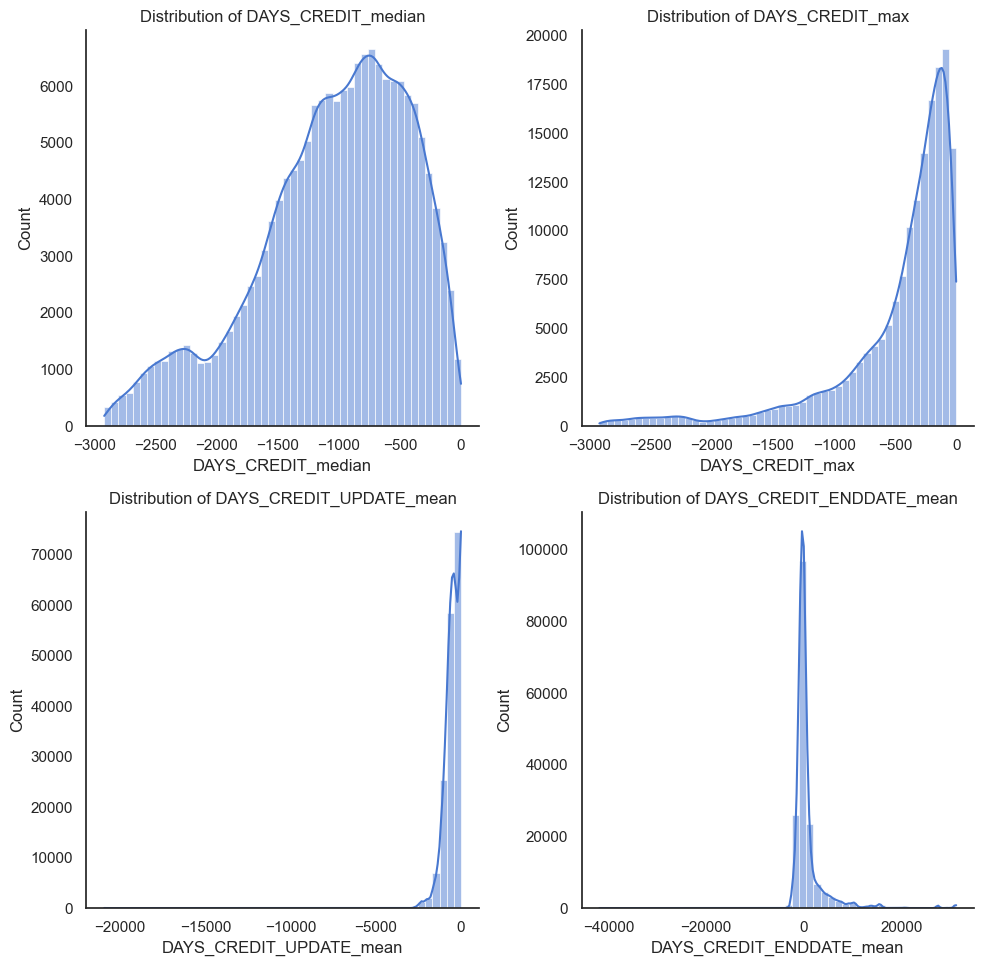

In [78]:
fig, axs = subplot_sns_histogram(
    df, days_credit_feats, nrows=2, ncols=2, figsize=(10, 10), bins=50, title=""
)

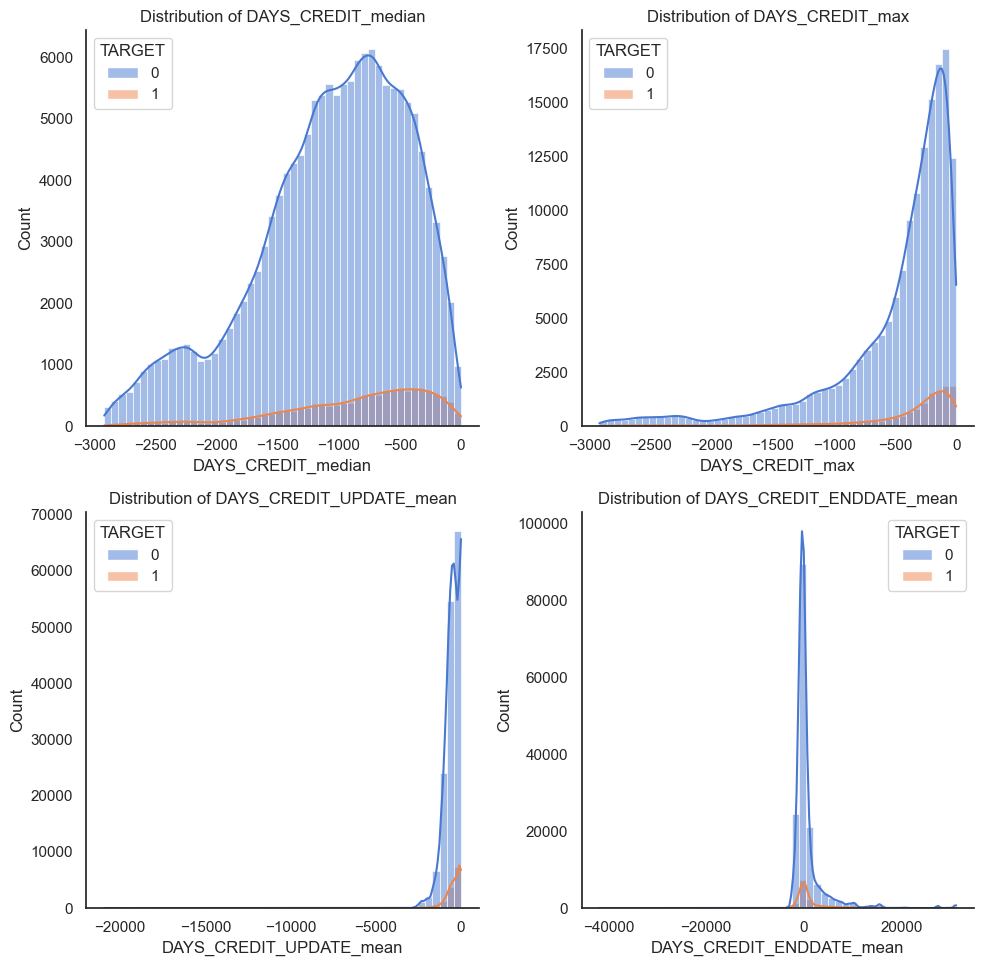

In [79]:
fig, axs = subplot_sns_histogram(
    df,
    days_credit_feats,
    nrows=2,
    ncols=2,
    figsize=(10, 10),
    bins=50,
    title="",
    hue="TARGET",
)

In [80]:
for feat in days_credit_feats:
    df[f"log_abs_{feat}"] = np.log(
        np.abs(df[feat]) + 1
    )  # Log of absolute value +1 to avoid log(0)
df[f"log_signed_DAYS_CREDIT_ENDDATE_mean"] = np.sign(
    df["DAYS_CREDIT_ENDDATE_mean"]
) * np.log(np.abs(df["DAYS_CREDIT_ENDDATE_mean"]) + 1)

days_credit_feats_transformed = [
    "DAYS_CREDIT_median",
    "log_abs_DAYS_CREDIT_median",
    "DAYS_CREDIT_max",
    "log_abs_DAYS_CREDIT_max",
    "DAYS_CREDIT_UPDATE_mean",
    "log_abs_DAYS_CREDIT_UPDATE_mean",
    "DAYS_CREDIT_ENDDATE_mean",
    "log_signed_DAYS_CREDIT_ENDDATE_mean",
]

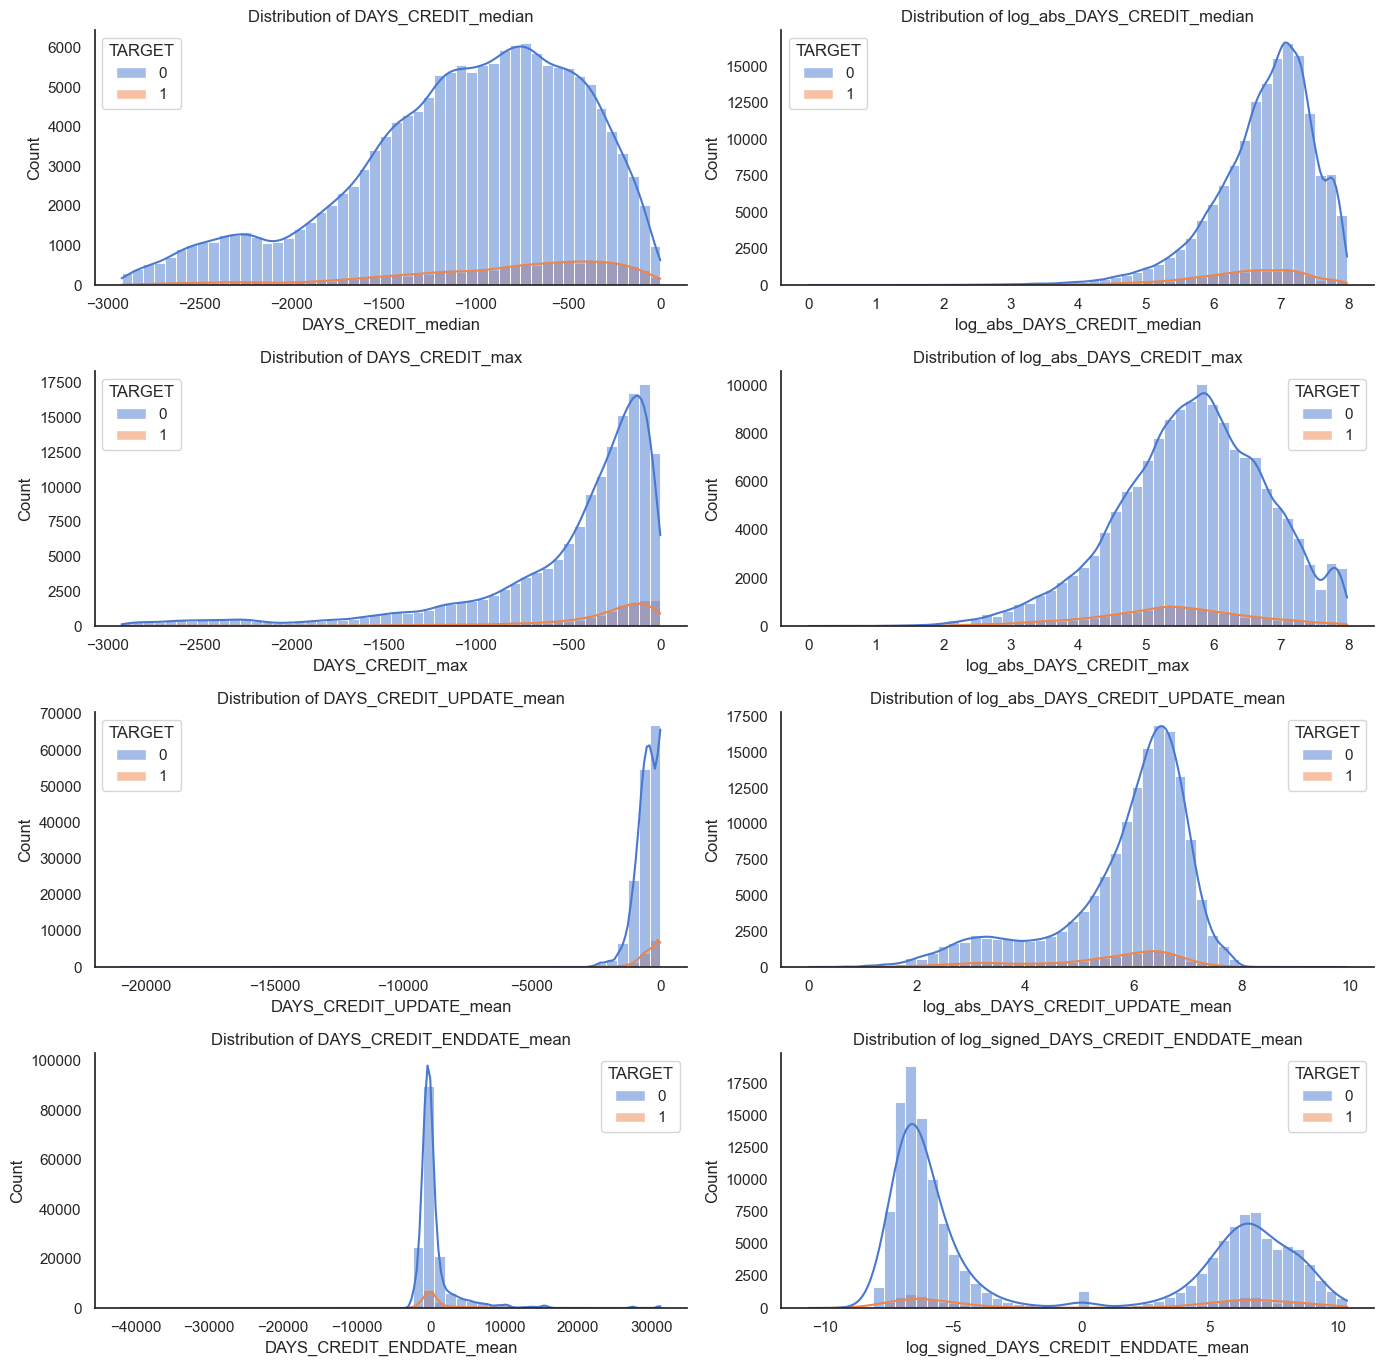

In [81]:
fig, axs = subplot_sns_histogram(
    df,
    days_credit_feats_transformed,
    nrows=4,
    ncols=2,
    figsize=(14, 14),
    bins=50,
    title="",
    hue="TARGET",
)

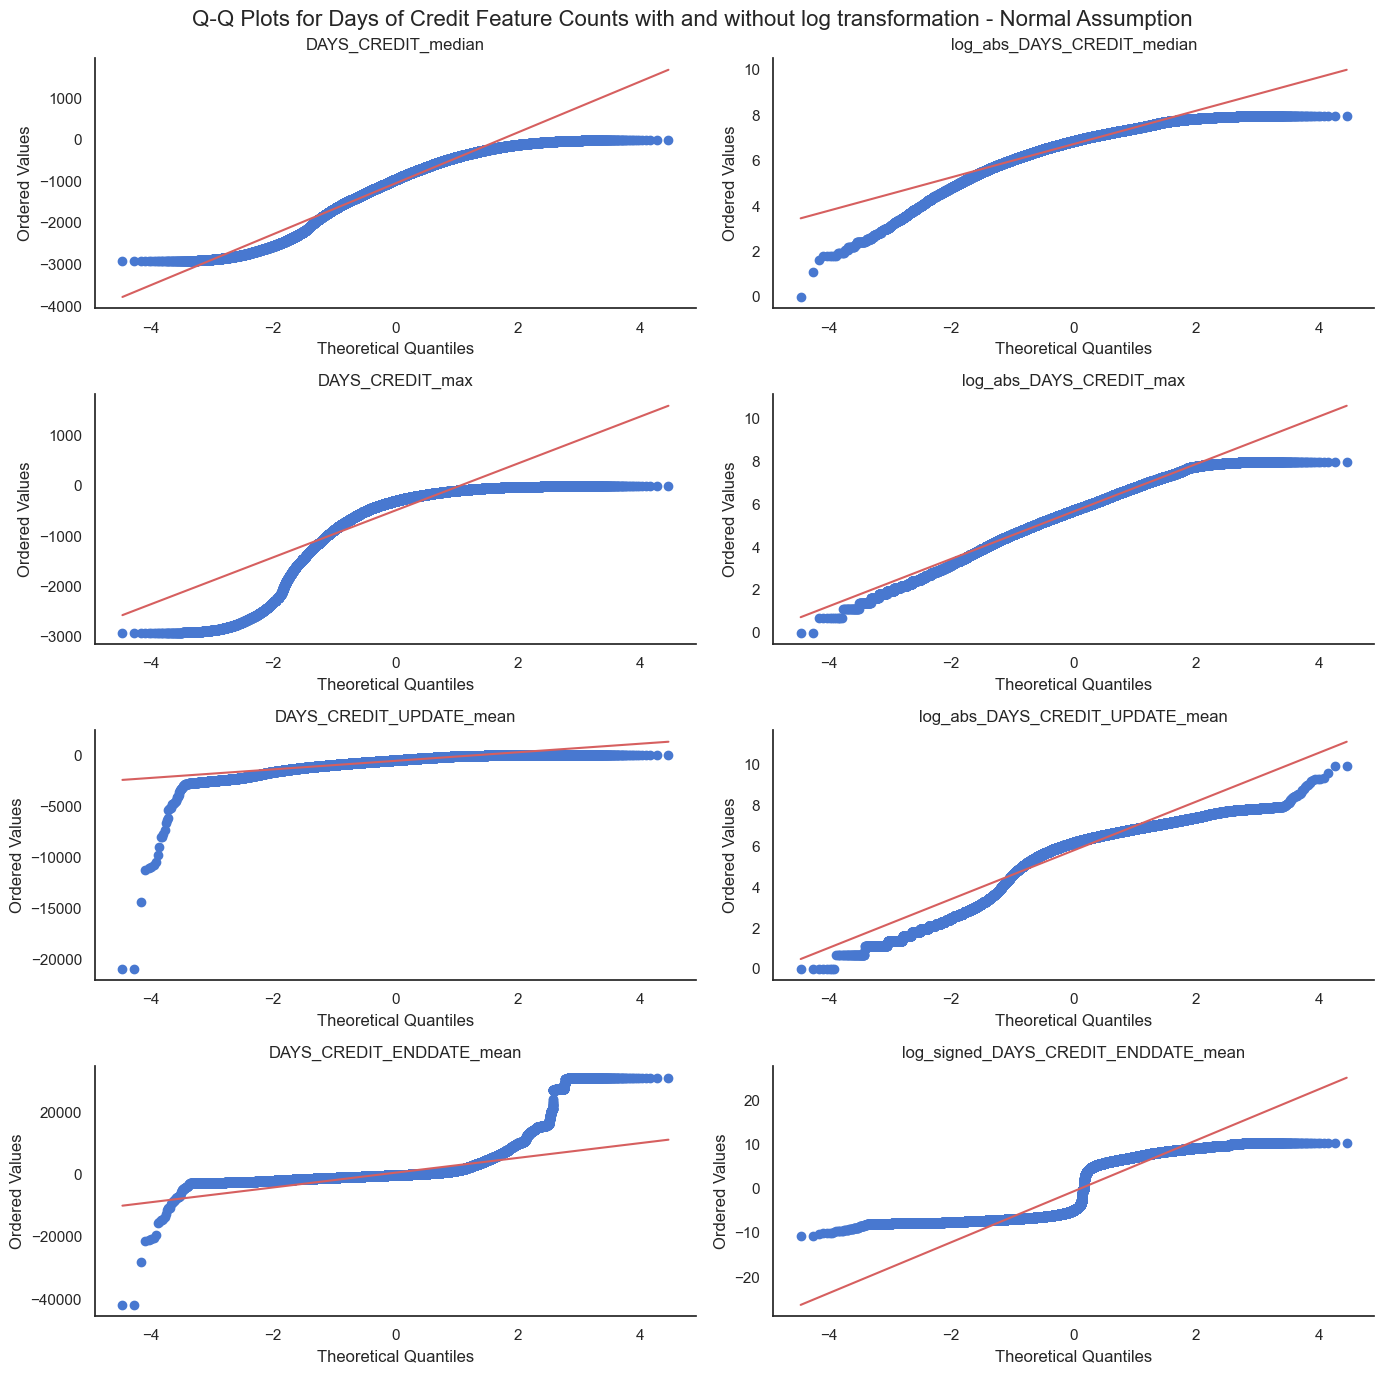

In [82]:
fig, axs = plot_feature_qqplot_subplot(
    df,
    days_credit_feats_transformed,
    nrows=4,
    ncols=2,
    figsize=(14, 14),
    title="Q-Q Plots for Days of Credit Feature Counts with and without log transformation - Normal Assumption",
)

# A few more miscellaneous features: AMT_PAYMENT_min, DAYS_EMPLOYED, AMT_GOODS_PRICE, DAYS_INSTALLMENT_max, CNT_INSTALMENT_FUTURE_std

In [83]:
misc_target_correlated_features = [
    "AMT_PAYMENT_min",
    "DAYS_EMPLOYED",
    "AMT_GOODS_PRICE",
    "DAYS_INSTALMENT_max",
    "CNT_INSTALMENT_FUTURE_std",
]

In [84]:
df[misc_target_correlated_features].describe()

AMT_PAYMENT_min  DAYS_EMPLOYED  AMT_GOODS_PRICE  DAYS_INSTALMENT_max  \
count     186673.00000   196806.00000     196640.00000         186673.00000   
mean        5205.37695    -1962.33094     538695.75000           -319.37912   
std        14201.74805     2316.63883     369710.15625            539.00940   
min            0.00000   -17912.00000      40500.00000          -2922.00000   
25%           40.90500    -2765.00000     238500.00000           -374.00000   
50%         2313.89990    -1219.00000     450000.00000            -49.00000   
75%         7113.06006     -292.00000     679500.00000            -18.00000   
max      2291330.75000        0.00000    4050000.00000             -1.00000   

       CNT_INSTALMENT_FUTURE_std  
count               185262.00000  
mean                     6.26505  
std                      4.71029  
min                      0.00000  
25%                      3.31662  
50%                      4.18330  
75%                      7.46324  
max                     42.42641

In [85]:
df[misc_target_correlated_features].isna().sum()

AMT_PAYMENT_min              10133
DAYS_EMPLOYED                    0
AMT_GOODS_PRICE                166
DAYS_INSTALMENT_max          10133
CNT_INSTALMENT_FUTURE_std    11544
dtype: int64

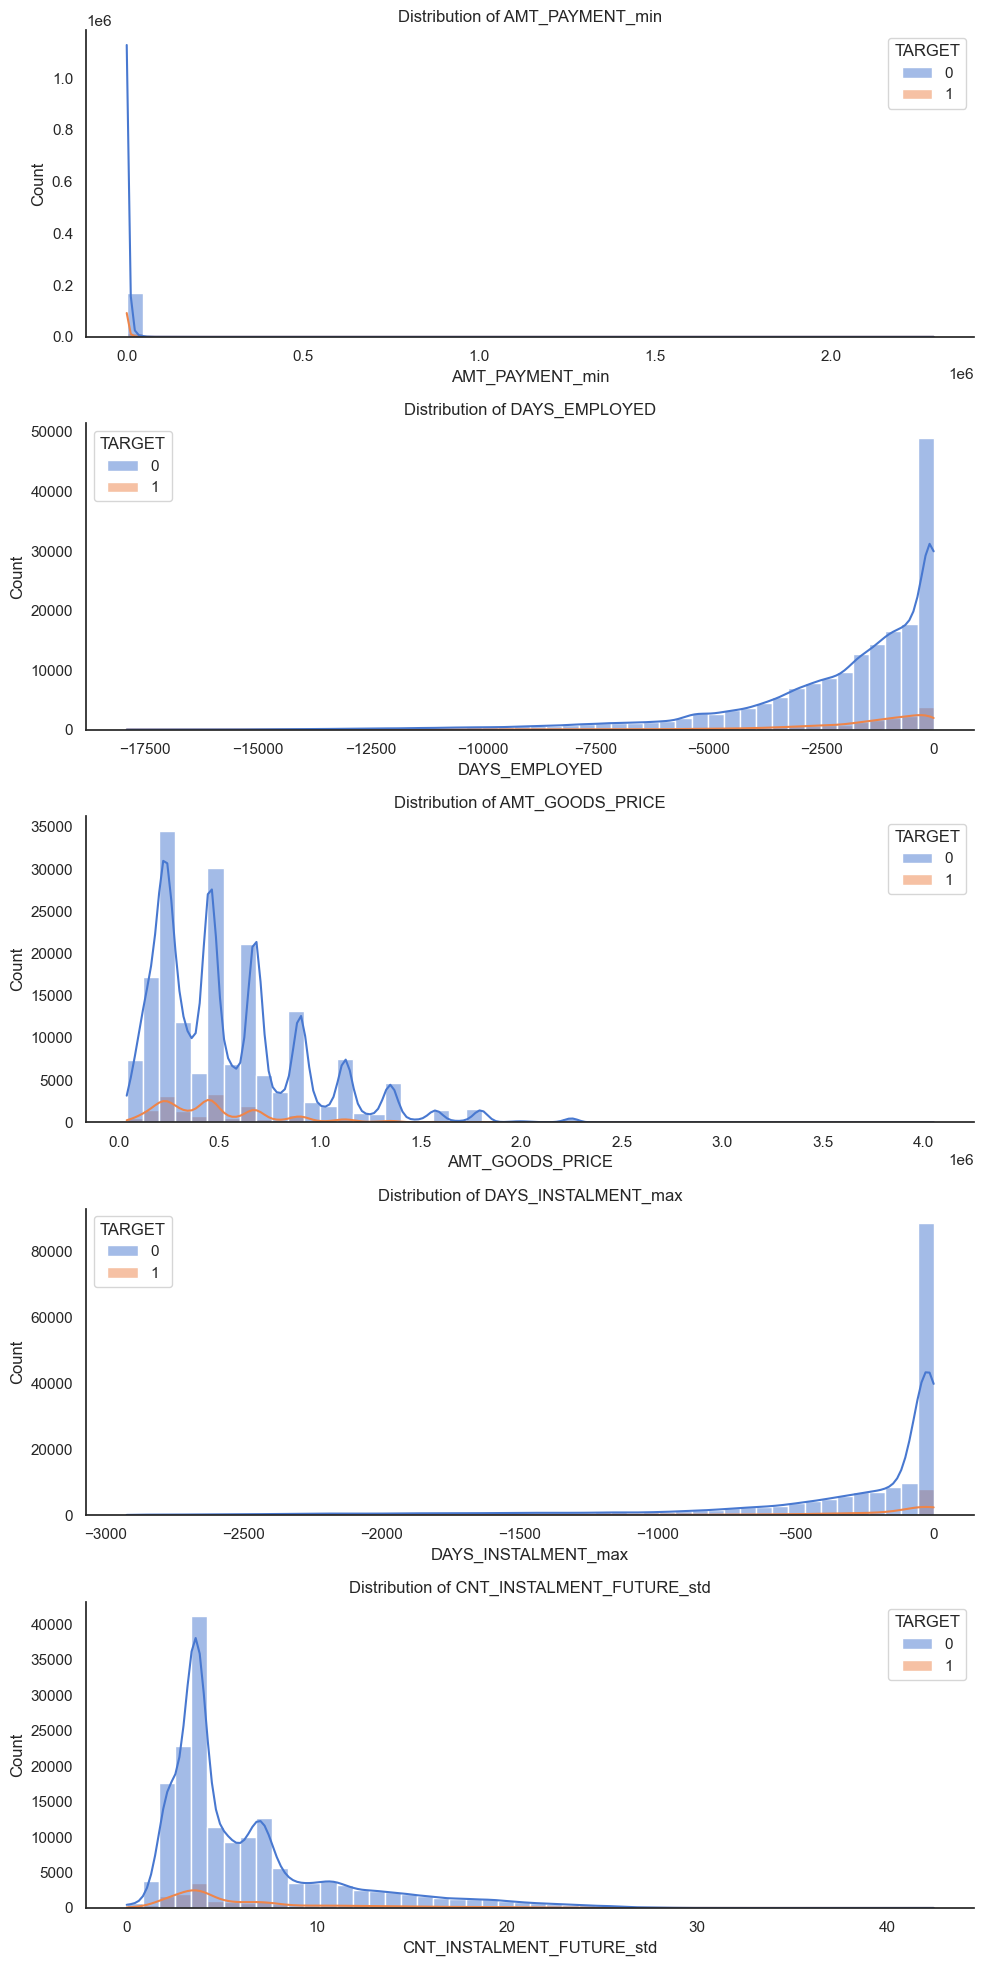

In [86]:
fig, axs = subplot_sns_histogram(
    df,
    misc_target_correlated_features,
    nrows=5,
    ncols=1,
    figsize=(10, 20),
    bins=50,
    title="",
    hue="TARGET",
)

In [87]:
misc_feats_to_log = ["AMT_PAYMENT_min", "CNT_INSTALMENT_FUTURE_std", "AMT_GOODS_PRICE"]
for feat in misc_target_correlated_features:
    if feat in misc_feats_to_log:
        df[f"log_{feat}"] = np.log(df[feat] + 1)
    if feat in ["DAYS_EMPLOYED", "DAYS_INSTALMENT_max"]:
        df[f"log_abs_{feat}"] = np.log(np.abs(df[feat]) + 1)

misc_feats_transformed = [
    "AMT_PAYMENT_min",
    "log_AMT_PAYMENT_min",
    "DAYS_EMPLOYED",
    "log_abs_DAYS_EMPLOYED",
    "AMT_GOODS_PRICE",
    "log_AMT_GOODS_PRICE",
    "DAYS_INSTALMENT_max",
    "log_abs_DAYS_INSTALMENT_max",
    "CNT_INSTALMENT_FUTURE_std",
    "log_CNT_INSTALMENT_FUTURE_std",
]

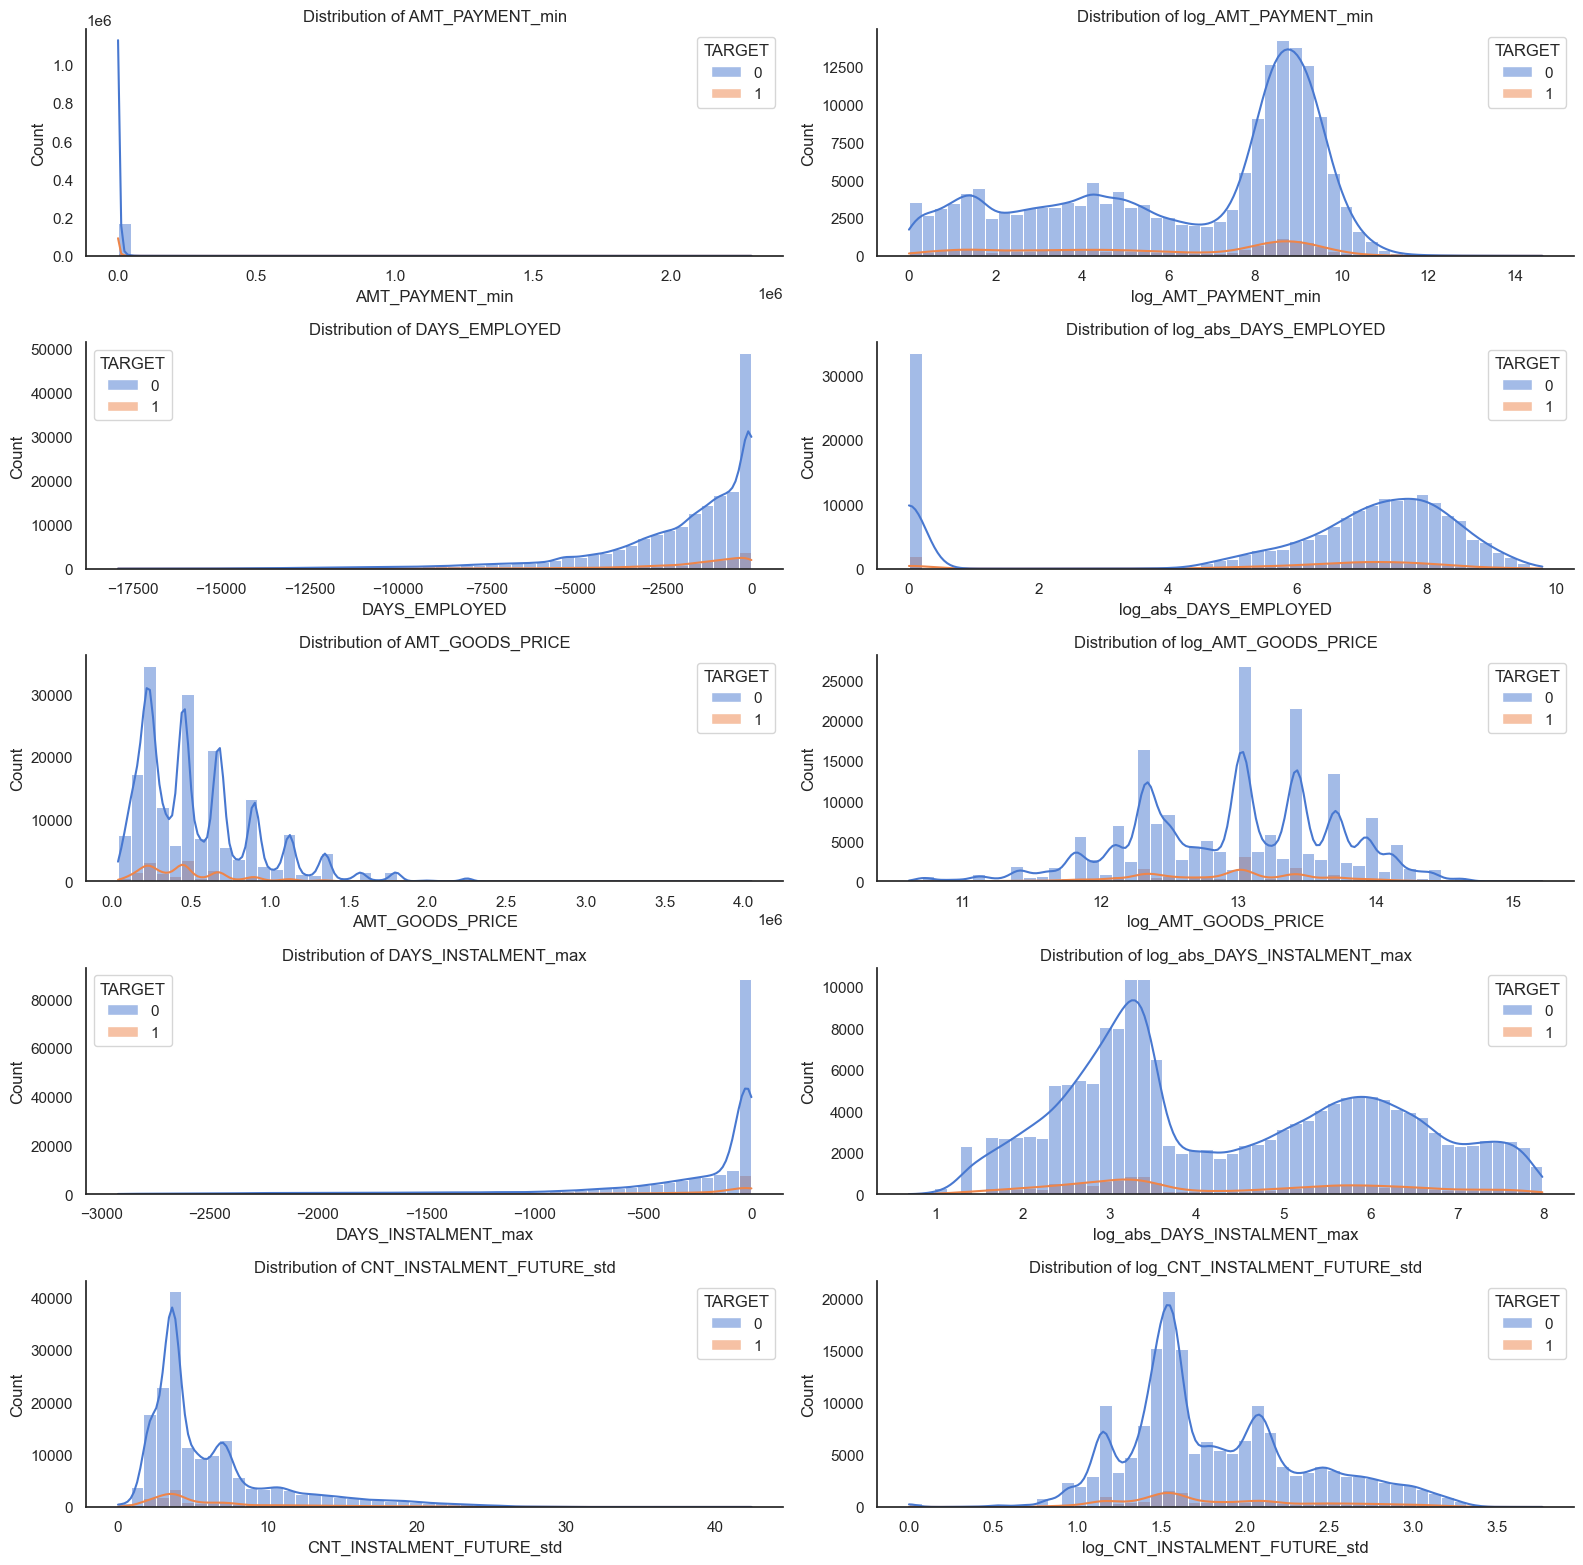

In [88]:
fig, axs = subplot_sns_histogram(
    df,
    misc_feats_transformed,
    nrows=5,
    ncols=2,
    figsize=(16, 16),
    bins=50,
    title="",
    hue="TARGET",
)

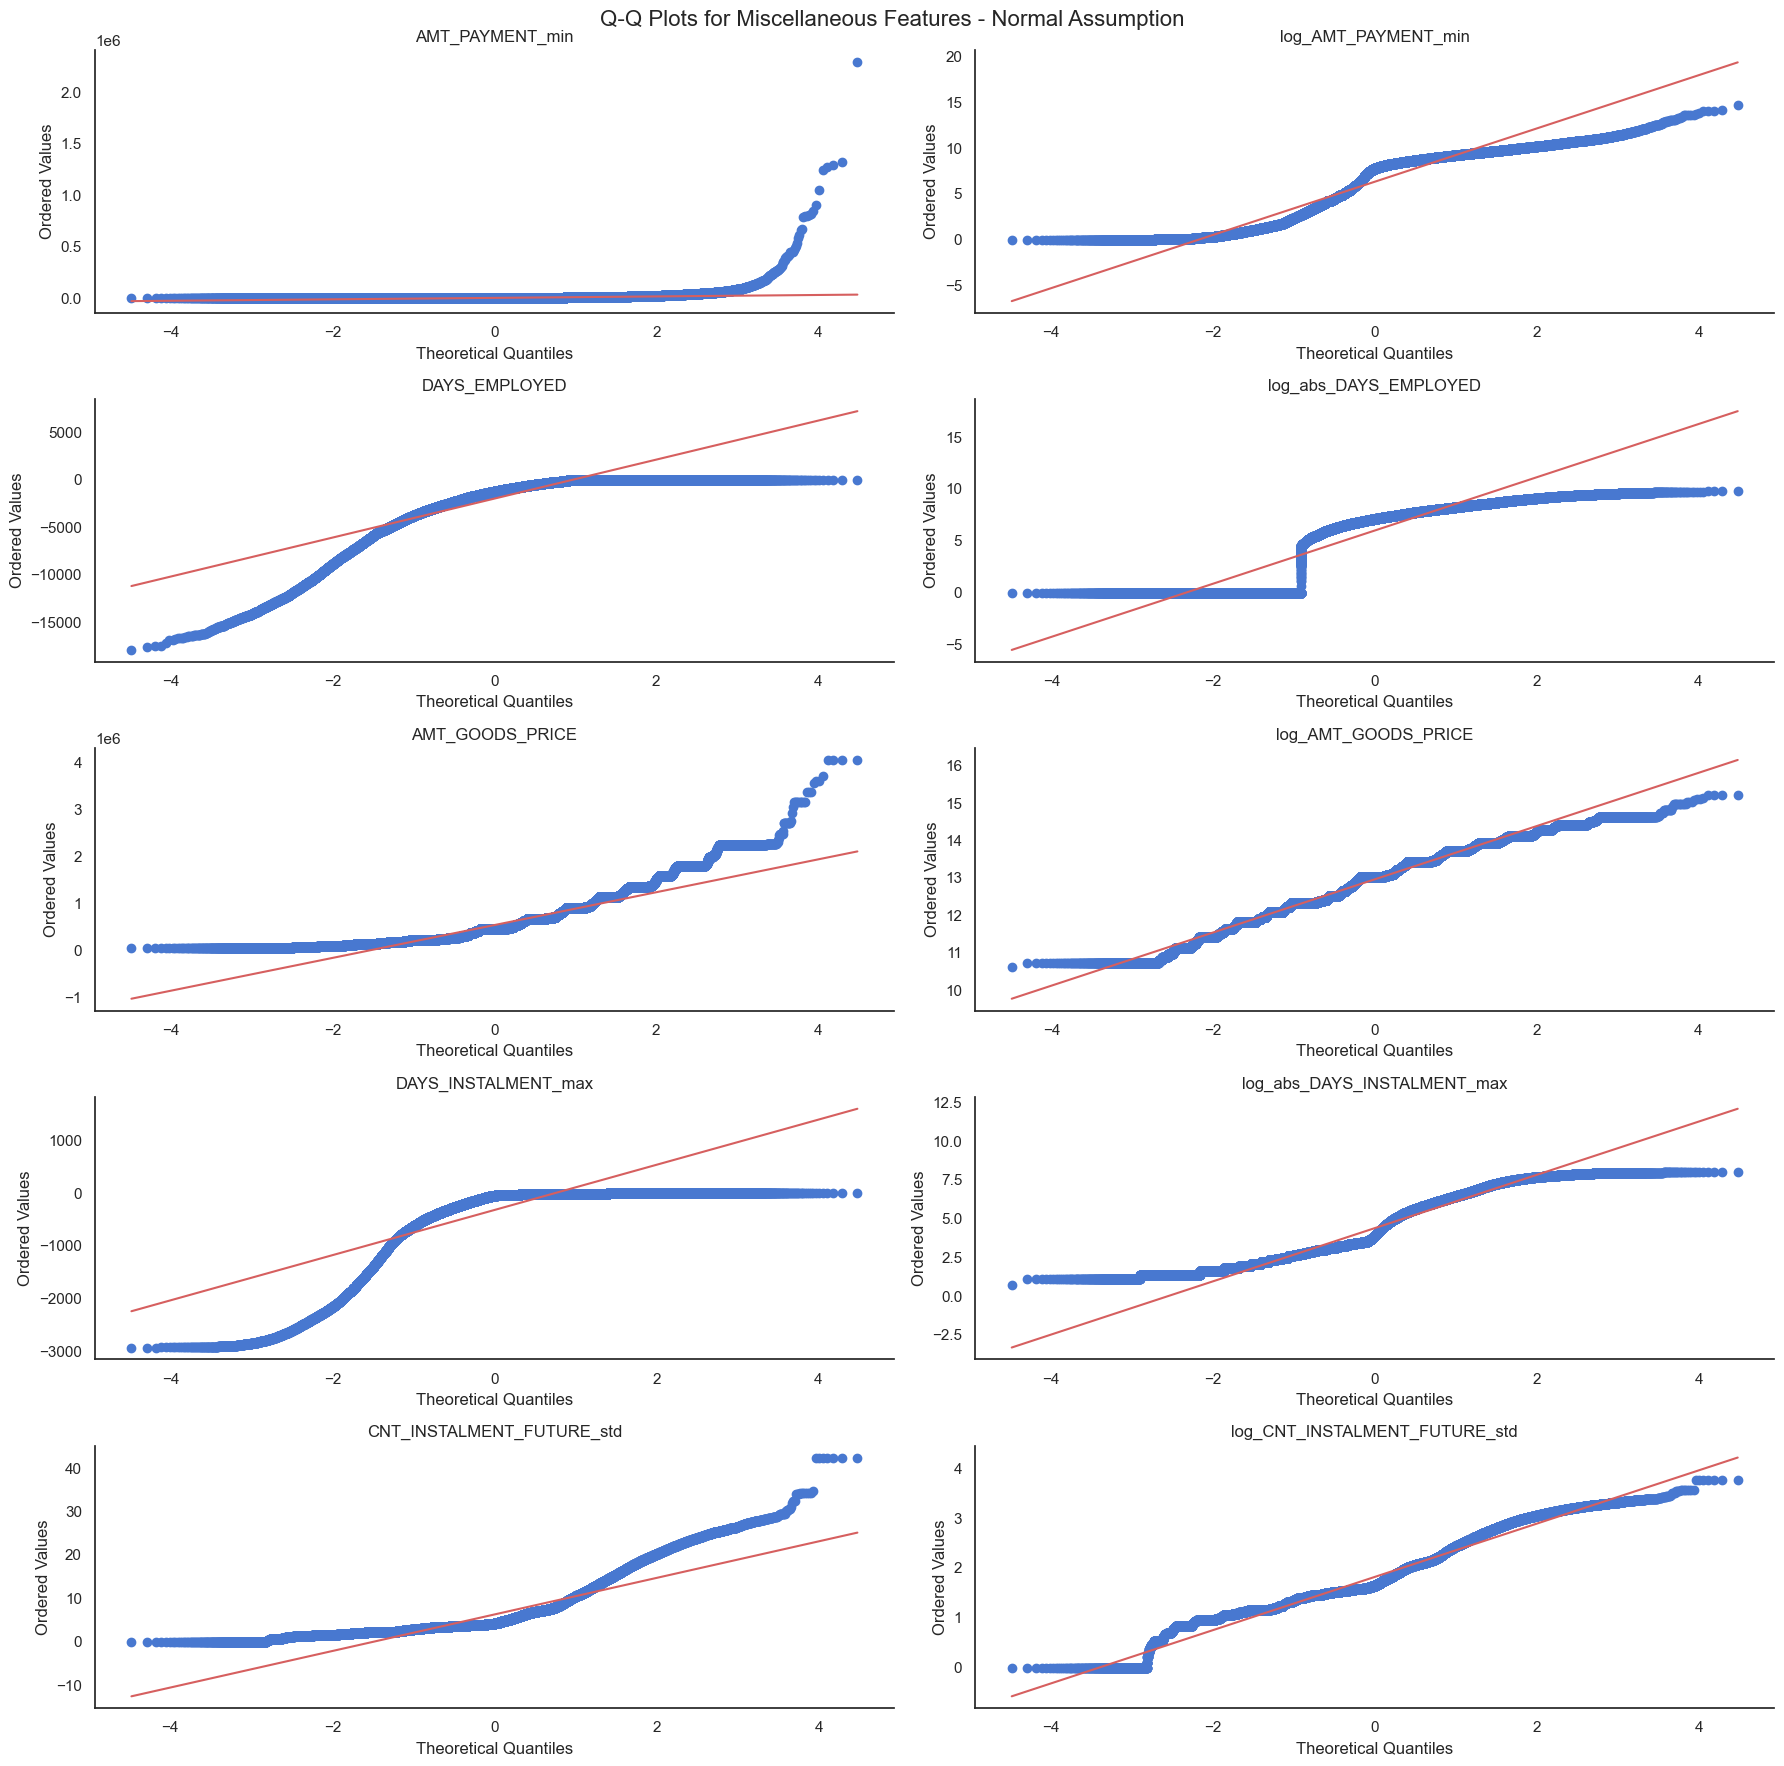

In [89]:
fig, axs = plot_feature_qqplot_subplot(
    df,
    misc_feats_transformed,
    nrows=5,
    ncols=2,
    figsize=(18, 18),
    title="Q-Q Plots for Miscellaneous Features - Normal Assumption",
)

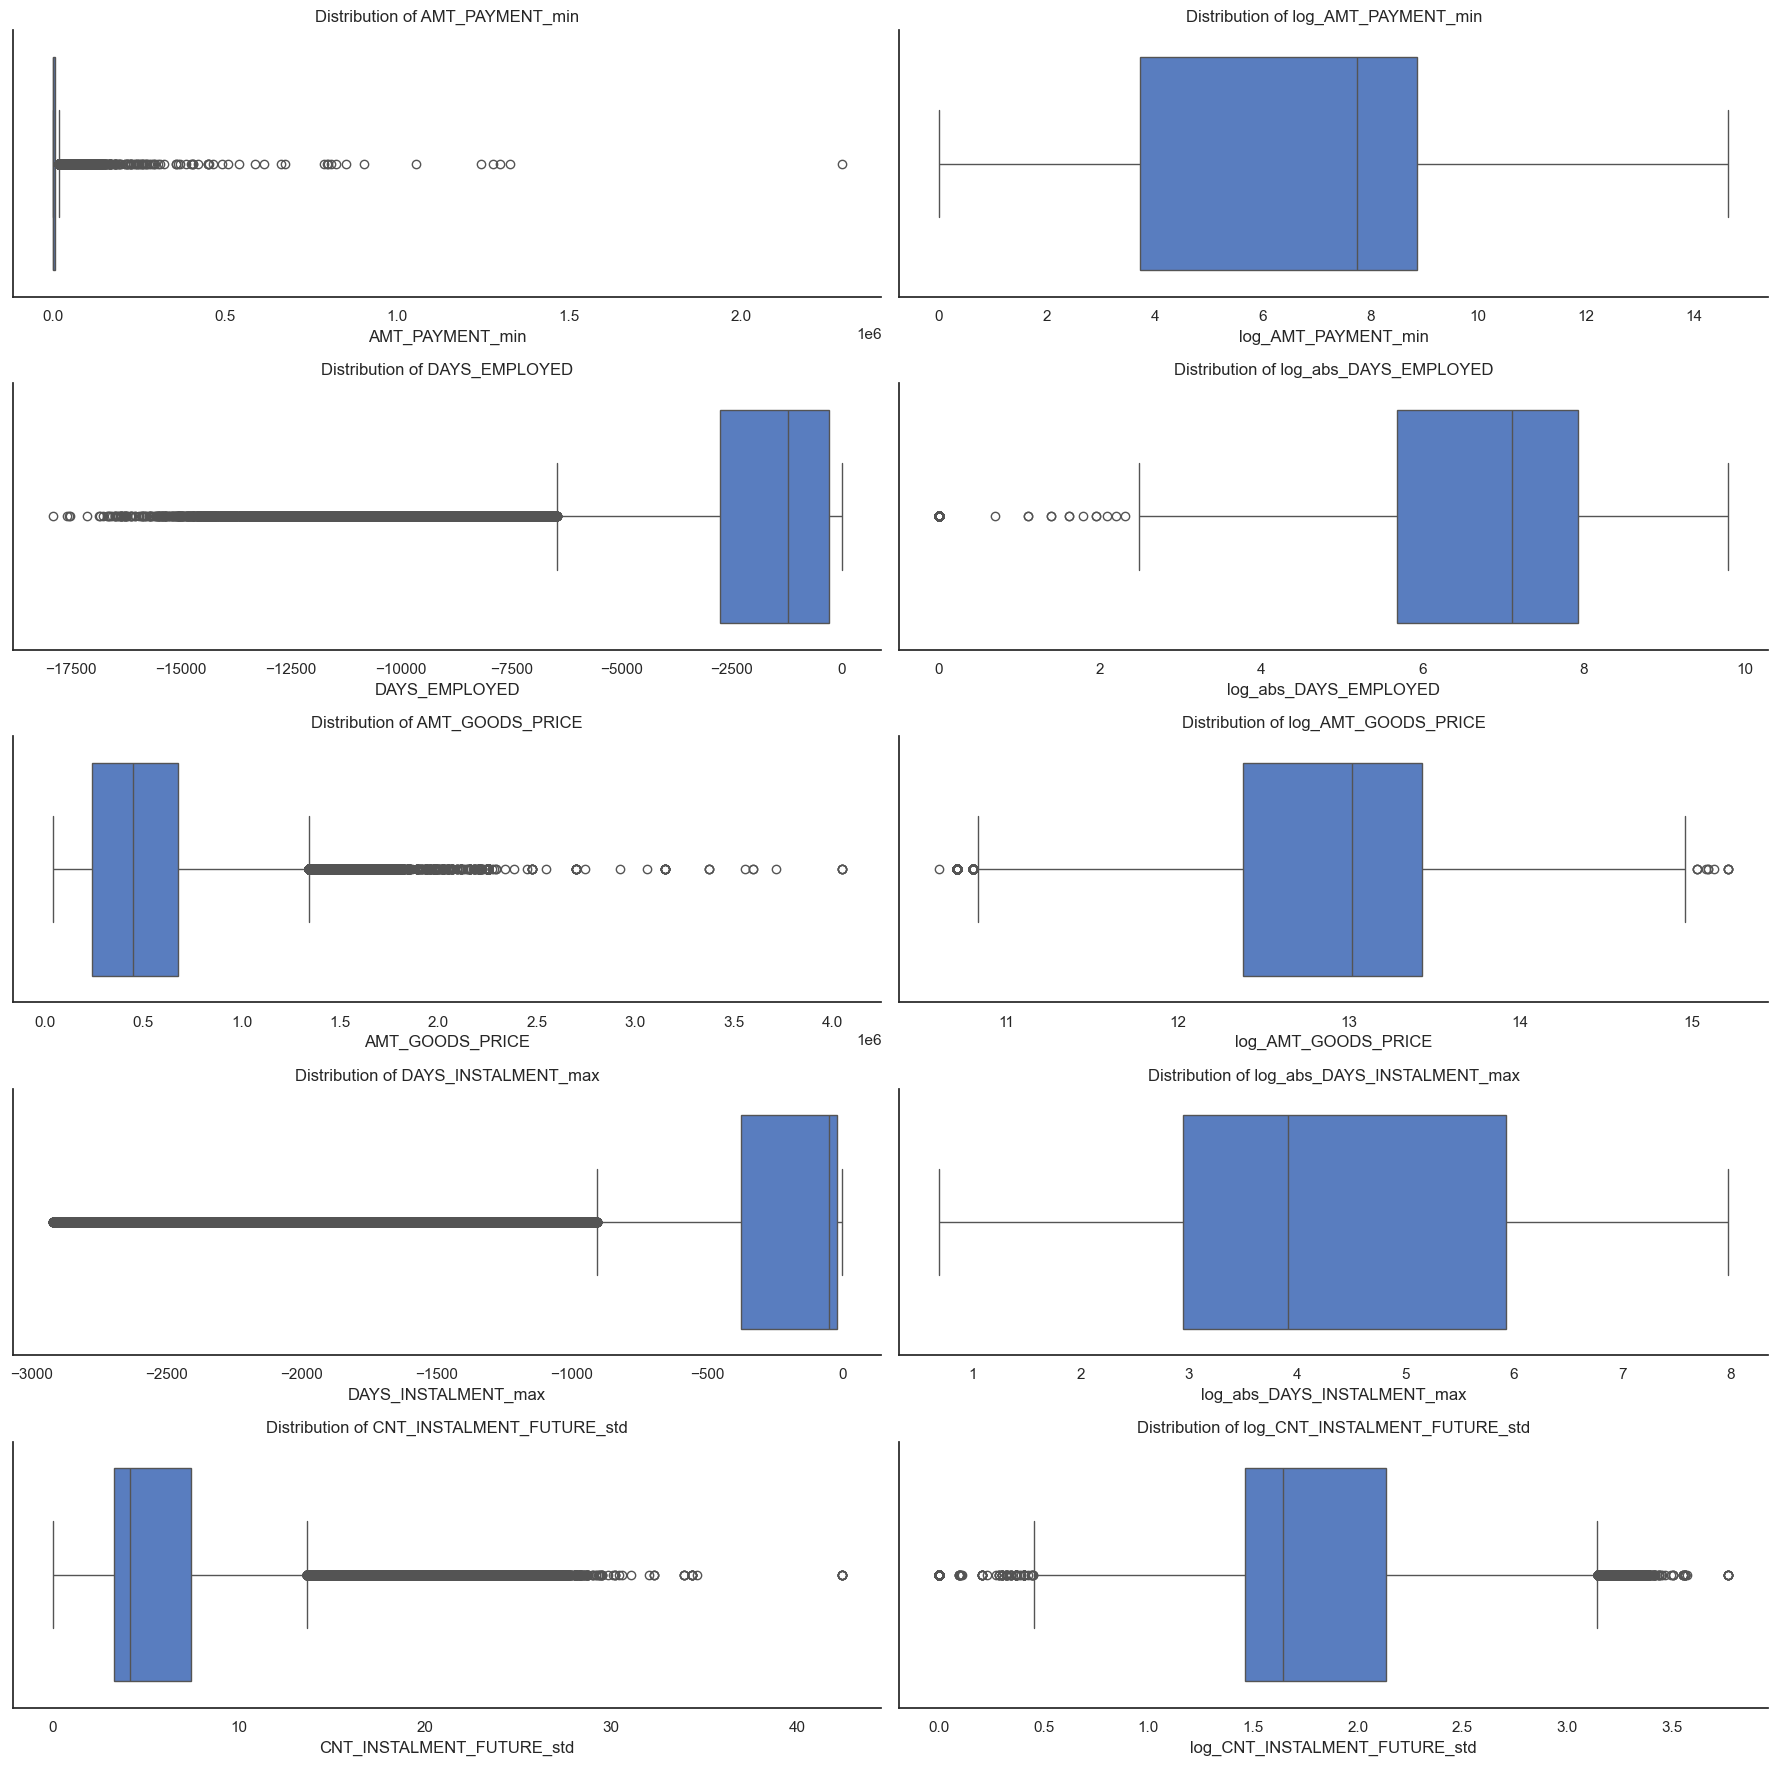

In [90]:
fig, axs = subplot_sns_boxplot(
    df, misc_feats_transformed, nrows=5, ncols=2, figsize=(18, 18)
)

In general, these seem to be effective variance stabilizing transformations that I will implement in the next notebook.

# Notebook Conclusions:

- This is a very imbalanced dataset with many features. 
- Considering the distribution of numeric features, logarithmic transformations appear to stabilize the variance (i.e. balance and/or minimize the distribution of outliers) for many features
- As well, these logarithmic transformations also appear to make many of the features more normally distributed, increasing the efficacy of these features for linear models.
- In the next (and final) notebook, I will implement these transformed features to see if they improve the performance of models. 
- Many missing value distributions appear to be imbalanced by class according to the same proportions as the dataset as a whole.

__Future Direction:__
- try a variety of other feature transformations